In [275]:
import pandas as pd
import numpy as np
import os
import shutil
import statistics
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from matplotlib.backends.backend_pdf import PdfPages
import movieslib #as mov

import importlib
importlib.reload(movieslib)

<module 'movieslib' from '/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py'>

In [112]:
FOLDER_INPUT = './12movies_cuts/'
FOLDER_OUTPUT = './extr_stat'

df = pd.read_csv("./12movies_cuts/ClickHM.csv", delimiter=',')
start = 0
df[start:start+10]

Unnamed: 0  frame  face_id  timestamp  AU01_r  AU02_r  AU04_r  AU05_r  \
0           0   3577      0.0    149.149    0.00    0.00     0.0     0.0   
1           1   3578      0.0    149.191    0.00    0.00     0.0     0.0   
2           2   3579      0.0    149.233    0.20    0.00     0.0     0.0   
3           3   3580      0.0    149.274    0.41    0.10     0.0     0.0   
4           4   3581      0.0    149.316    0.43    0.15     0.0     0.0   
5           5   3582      0.0    149.358    0.41    0.04     0.0     0.0   
6           6   3583      0.0    149.399    0.49    0.08     0.0     0.0   
7           7   3584      0.0    149.441    0.47    0.00     0.0     0.0   
8           8   3585      0.0    149.483    0.53    0.06     0.0     0.0   
9           9   3586      0.0    149.525    0.53    0.09     0.0     0.0   

   AU06_r  AU07_r  ...  AU10_r  AU12_r  AU14_r  AU15_r  AU17_r  AU20_r  \
0     0.0     0.0  ...     0.0     0.0    0.58     0.0     0.0    0.00   
1     0.0     0.0  ...     0.0     0.0    0.82     0.0     0.0    0.00   
2     0.0     0.0  ...     0.0     0.0    0.52     0.0     0.0    0.10   
3     0.0     0.0  ...     0.0     0.0    0.48     0.0     0.0    0.30   
4     0.0     0.0  ...     0.0     0.0    0.38     0.0     0.0    0.32   
5     0.0     0.0  ...     0.0     0.0    0.24     0.0     0.0    0.45   
6     0.0     0.0  ...     0.0     0.0    0.33     0.0     0.0    0.24   
7     0.0     0.0  ...     0.0     0.0    0.60     0.0     0.0    0.19   
8     0.0     0.0  ...     0.0     0.0    0.44     0.0     0.0    0.25   
9     0.0     0.0  ...     0.0     0.0    0.54     0.0     0.0    0.04   

   AU23_r  AU25_r  AU26_r  AU45_r  
0     0.0     0.0     0.0     0.0  
1     0.0     0.0     0.0     0.0  
2     0.0     0.0     0.0     0.0  
3     0.0     0.0     0.0     0.0  
4     0.0     0.0     0.0     0.0  
5     0.0     0.0     0.0     0.0  
6     0.0     0.0     0.0     0.0  
7     0.0     0.0     0.0     0.0  
8     0.0     0.0     0.0     0.0  
9     0.0     0.0     0.0     0.0  

[10 rows x 21 columns]

In [150]:
HM = ['MonsterInLaw', 'QuantumOfSolace', 'Click', 'PiratesOfCaribbean', 'TheDarkKnight', 'FastAndFurious']
AM = ['Clean', 'Synecdoche', 'BrightStar', 'CertifiedCopy', 'Spider', 'AllOrNothing']

COLS=['movie', 'face_id', 'time', 'eyes_mean', 'eyes_SD', 'midpart_mean', 'midpart_SD',
    'mouth_mean', 'mouth_SD', 'eyes_d_mean', 'eyes_d_SD', 'midpart_d_mean', 'midpart_d_SD', 'mouth_d_mean', 'mouth_d_SD']

AUs = ['AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r', 'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r']
COLSETS = {'eyes':['AU01_r', 'AU02_r', 'AU04_r'], 'midpart':['AU05_r', 'AU06_r', 'AU07_r', 'AU09_r'],
    'mouth':['AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r'], 
    'all':['AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r', 'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r']}

In [97]:
filenames = mov.get_filenames(FOLDER_INPUT, file='M')
print(filenames)

['MonsterInLawHM.csv', 'QuantumOfSolaceHM.csv', 'CleanAM.csv', 'SynecdocheAM.csv', 'BrightStarAM.csv', 'ClickHM.csv', 'CertifiedCopyAM.csv', 'SpiderAM.csv', 'AllOrNothingAM.csv', 'PiratesOfCaribbeanHM.csv', 'TheDarkKnightHM.csv', 'FastAndFuriousHM.csv']


In [ ]:
#plot each AU as a separate graph 

# name the Pdf file
filename = "AUgraph.pdf"  
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True


def save_image(filename):
    
    # PdfPages is a wrapper around pdf  file so there is no clash and create files with no error.
    p = PdfPages(filename)
      
    # get_fignums Return list of existing figure numbers
    fig_nums = plt.get_fignums()  
    print(fig_nums)
    figs = [plt.figure(n) for n in fig_nums]
    print(figs)
      
    # iterating over the numbers in list
    for fig in figs: 
        # and saving the files
        fig.savefig(p, format='pdf') 
      
    # close the object
    p.close()  
  




for i in filenames:
    name = i.split('.')[0][:-2]
    print('Prosess file', name, '...')
    df = pd.read_csv(FOLDER_INPUT + i, delimiter=',')
    print('ok reading csv...')

    for item in COLSETS['all']:
        fig = plt.figure()
        au = list(df[item])
        plt.hist(au, bins=50, range=[min(au)+0.001, 5], lw=1, ec="yellow", fc="blue", alpha=0.5)
        plt.title(name + ' ' + item)
  
# call the function
save_image(filename)

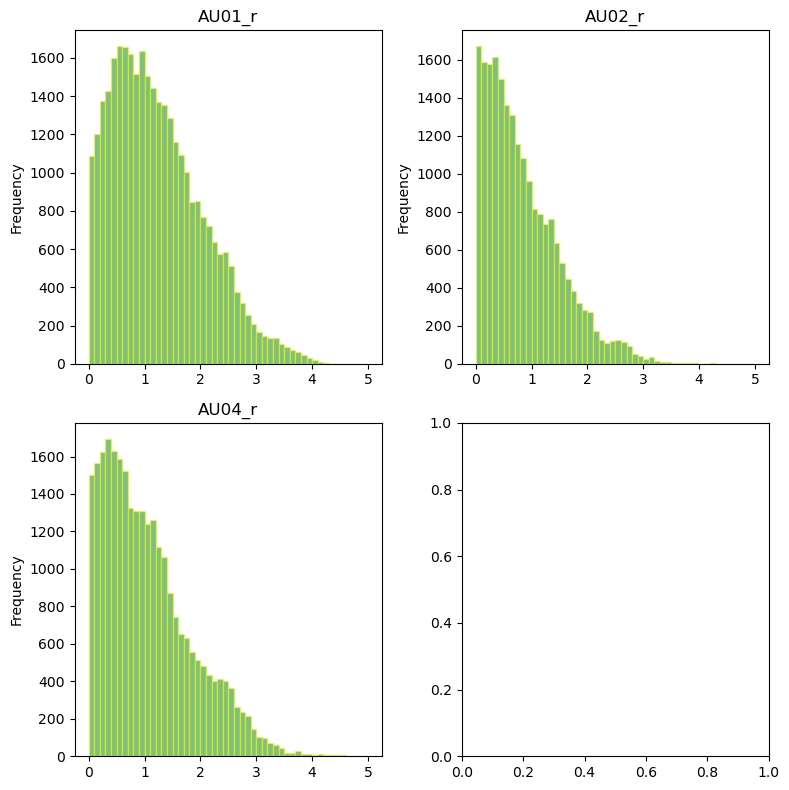

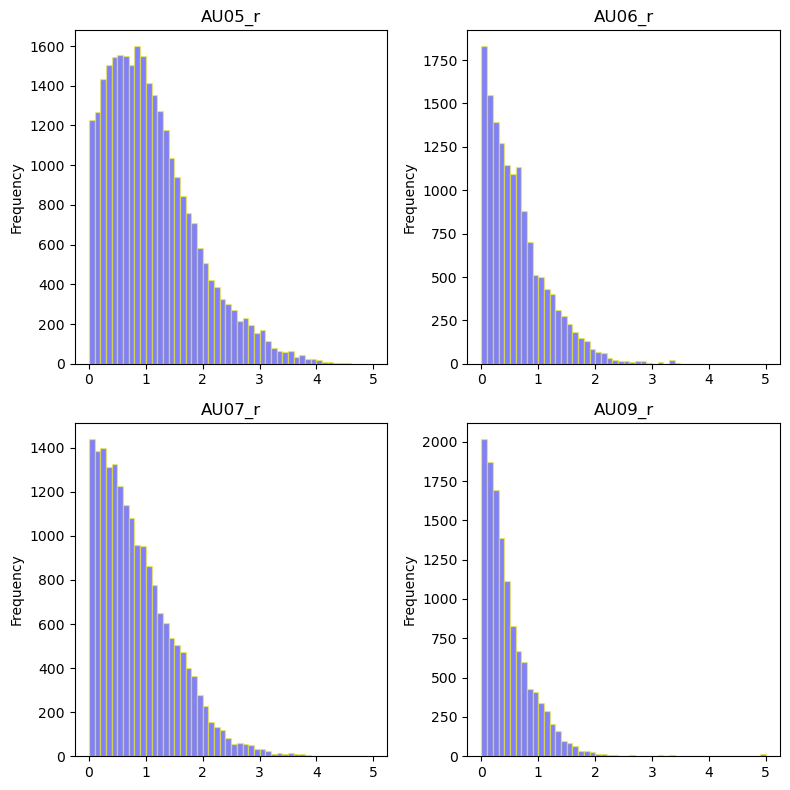

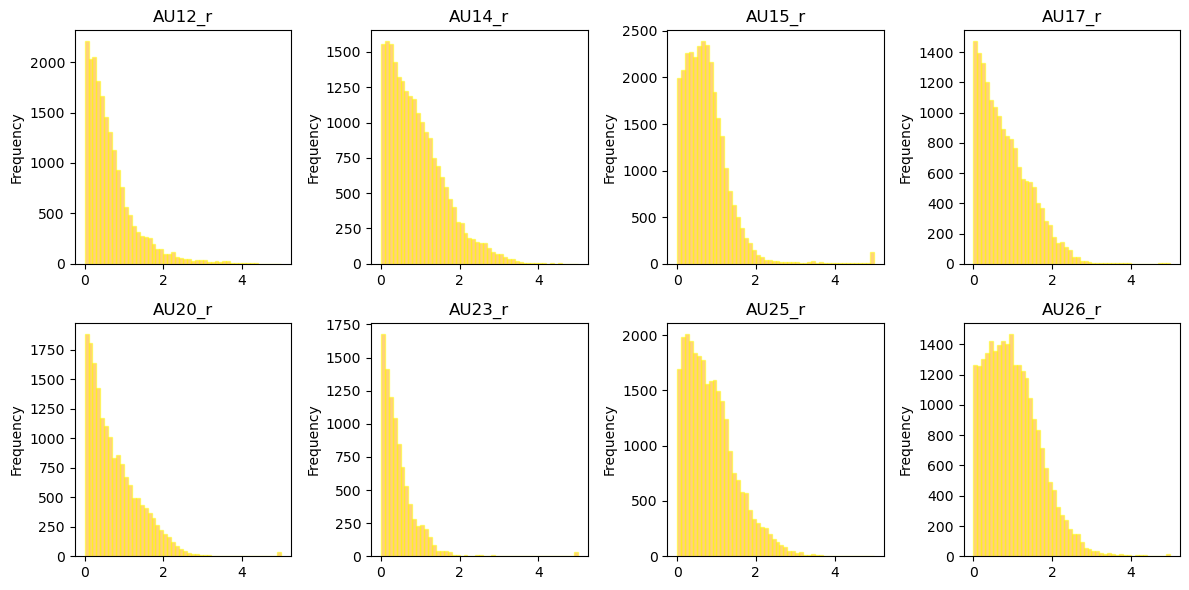

In [258]:
#plot graphs divided by category (eyes, midpart, mouth)

pdf = PdfPages("output.pdf")
# set figure:eyes
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

count = 0
for i in range(2):
    for j in range(2):
        if i + j > 1:
            continue
        au = COLSETS['eyes'][count]
        df[au].plot.hist(bins=50, range=[0.001, 5], ec="yellow", fc="green", alpha=0.5, ax=ax[i, j])
        ax[i, j].set_title(au)
        count += 1

plt.tight_layout()
plt.show()
pdf.savefig(fig)


# set figure: midpart
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

count = 0
for i in range(2):
    for j in range(2):
        au = COLSETS['midpart'][count]
        df[au].plot.hist(bins=50, range=[0.001, 5], ec="yellow", fc="blue", alpha=0.5, ax=ax[i, j])
        ax[i, j].set_title(au)
        count += 1

plt.tight_layout()
plt.show()
pdf.savefig(fig)


# set figure: mouth
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

count = 0
for i in range(2):
    for j in range(4):
        au = COLSETS['mouth'][count]
        df[au].plot.hist(bins=50, range=[0.001, 5], ec="yellow", fc="orange", alpha=0.5, ax=ax[i, j])
        ax[i, j].set_title(au)
        count += 1

plt.tight_layout()
plt.show()

#save plot
pdf.savefig(fig)




pdf.close()

Prosess file MonsterInLaw ...
ok reading csv...


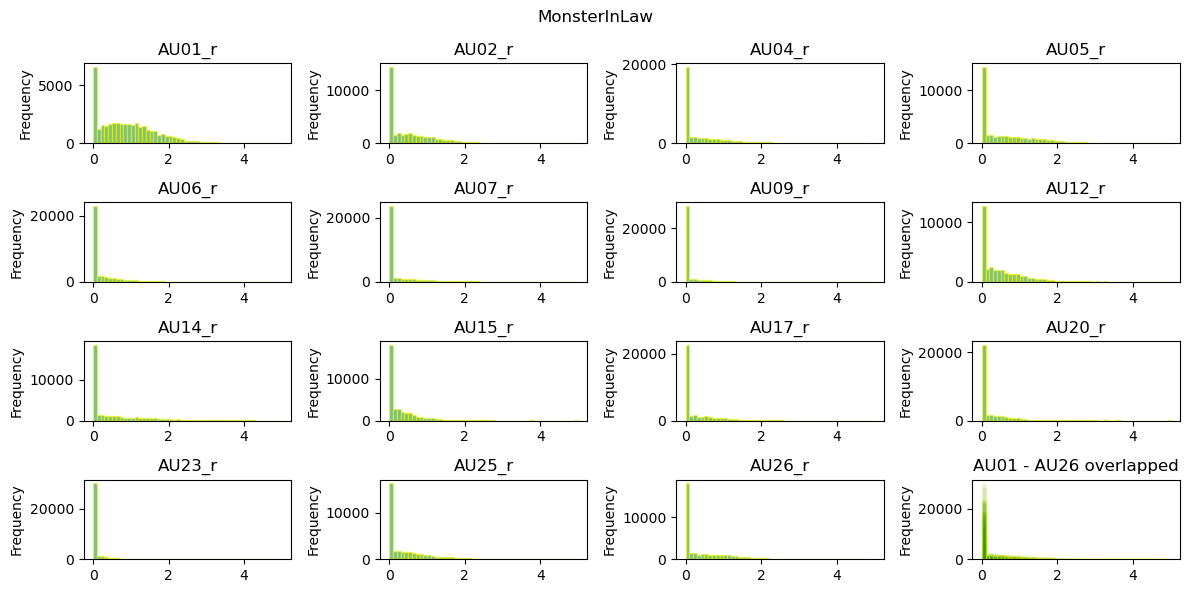

Prosess file QuantumOfSolace ...
ok reading csv...


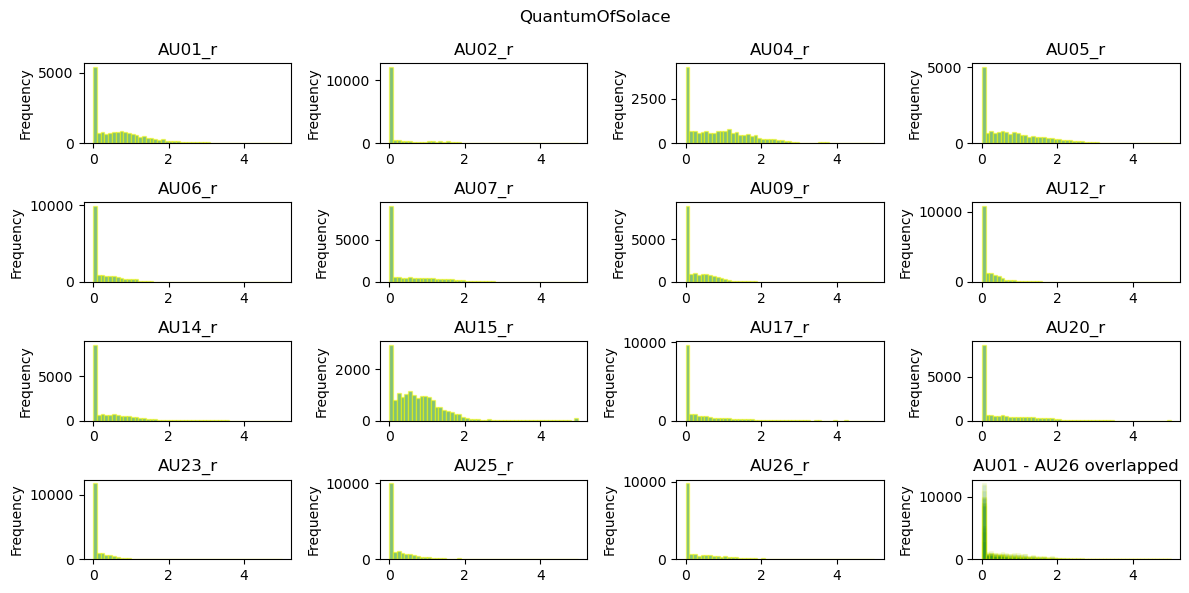

Prosess file Clean ...
ok reading csv...


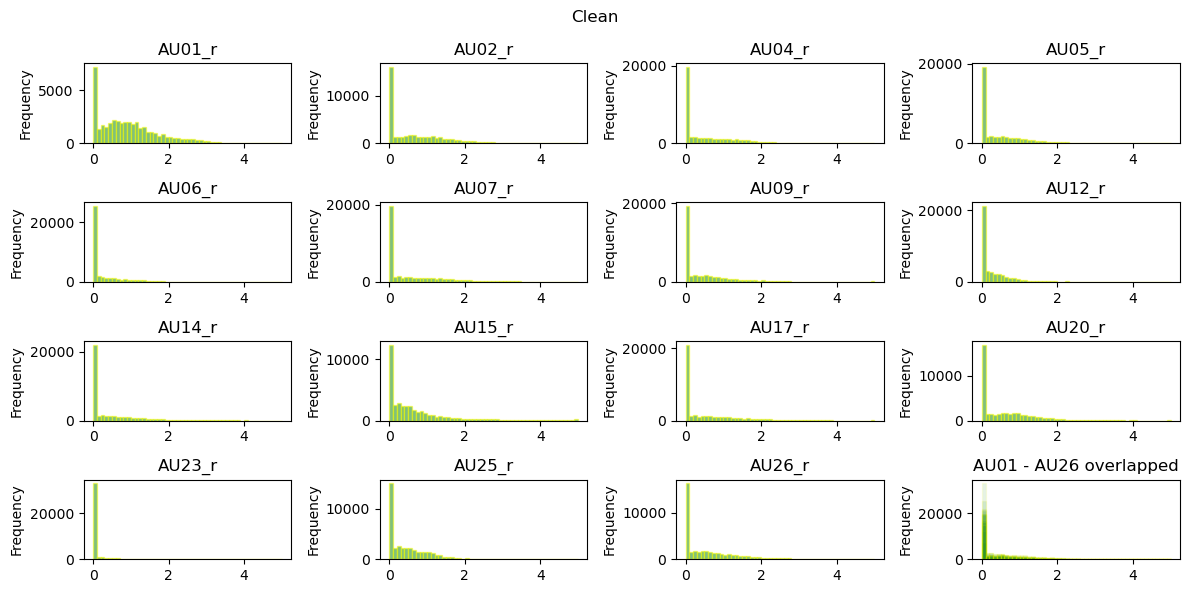

Prosess file Synecdoche ...
ok reading csv...


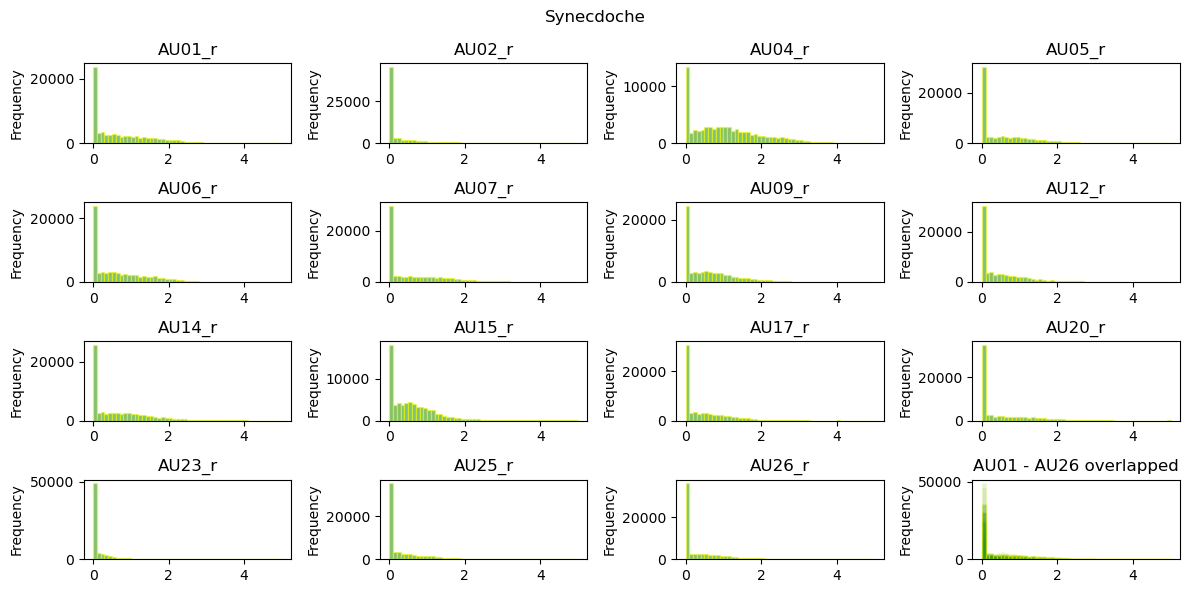

Prosess file BrightStar ...
ok reading csv...


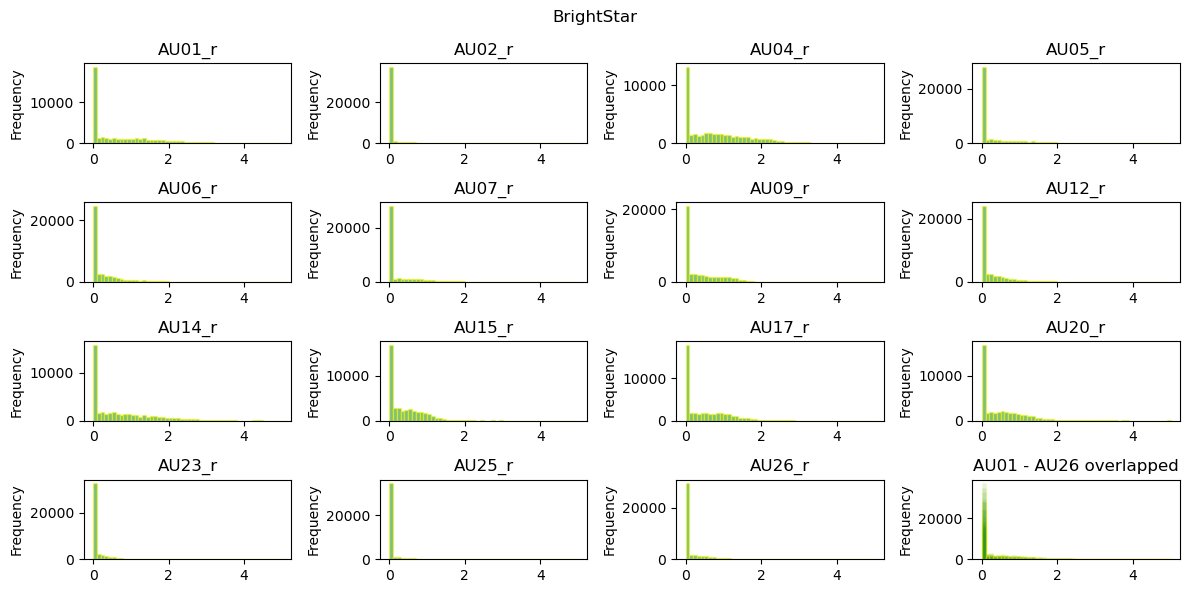

Prosess file Click ...
ok reading csv...


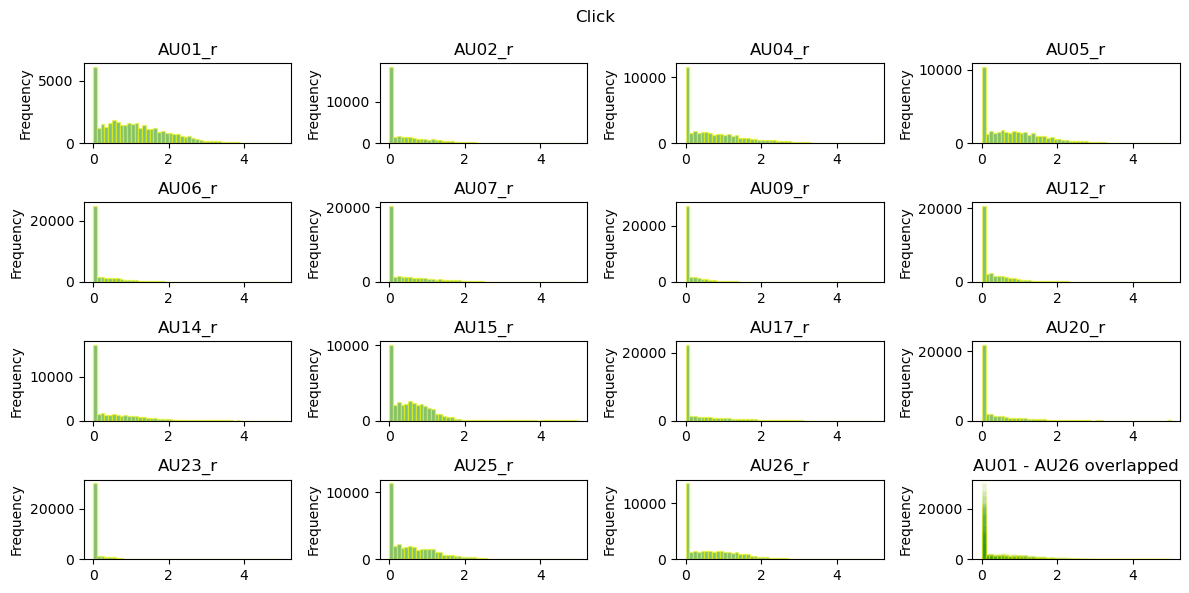

Prosess file CertifiedCopy ...
ok reading csv...


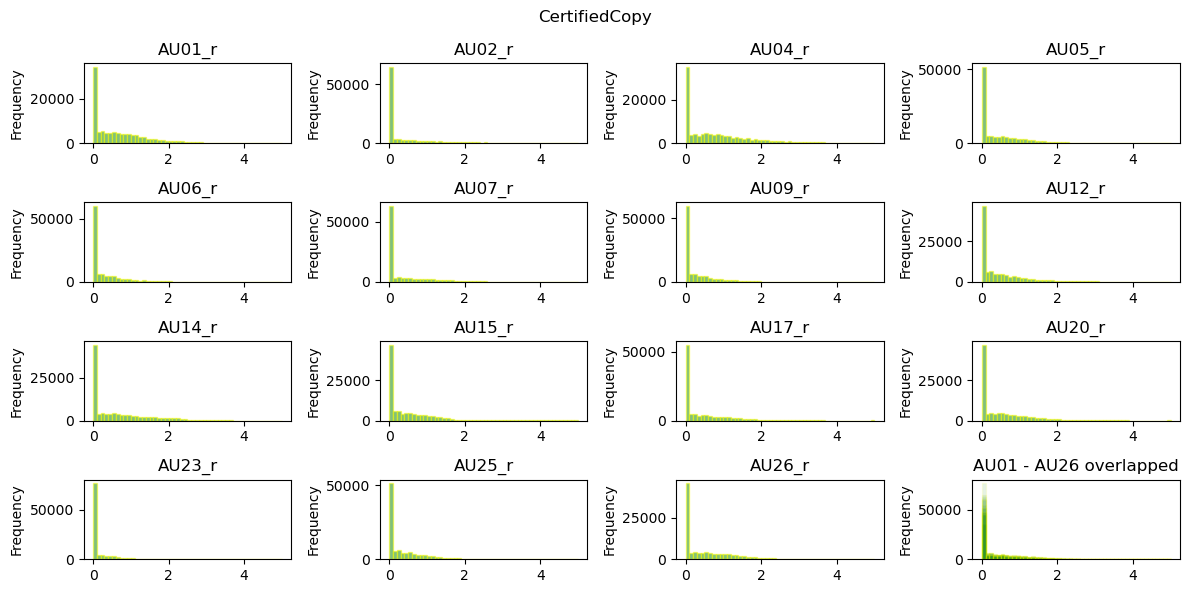

Prosess file Spider ...
ok reading csv...


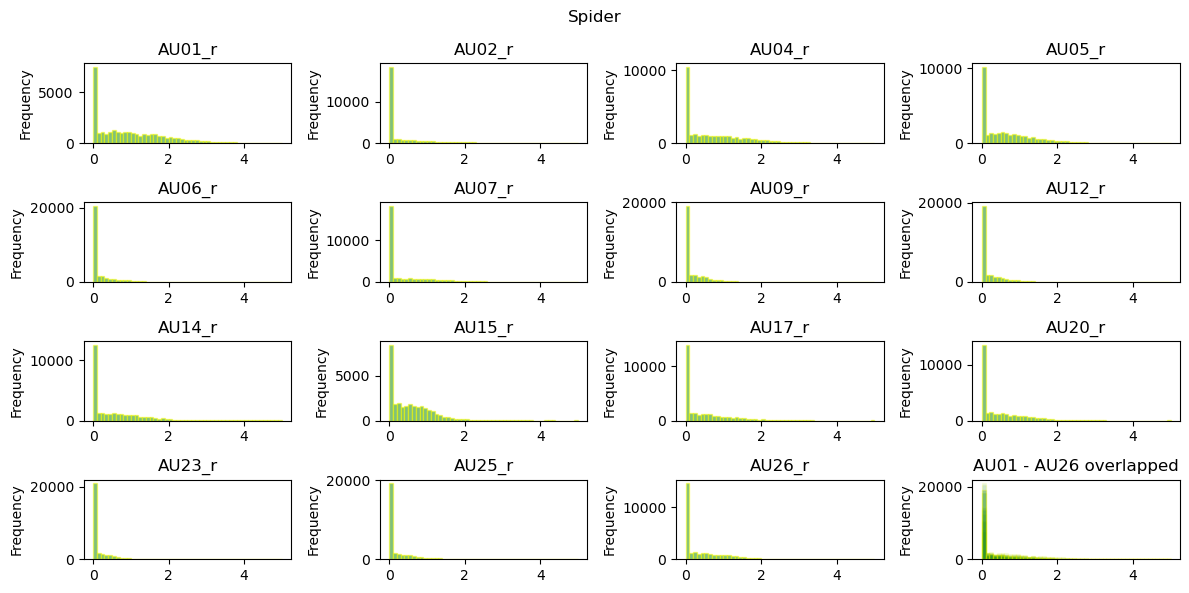

Prosess file AllOrNothing ...
ok reading csv...


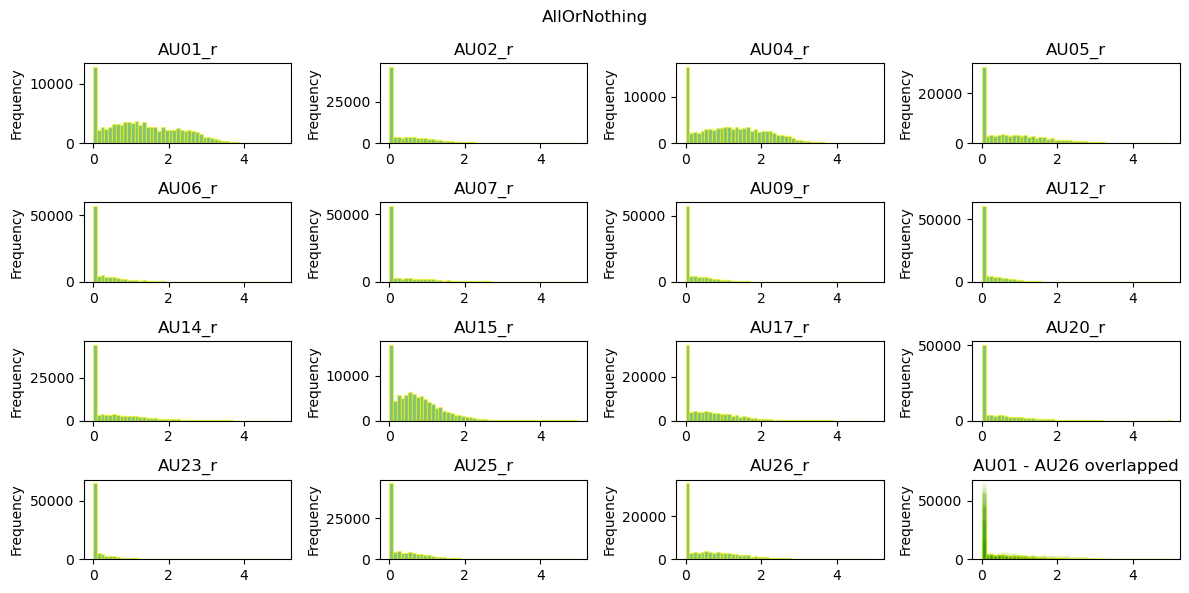

Prosess file PiratesOfCaribbean ...
ok reading csv...


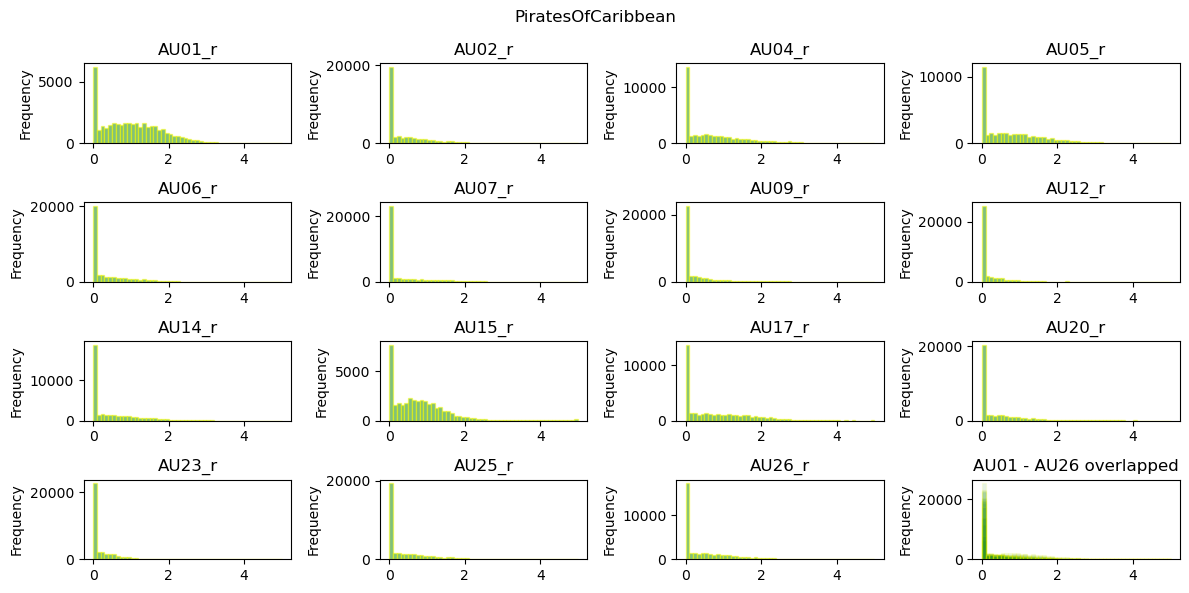

Prosess file TheDarkKnight ...
ok reading csv...


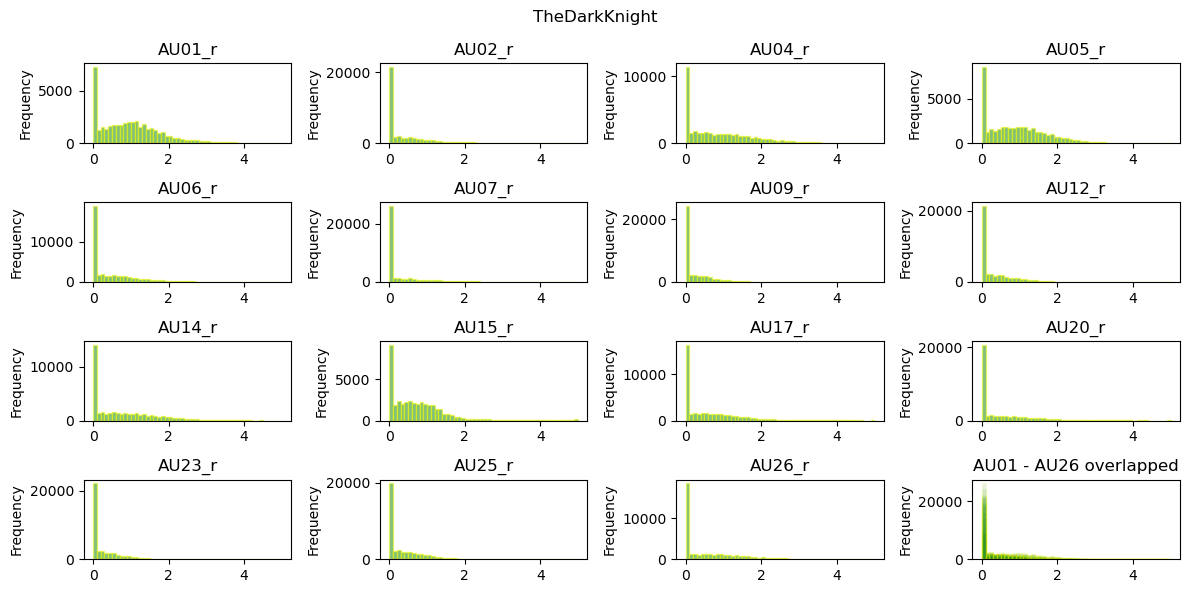

Prosess file FastAndFurious ...
ok reading csv...


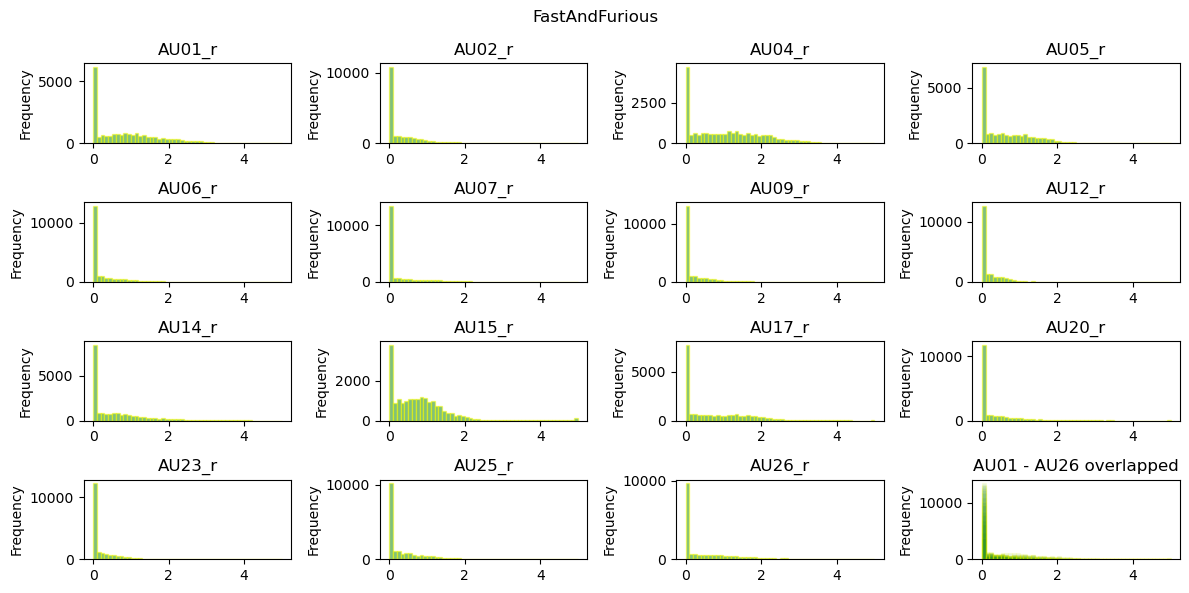

In [304]:
#plot graphs of all AUs in all files and save in a pdf format (one figure == all AUs of one file)
pdf = PdfPages("AUgraphs_by_movie_excl0.pdf") #filename


for i in filenames:
    name = i.split('.')[0][:-2]
    print('Prosess file', name, '...')
    df = pd.read_csv(FOLDER_INPUT + i, delimiter=',')
    print('ok reading csv...')

    # set figure
    fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(12, 6))
    fig.suptitle(name)

    count = 0
    for i in range(4):
        for j in range(4):
            if i + j > 5:
                continue
            au = COLSETS['all'][count]
            df[au].plot.hist(bins=50, range=[0.001, 5], ec="yellow", fc="green", alpha=0.5, ax=ax[i, j])
            ax[i, j].set_title(au)

            df[au].plot.hist(bins=50, range=[0.001, 5], ec="yellow", fc="green", alpha=0.1, ax=ax[3, 3])
            ax[3, 3].set_title('AU01 - AU26 overlapped')

            count += 1


    plt.tight_layout()
    plt.show()

    #save plot
    pdf.savefig(fig)

pdf.close()

In [281]:
data = {}

for i in filenames:
    name = i.split('.')[0][:-2]
    print('Prosess file', name, '...')
    df = pd.read_csv(FOLDER_INPUT + i, delimiter=',')
    print('ok reading csv...')
    data[name] = df

Prosess file MonsterInLaw ...
ok reading csv...
Prosess file QuantumOfSolace ...
ok reading csv...
Prosess file Clean ...
ok reading csv...
Prosess file Synecdoche ...
ok reading csv...
Prosess file BrightStar ...
ok reading csv...
Prosess file Click ...
ok reading csv...
Prosess file CertifiedCopy ...
ok reading csv...
Prosess file Spider ...
ok reading csv...
Prosess file AllOrNothing ...
ok reading csv...
Prosess file PiratesOfCaribbean ...
ok reading csv...
Prosess file TheDarkKnight ...
ok reading csv...
Prosess file FastAndFurious ...
ok reading csv...


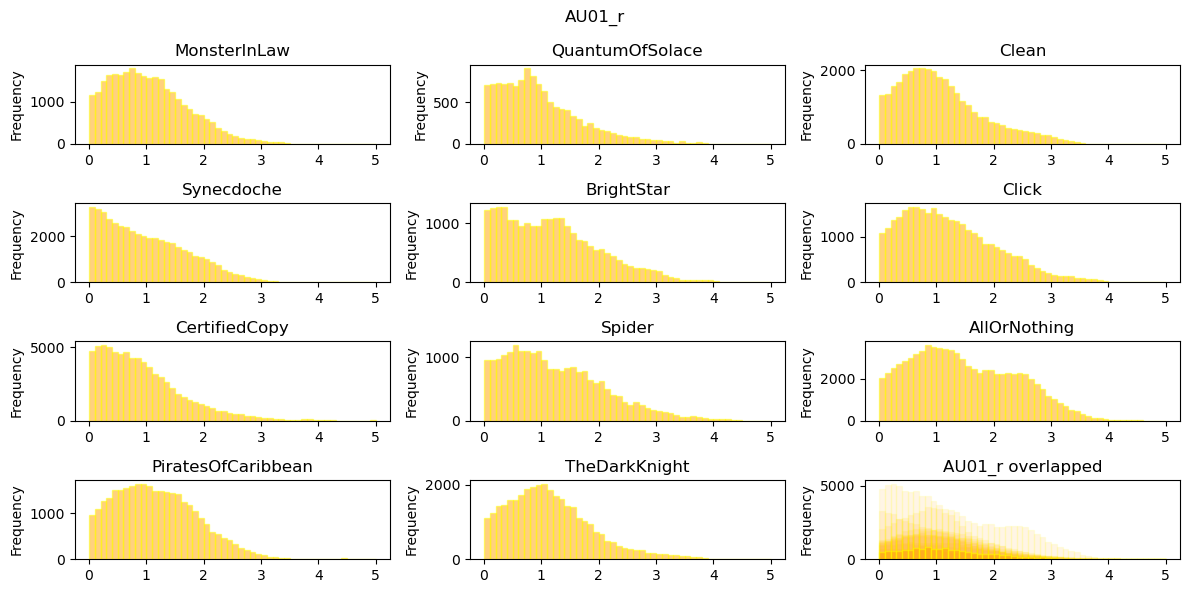

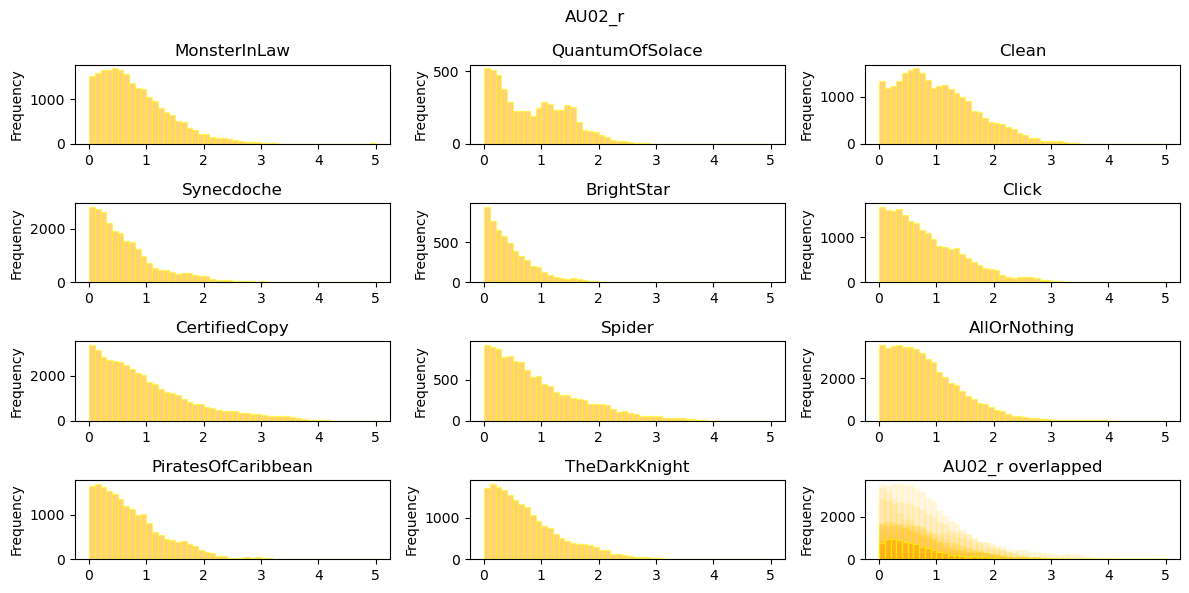

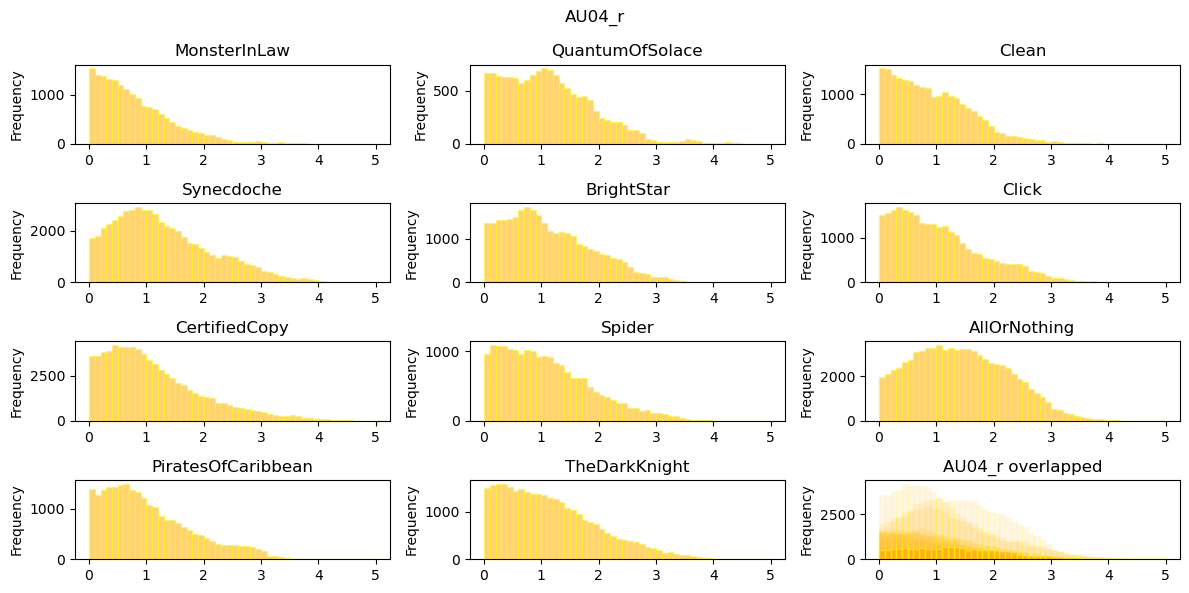

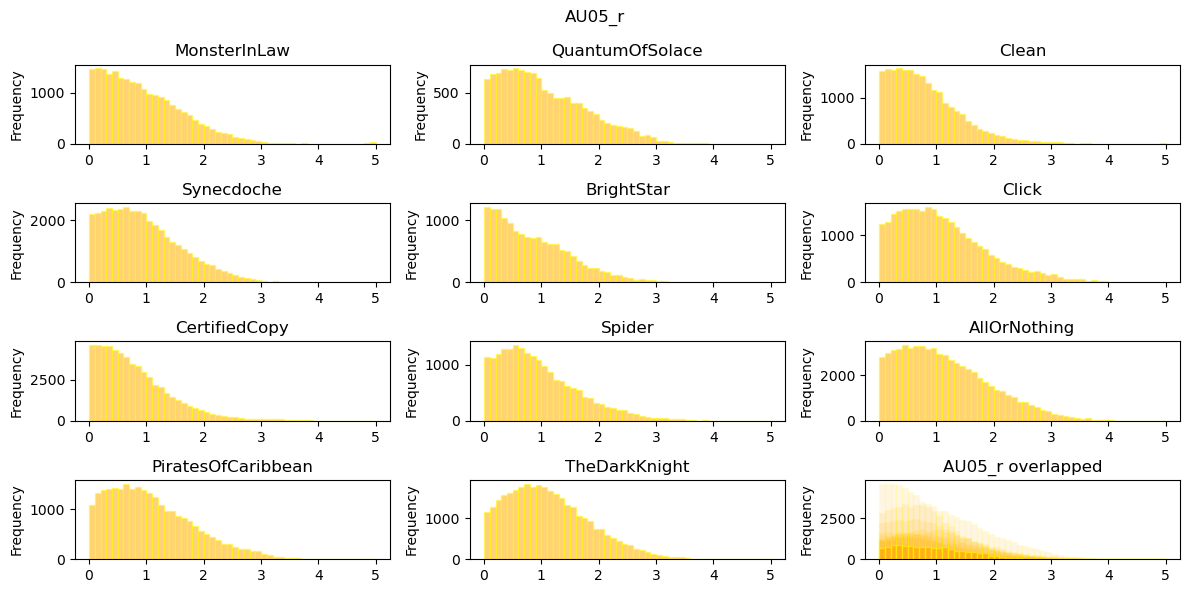

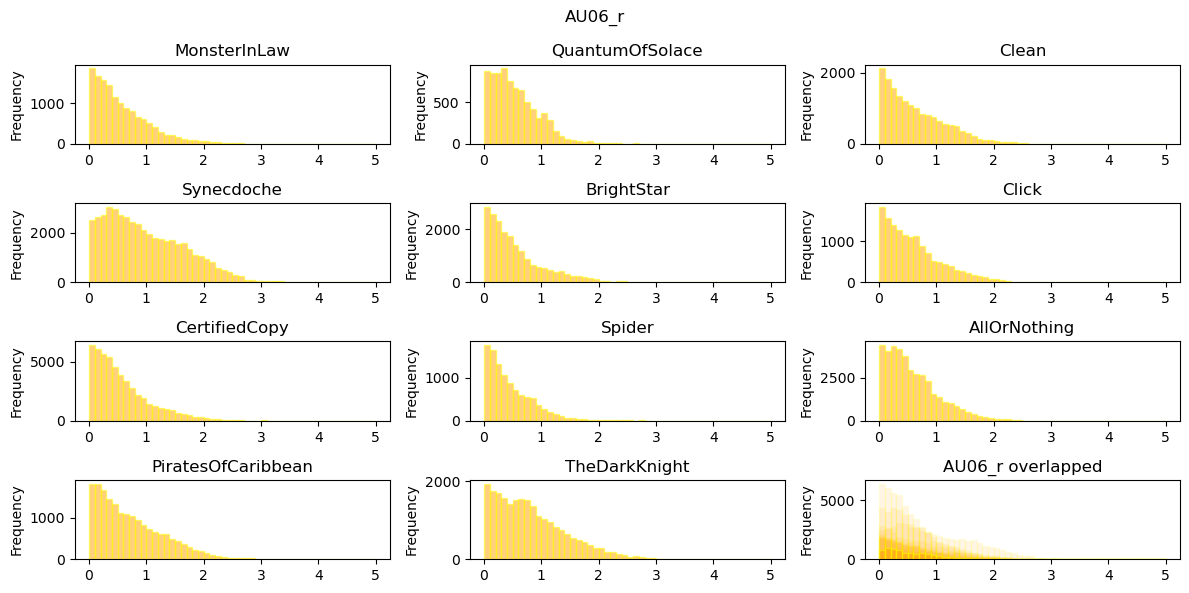

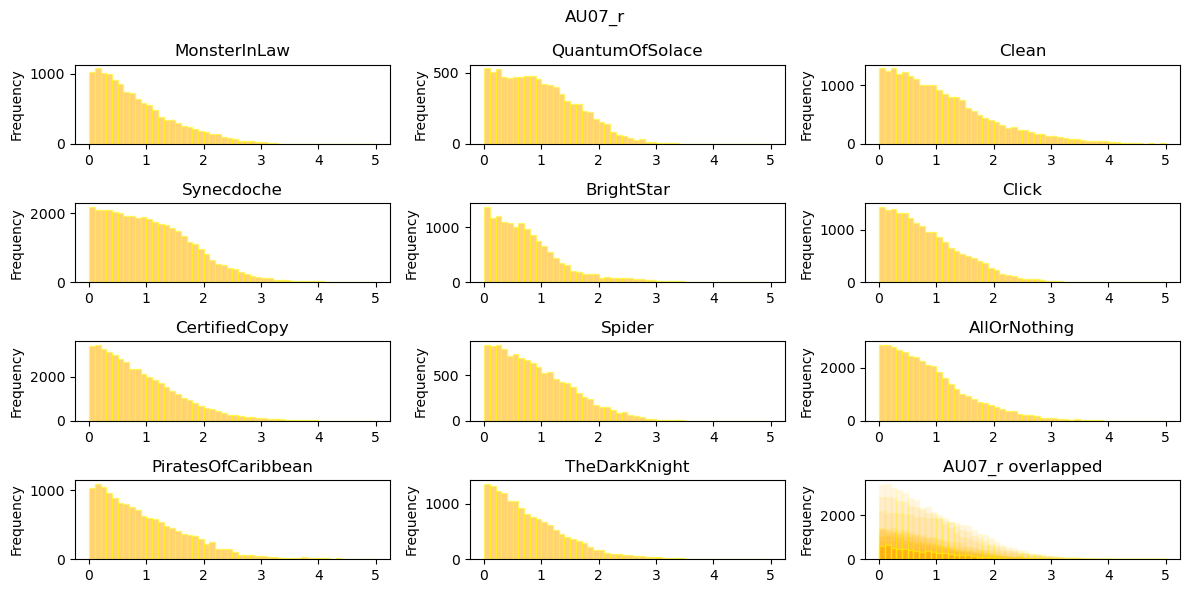

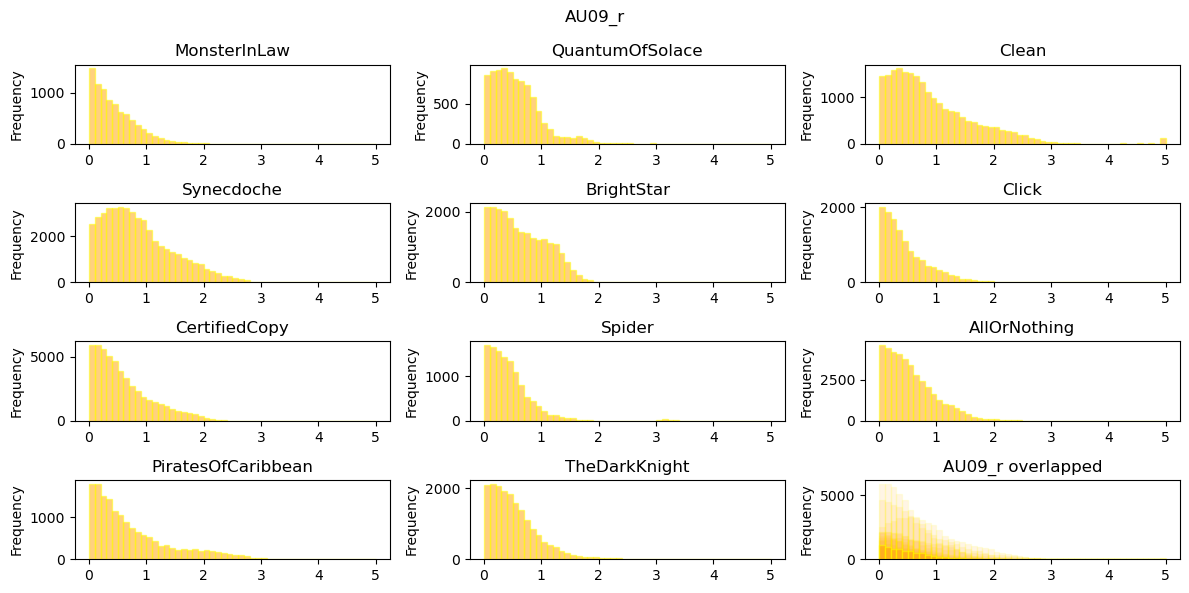

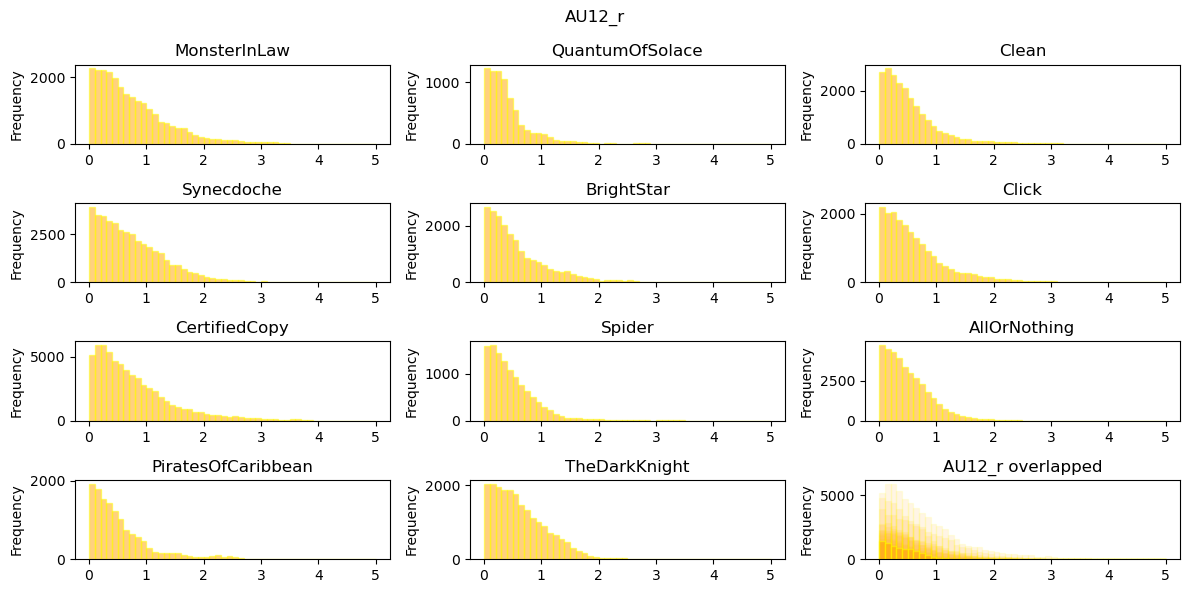

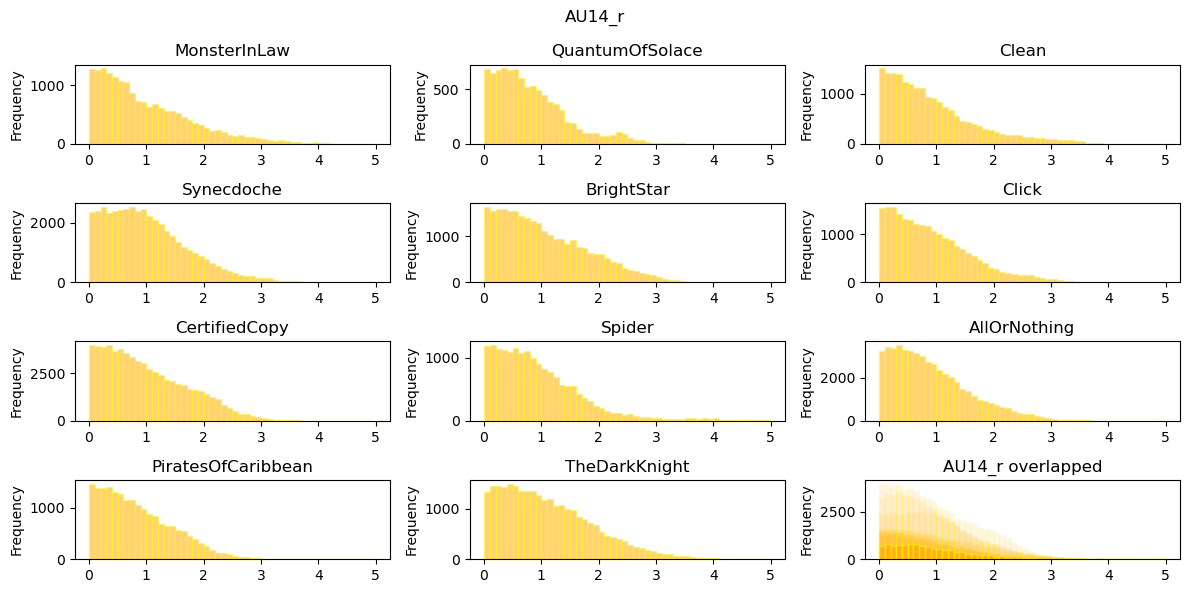

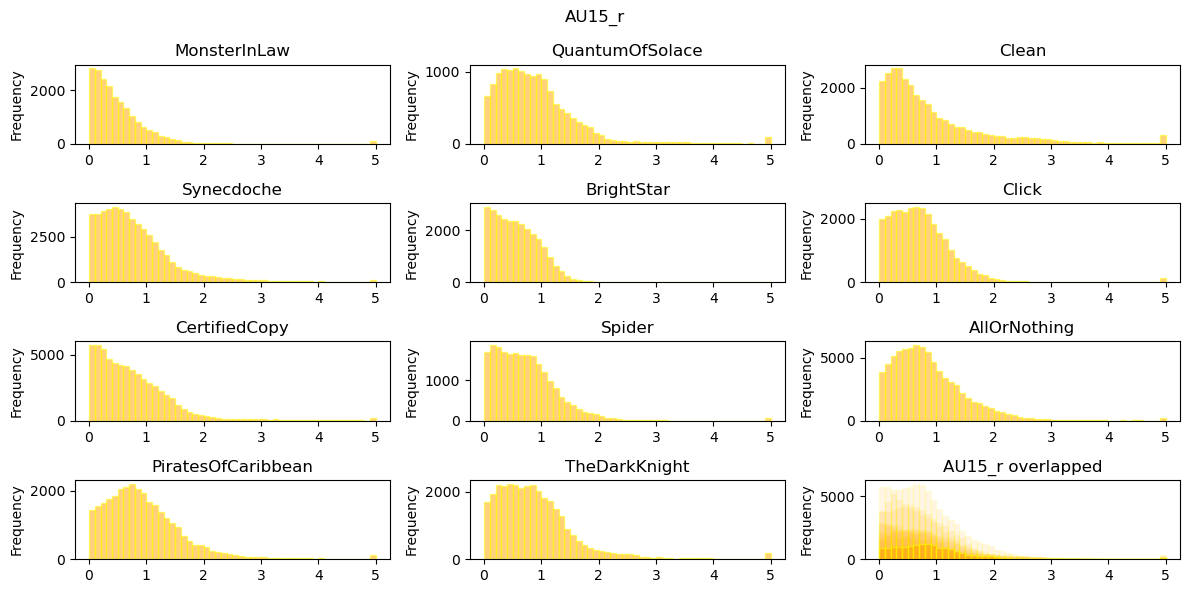

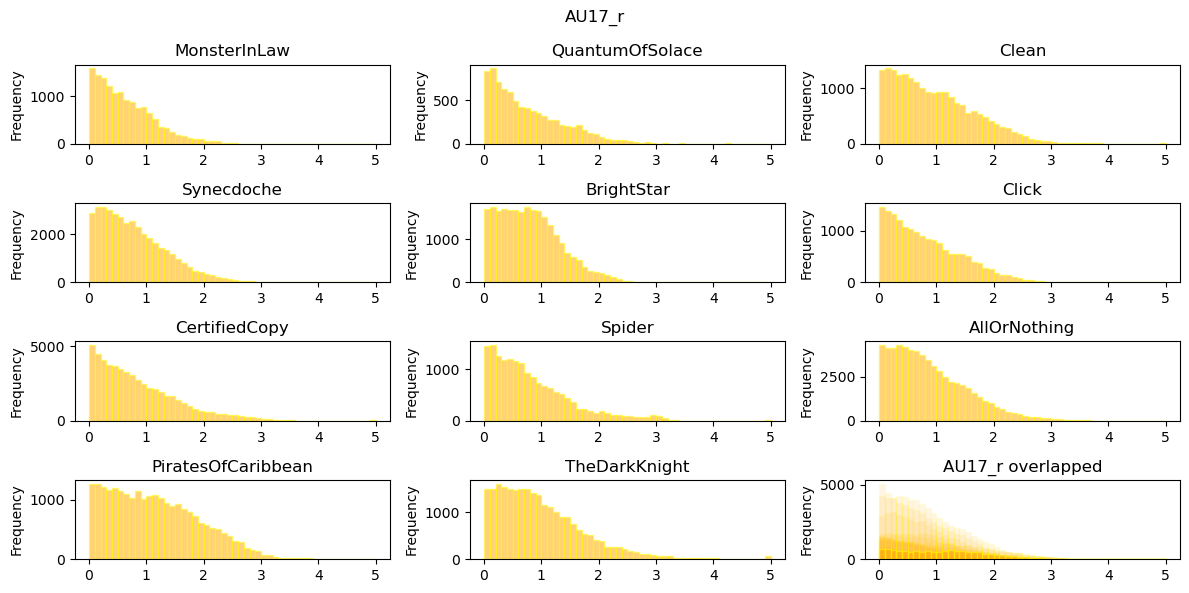

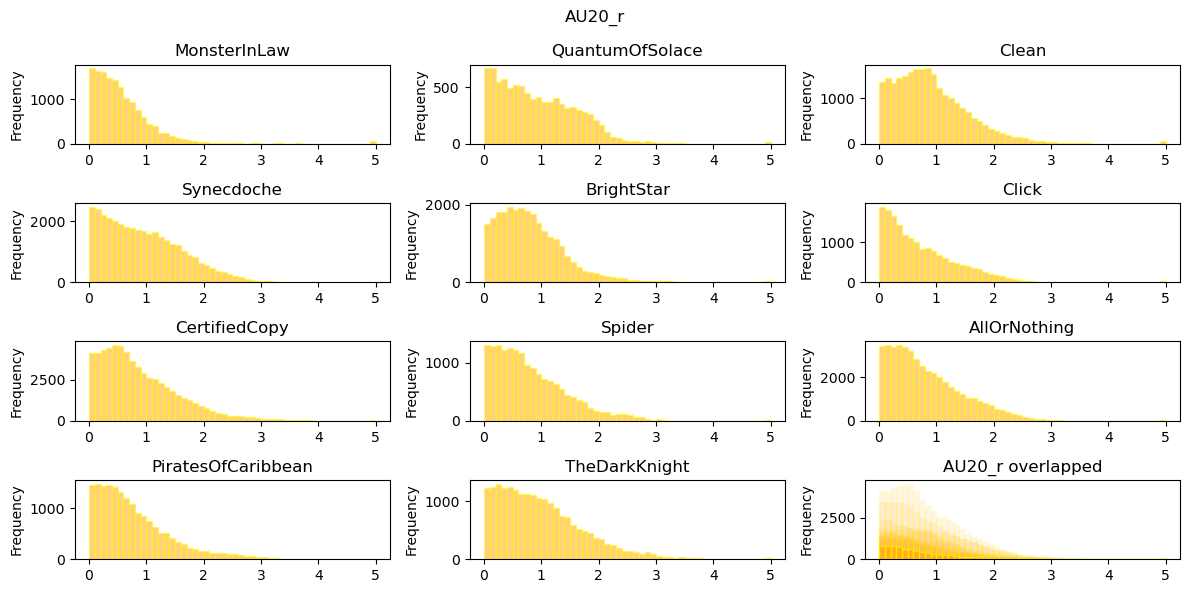

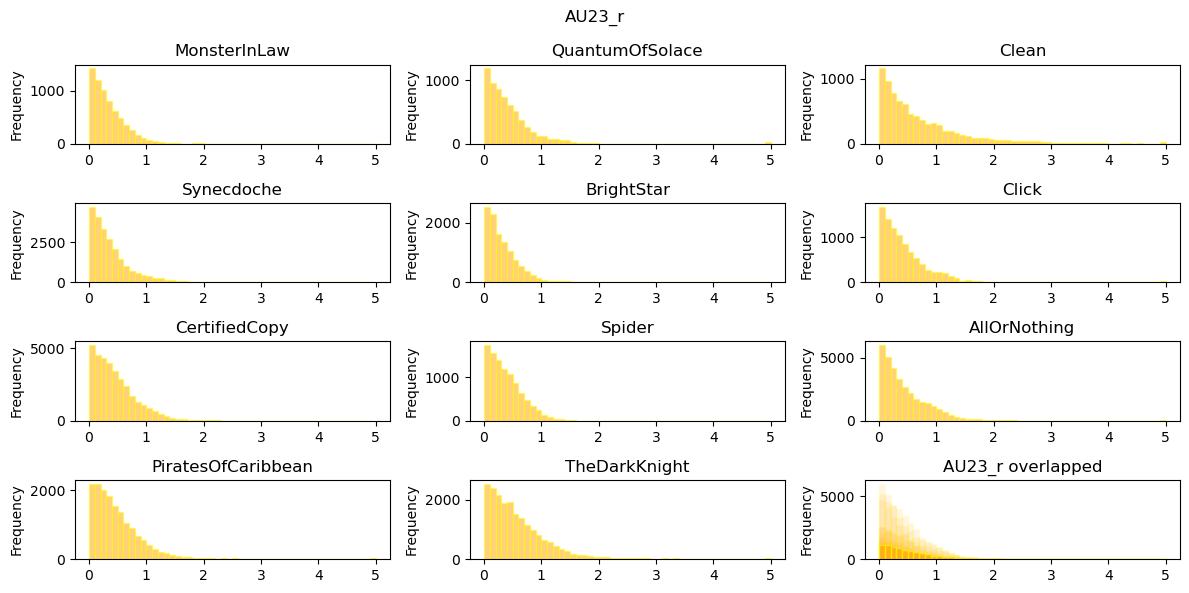

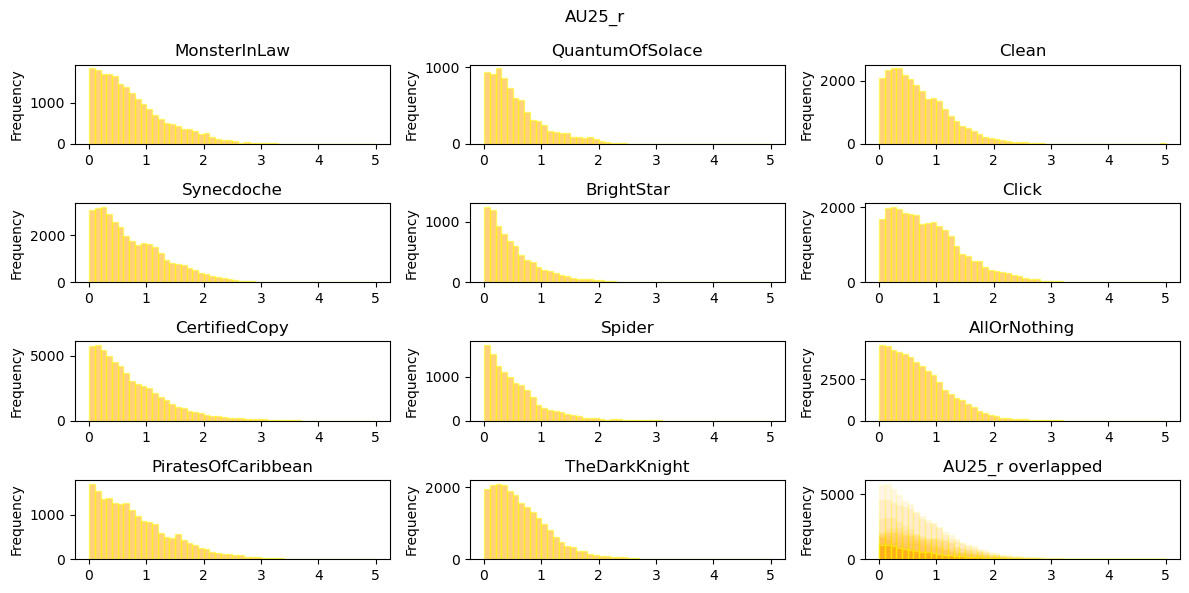

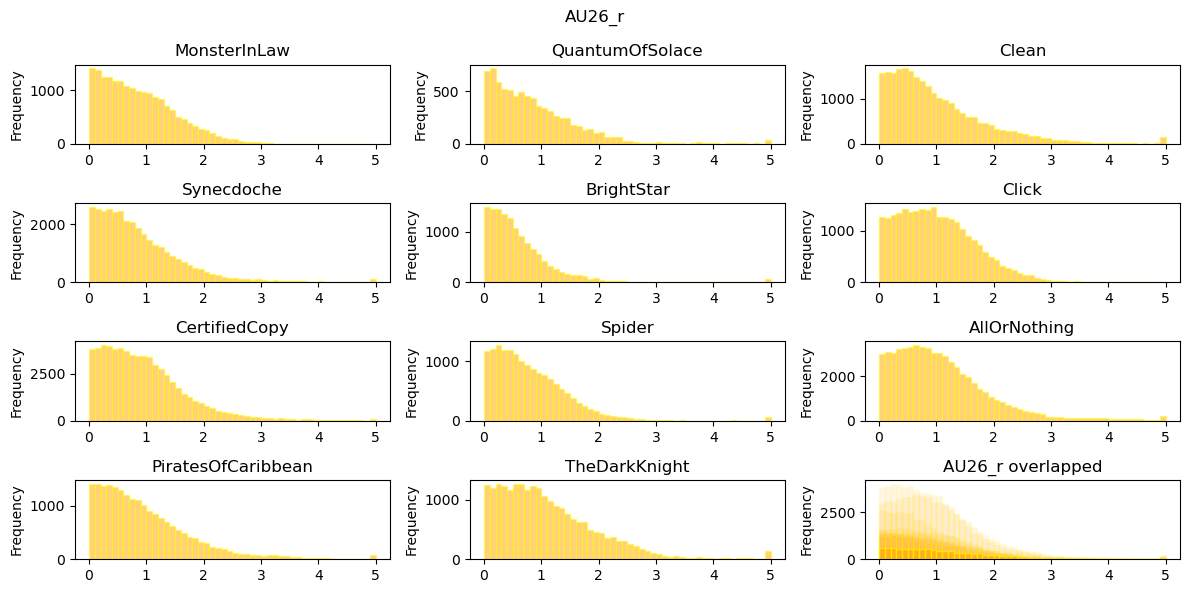

In [302]:
#plot graphs of all AUs in all files and save in a pdf format (one figure == all AUs of one file)
pdf = PdfPages("AU_by_number_excl0.pdf") #filename


for au in COLSETS['all']:
    # set figure
    fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(12, 6))
    fig.suptitle(au)

    
    names = list(data.keys())
    count = 0

    for i in range(4):
        for j in range(3):
            if i + j > 5:
                continue

            df = data[names[count]] #get a dataset; names[count] is a name of a movie

            au_i = df[au]
            au_i.plot.hist(bins=50, range=[0.001, 5], ec="yellow", fc="orange", alpha=0.5, ax=ax[i, j])
            ax[i, j].set_title(names[count])

            au_i.plot.hist(bins=50, range=[0.001, 5], ec="yellow", fc="orange", alpha=0.1, ax=ax[3, 2])
            ax[3, 2].set_title(au + ' ' + 'overlapped')

            count += 1


    plt.tight_layout()
    plt.show()

    #save plot
    pdf.savefig(fig)

pdf.close()

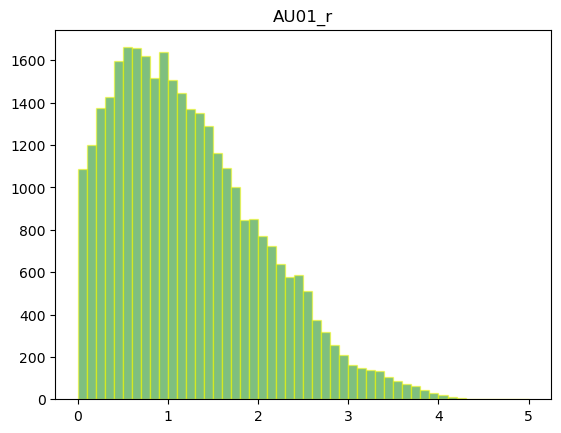

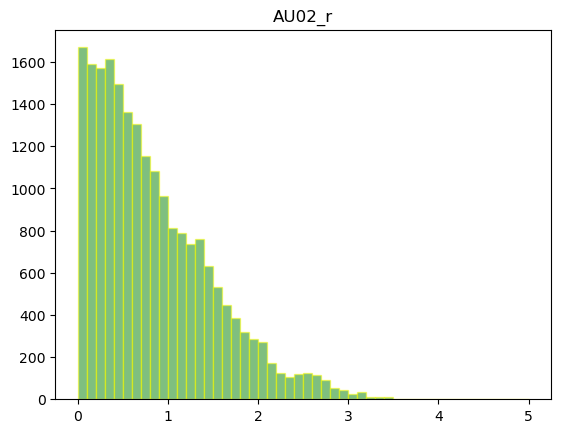

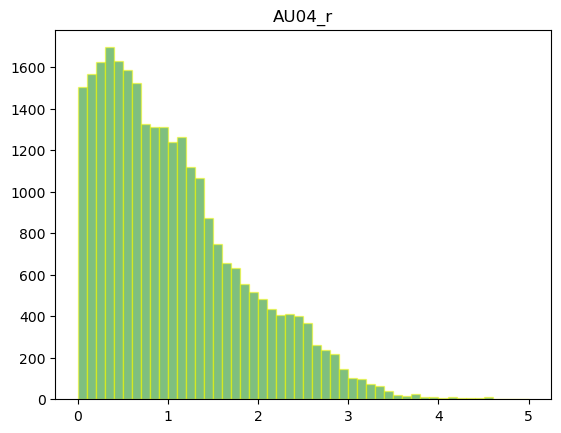

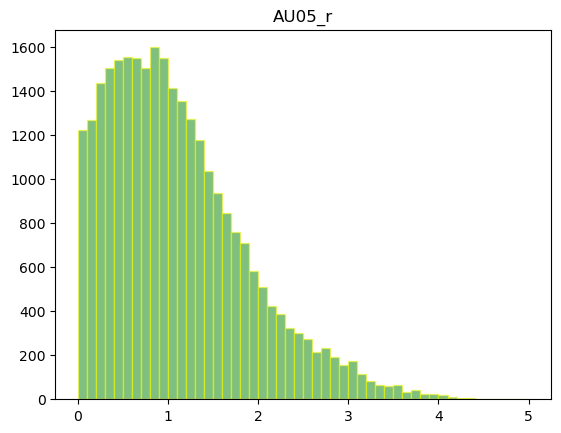

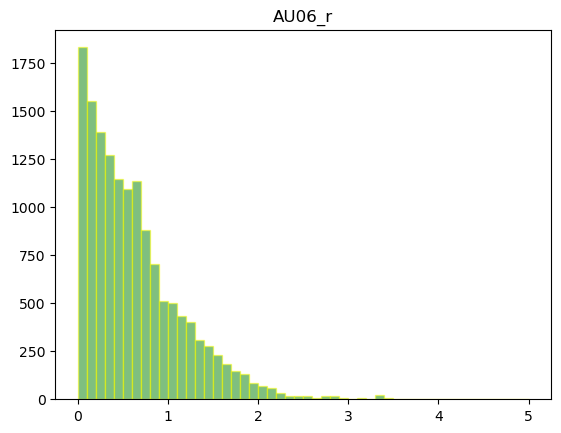

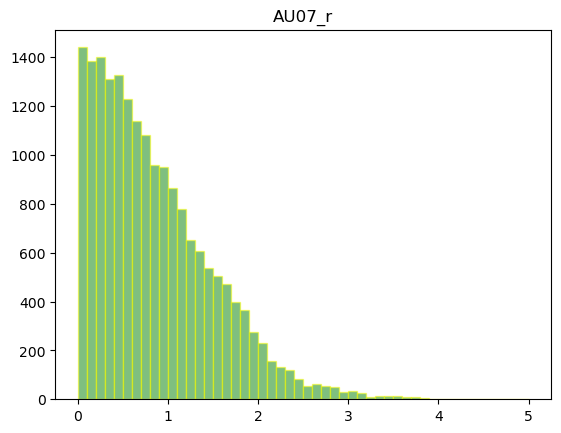

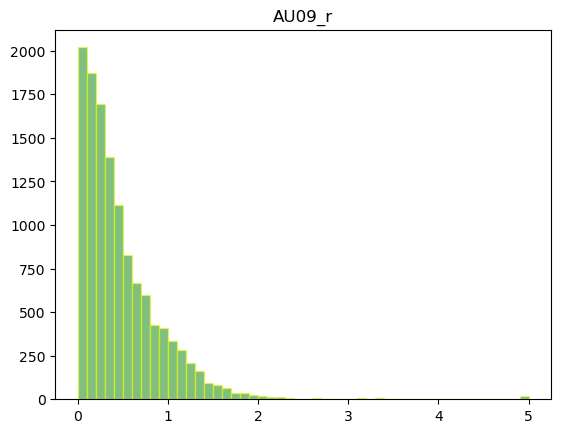

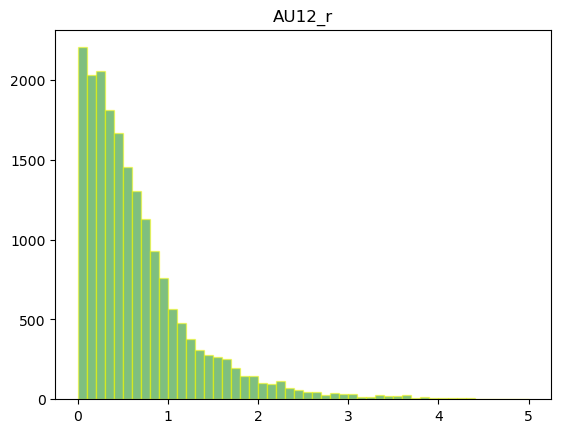

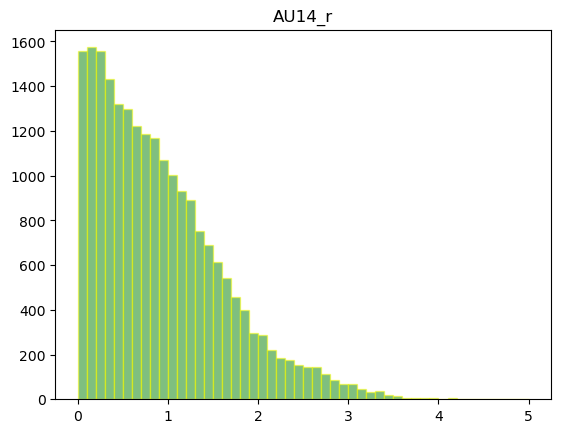

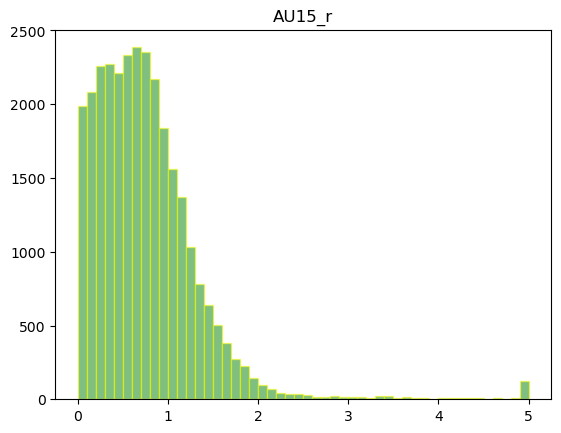

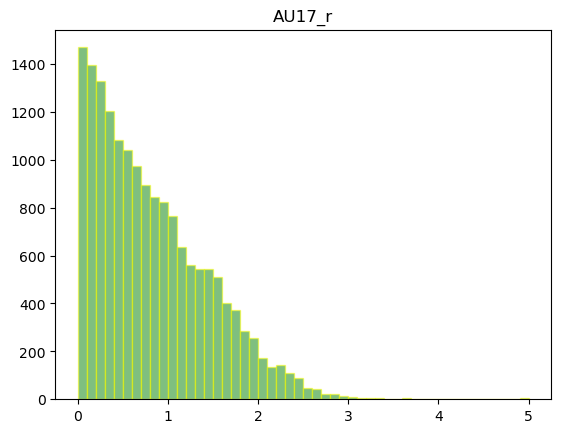

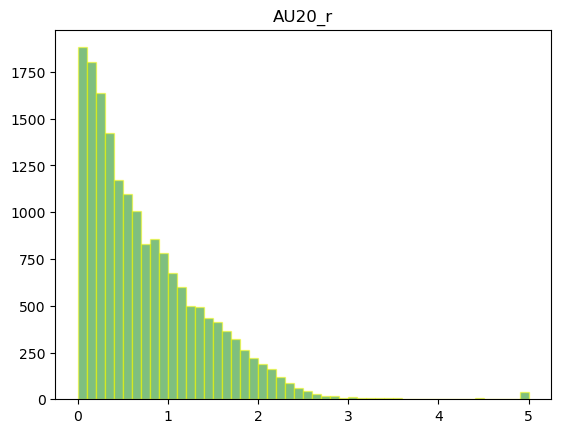

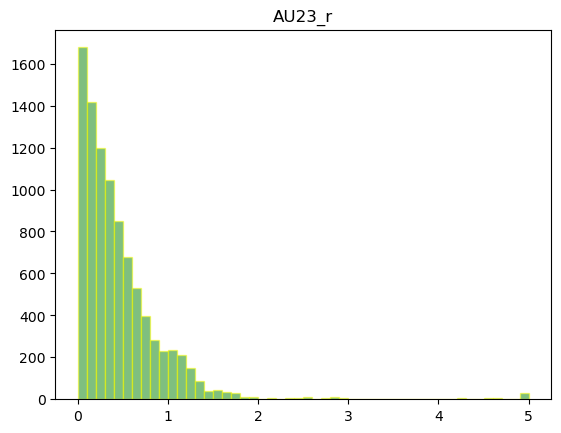

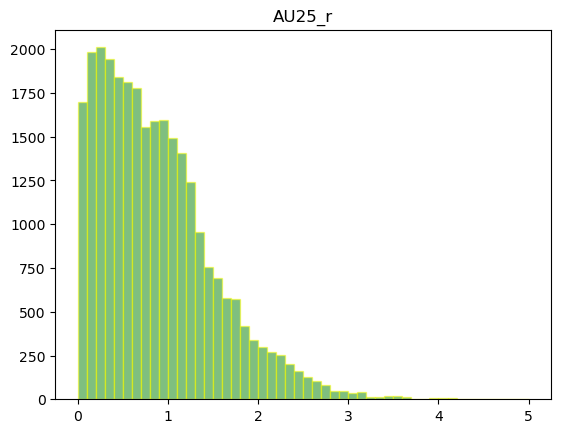

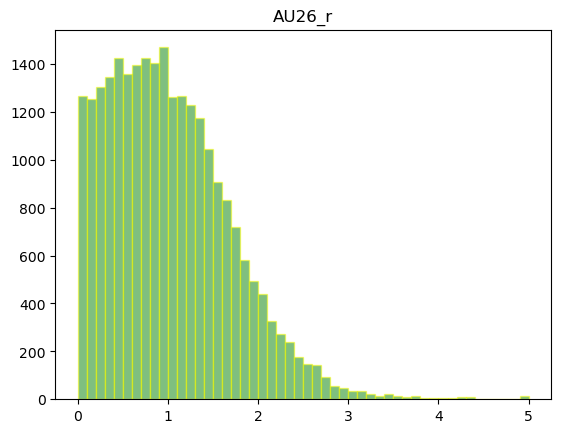

<Figure size 640x480 with 0 Axes>

In [171]:
#f = plt.figure()
#f.set_figheight(1)
for item in COLSETS['all']:
    au = list(df[item])
    plt.hist(au, bins=50, range=[min(au)+0.001, 5], lw=1, ec="yellow", fc="green", alpha=0.5)
    plt.title(item)
    plt.show()
    
    fig = plt.figure()
    fig.savefig('multipleplots.png')


Prosess file MonsterInLaw ...
ok reading csv...
MonsterInLaw AU01_r


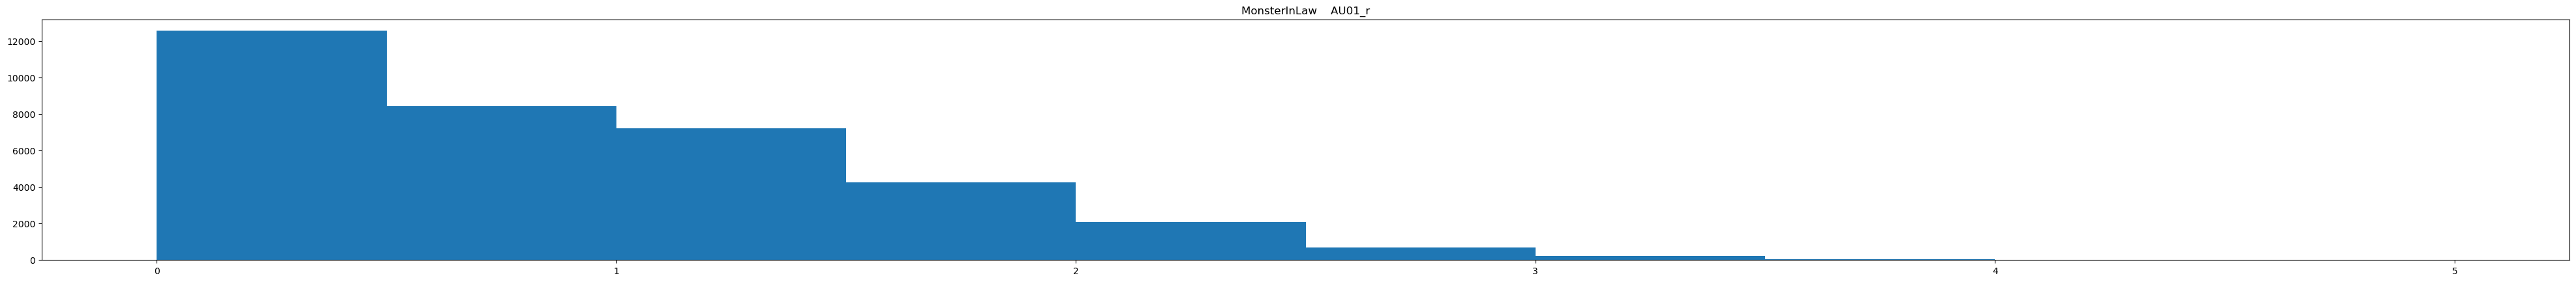

MonsterInLaw AU02_r


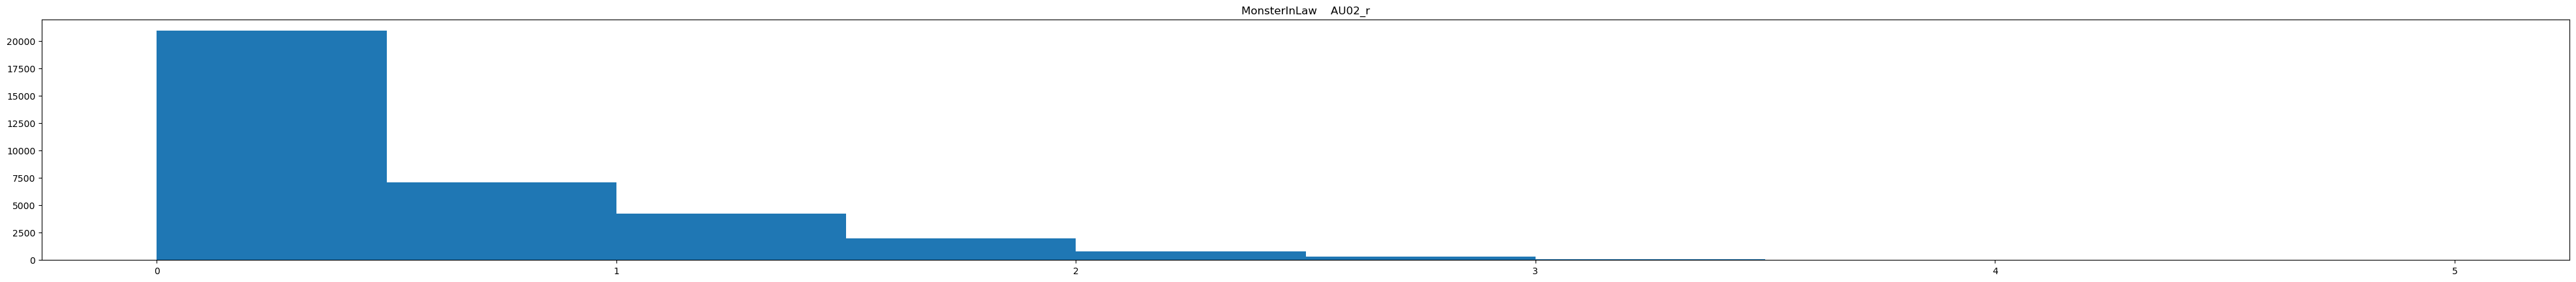

MonsterInLaw AU04_r


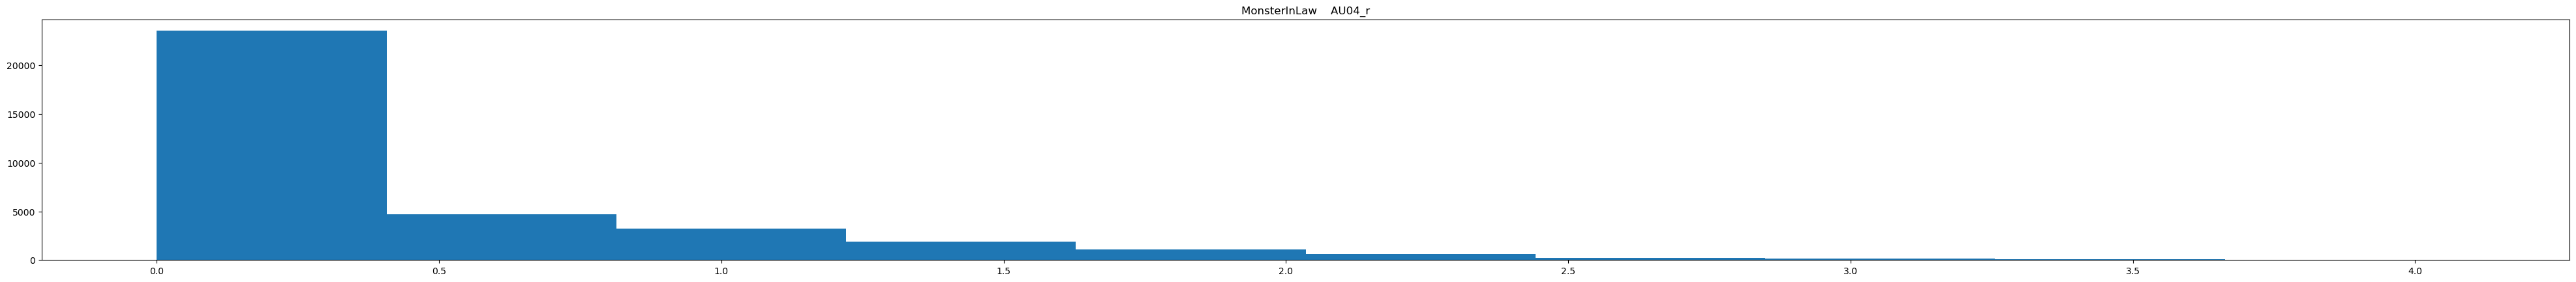

MonsterInLaw AU05_r


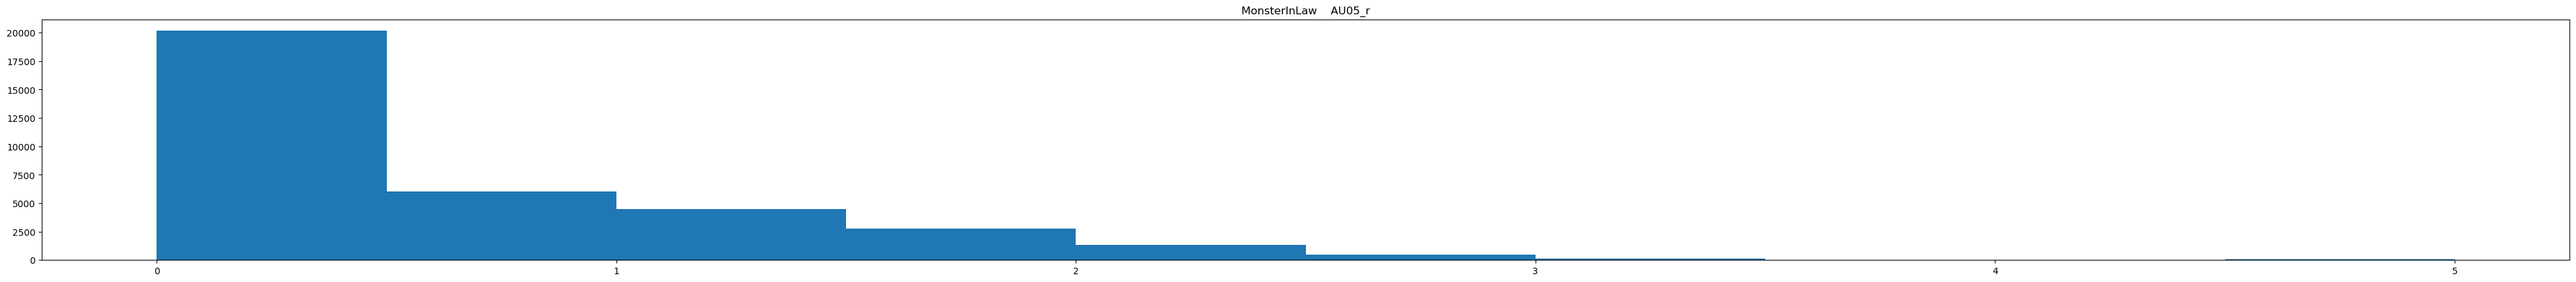

MonsterInLaw AU06_r


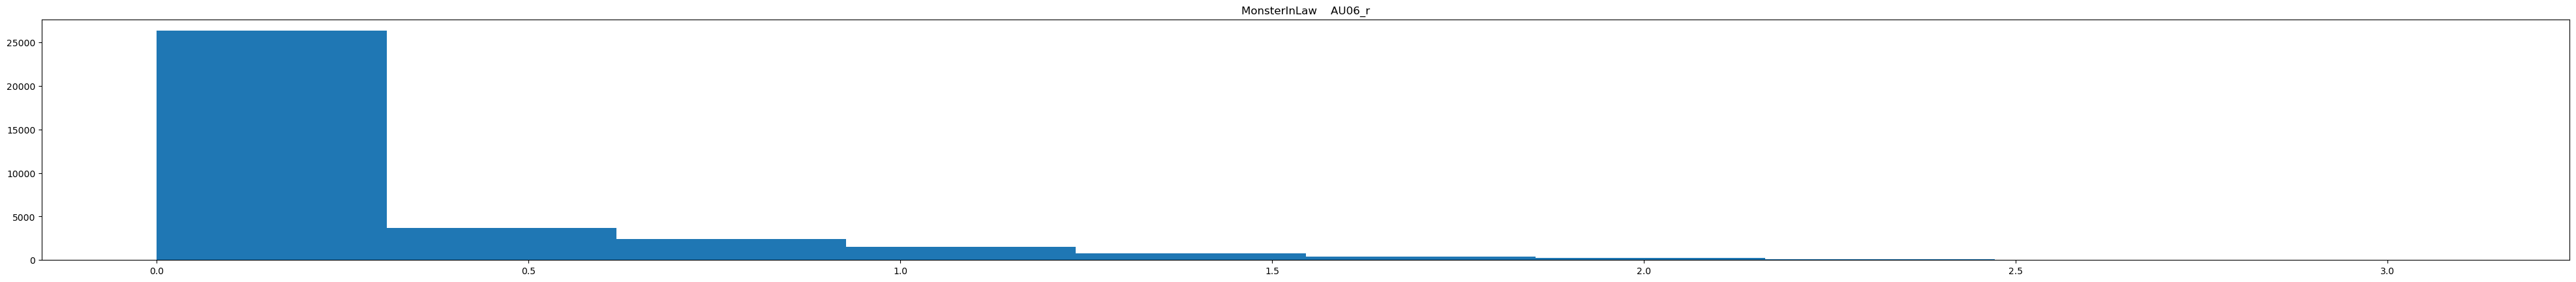

MonsterInLaw AU07_r


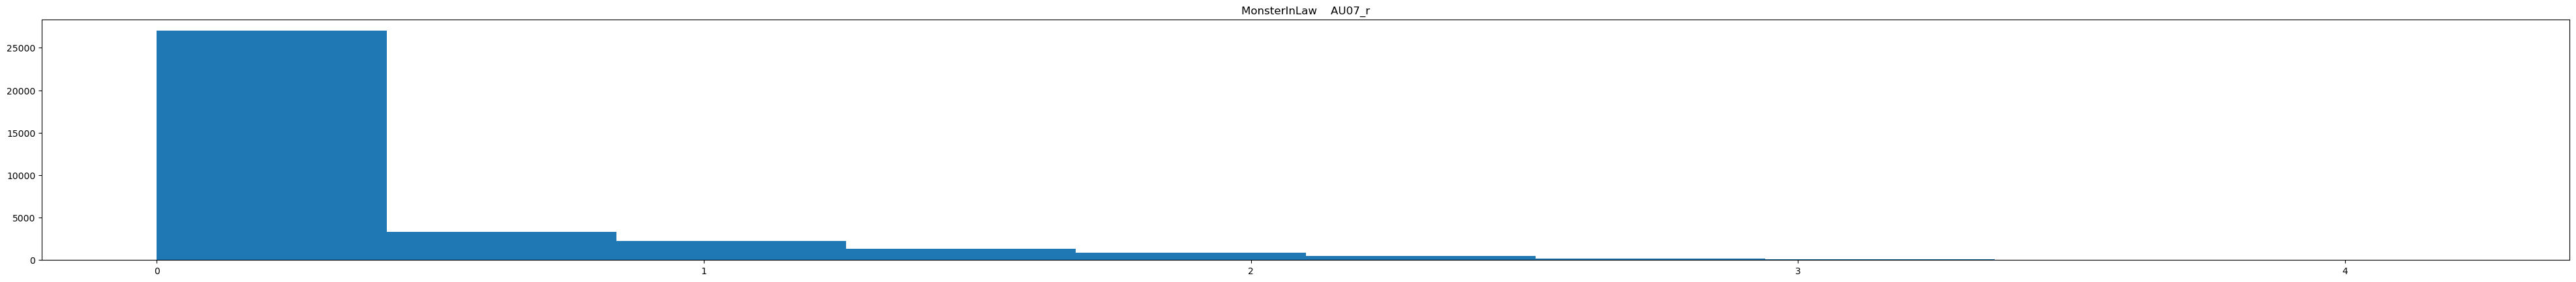

MonsterInLaw AU09_r


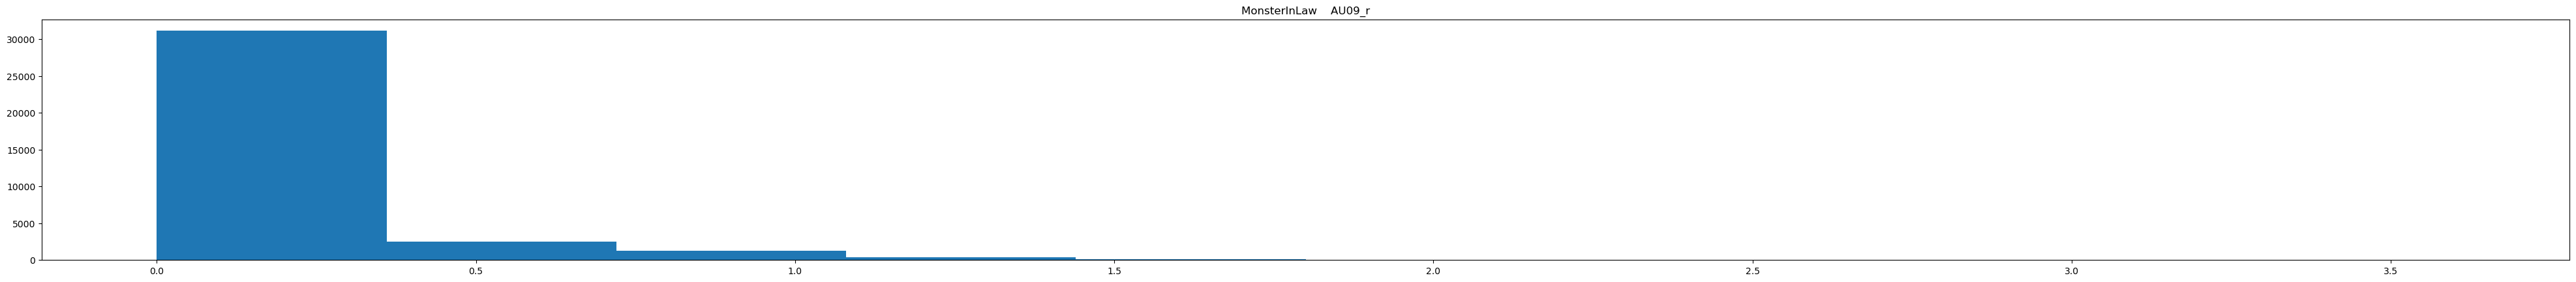

MonsterInLaw AU12_r


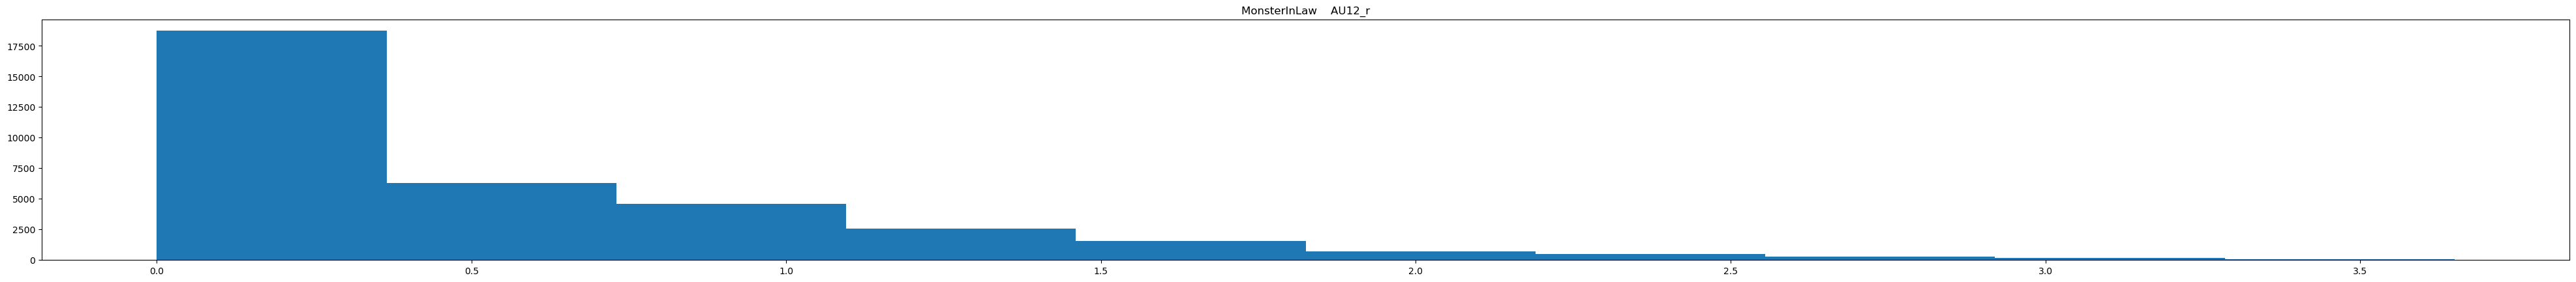

MonsterInLaw AU14_r


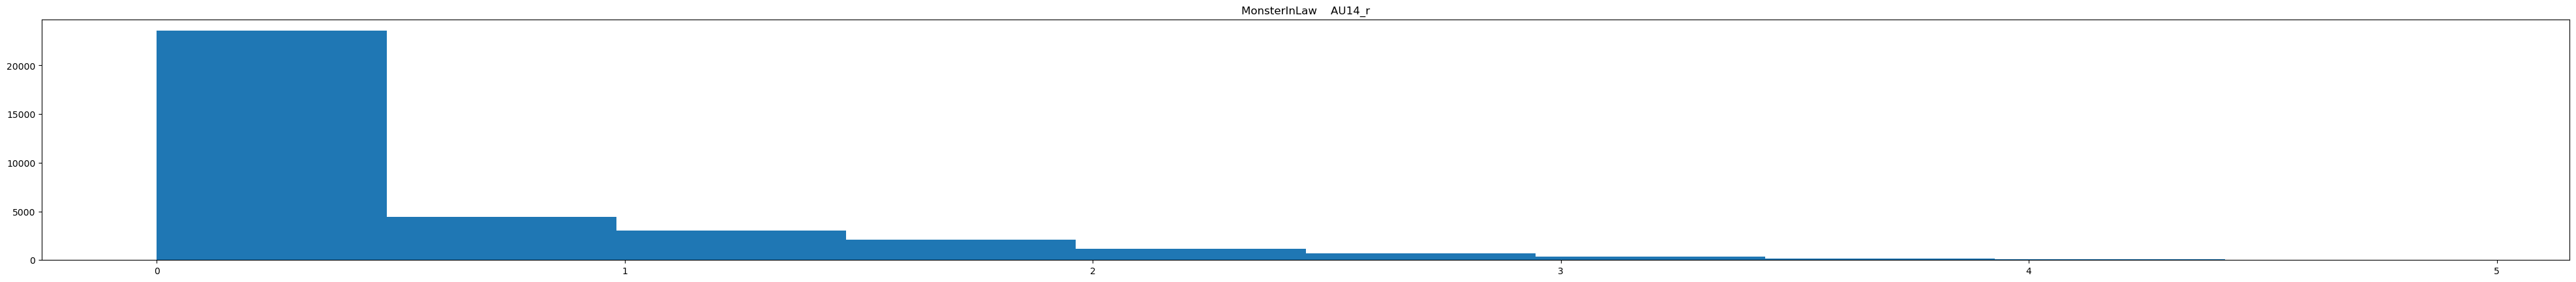

MonsterInLaw AU15_r


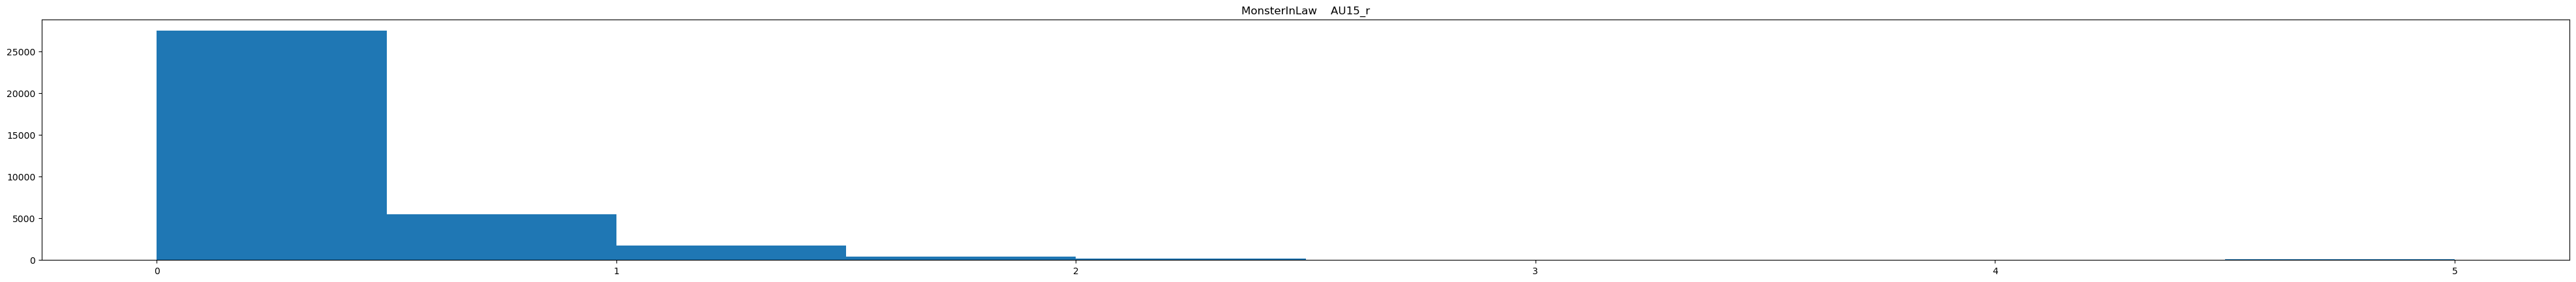

MonsterInLaw AU17_r


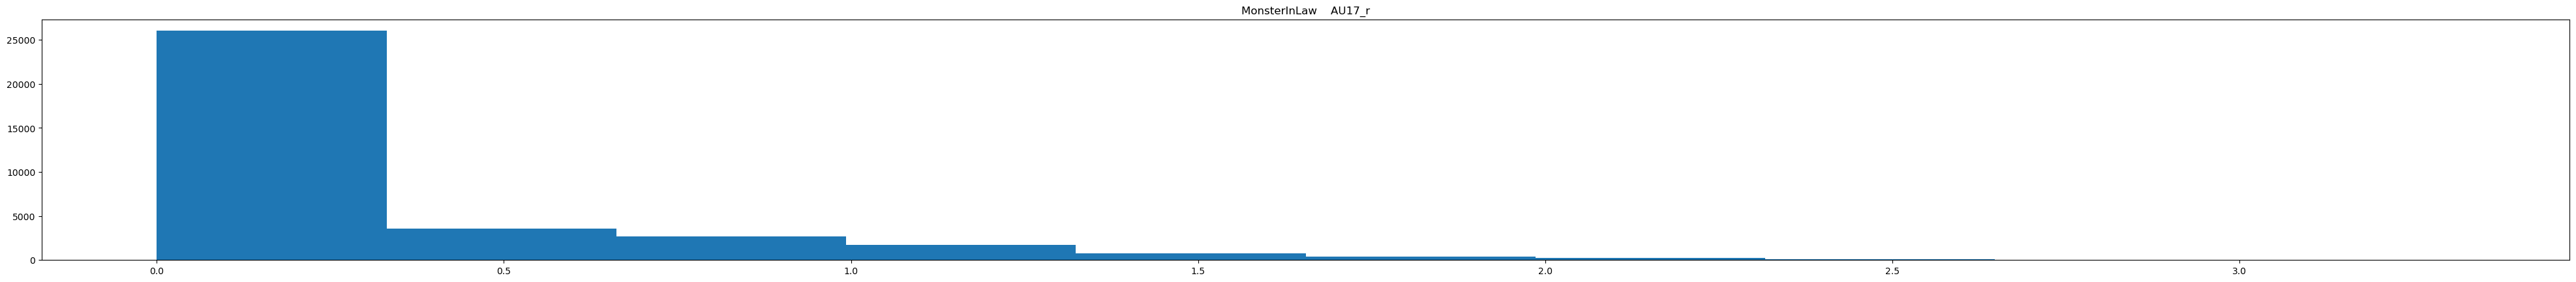

MonsterInLaw AU20_r


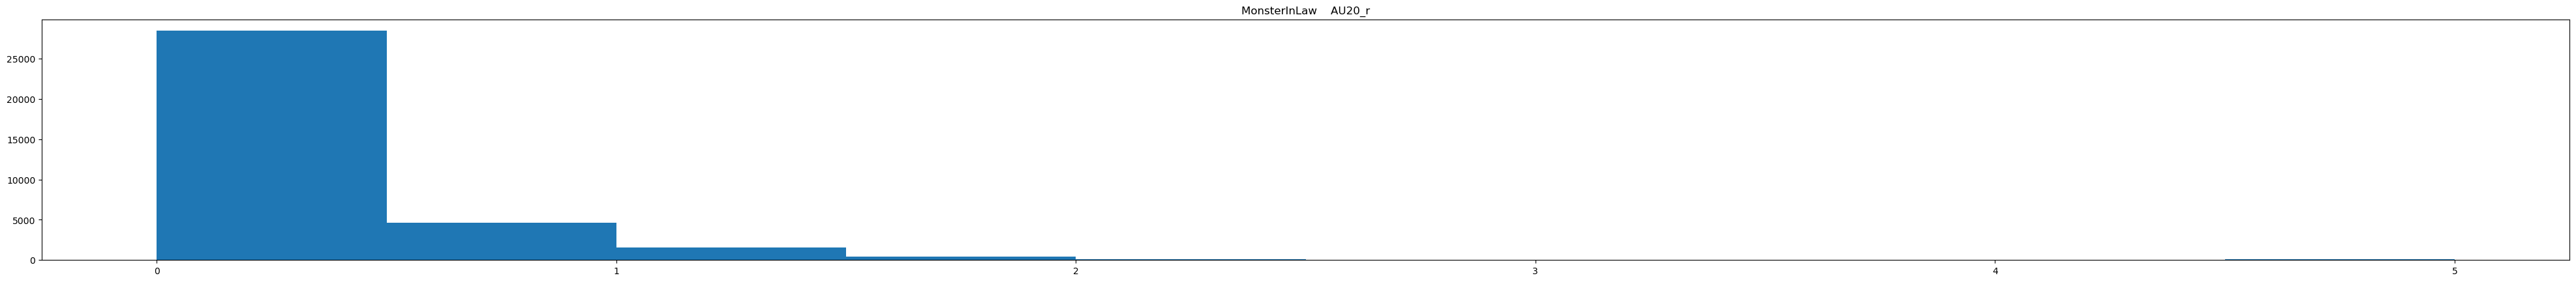

MonsterInLaw AU23_r


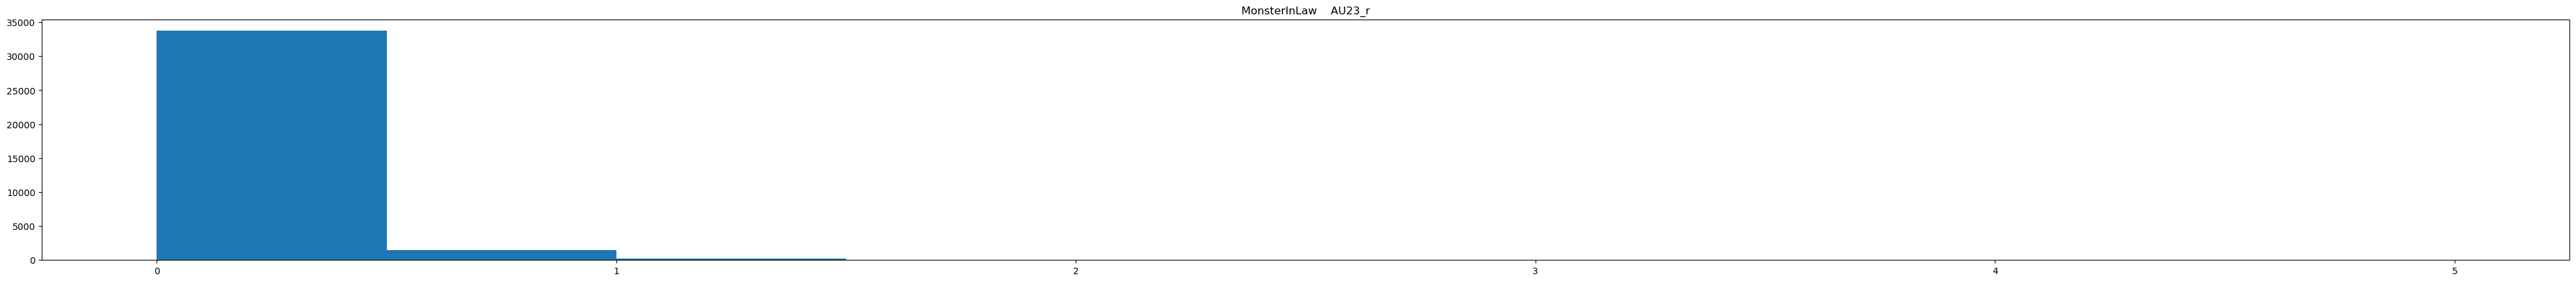

MonsterInLaw AU25_r


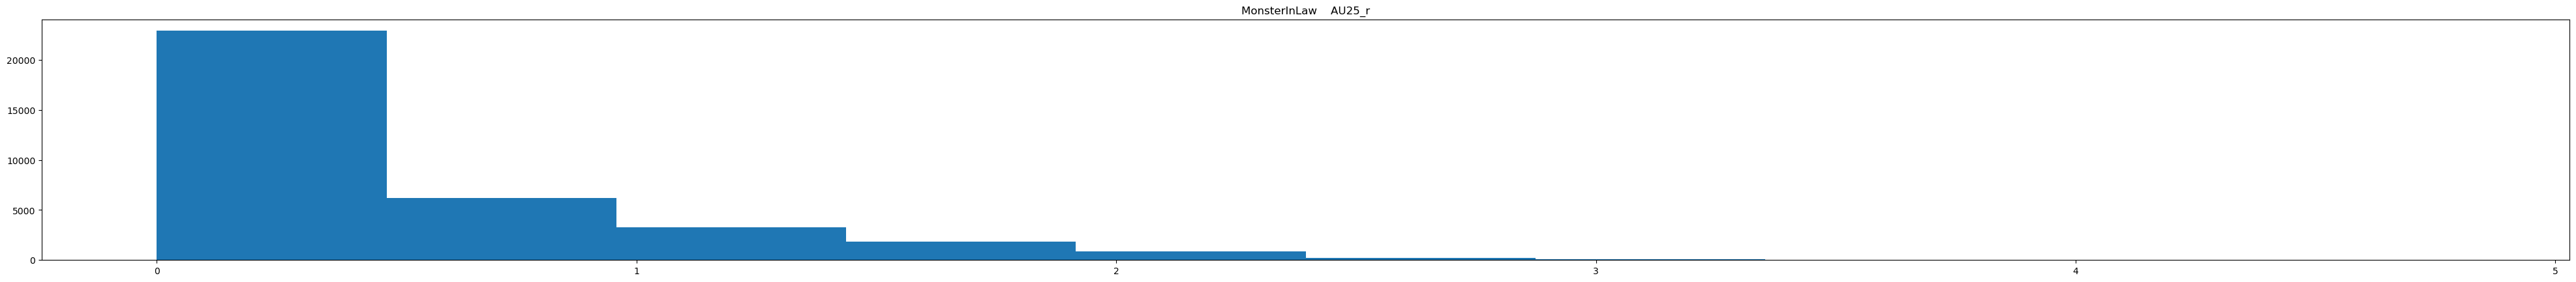

MonsterInLaw AU26_r


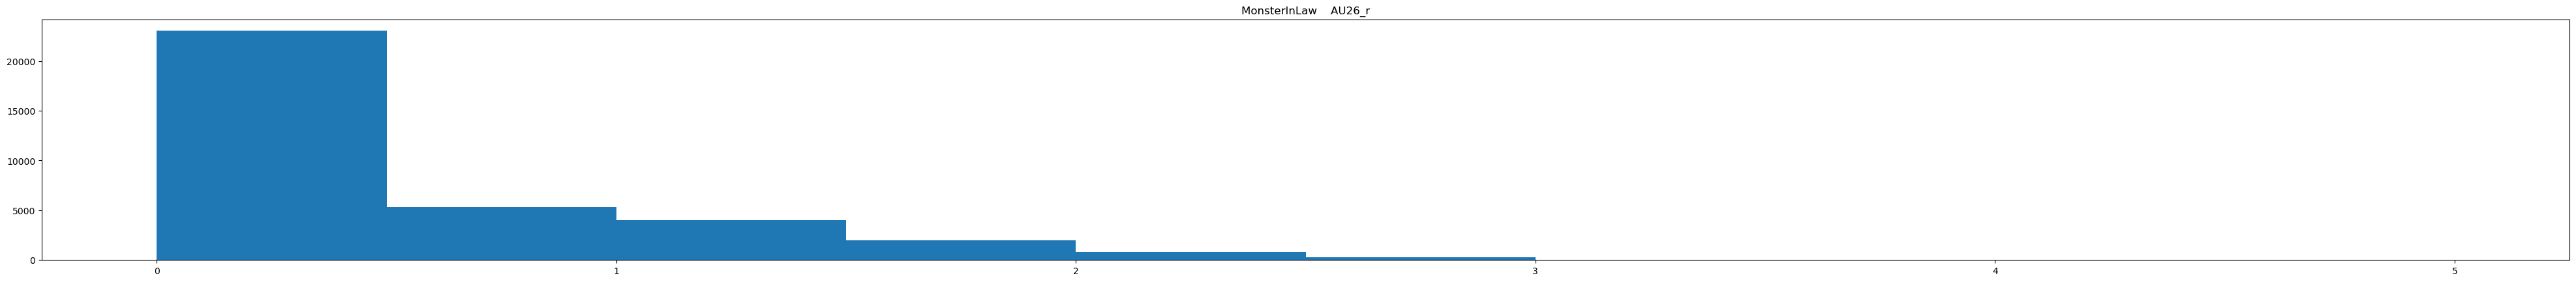

Prosess file QuantumOfSolace ...
ok reading csv...
QuantumOfSolace AU01_r


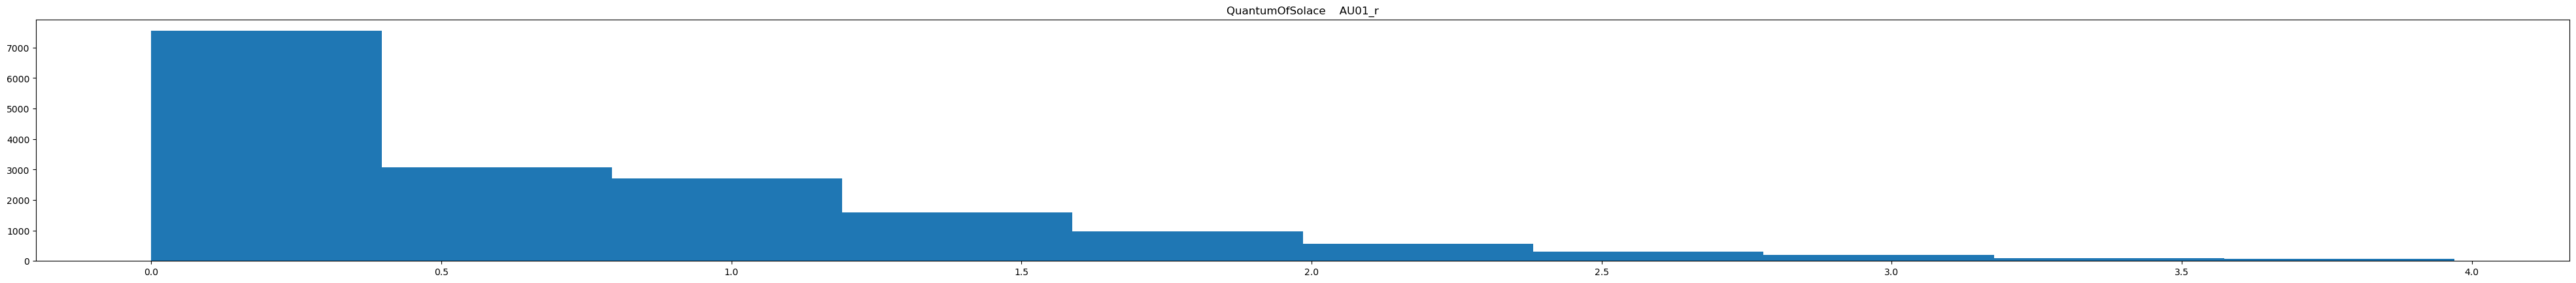

QuantumOfSolace AU02_r


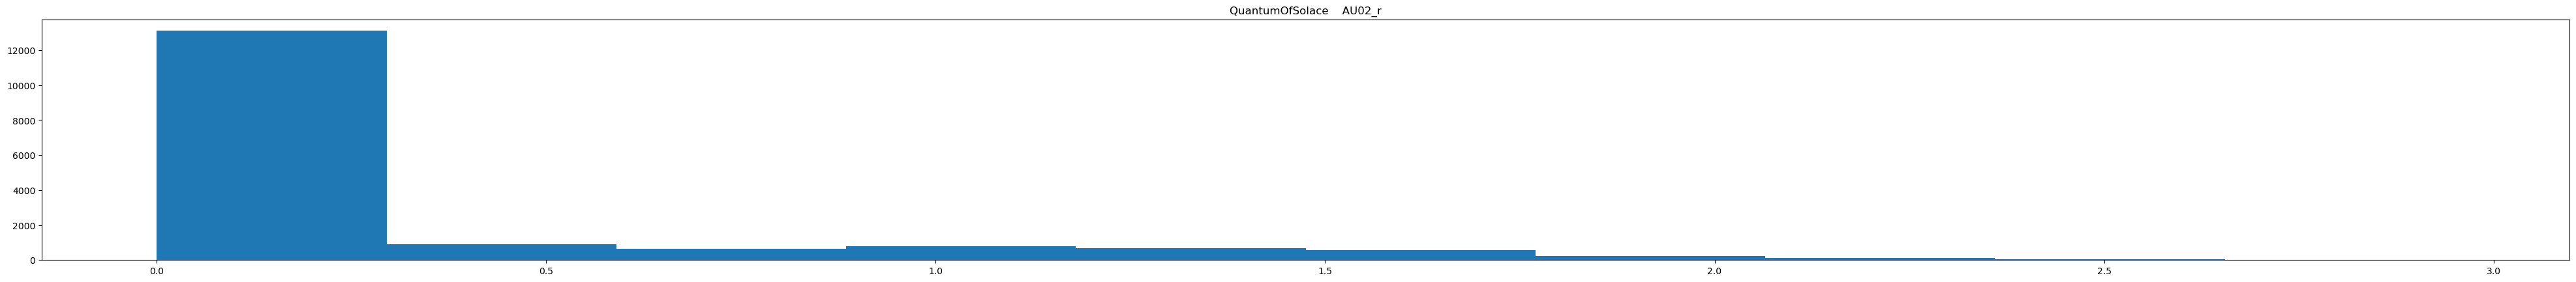

QuantumOfSolace AU04_r


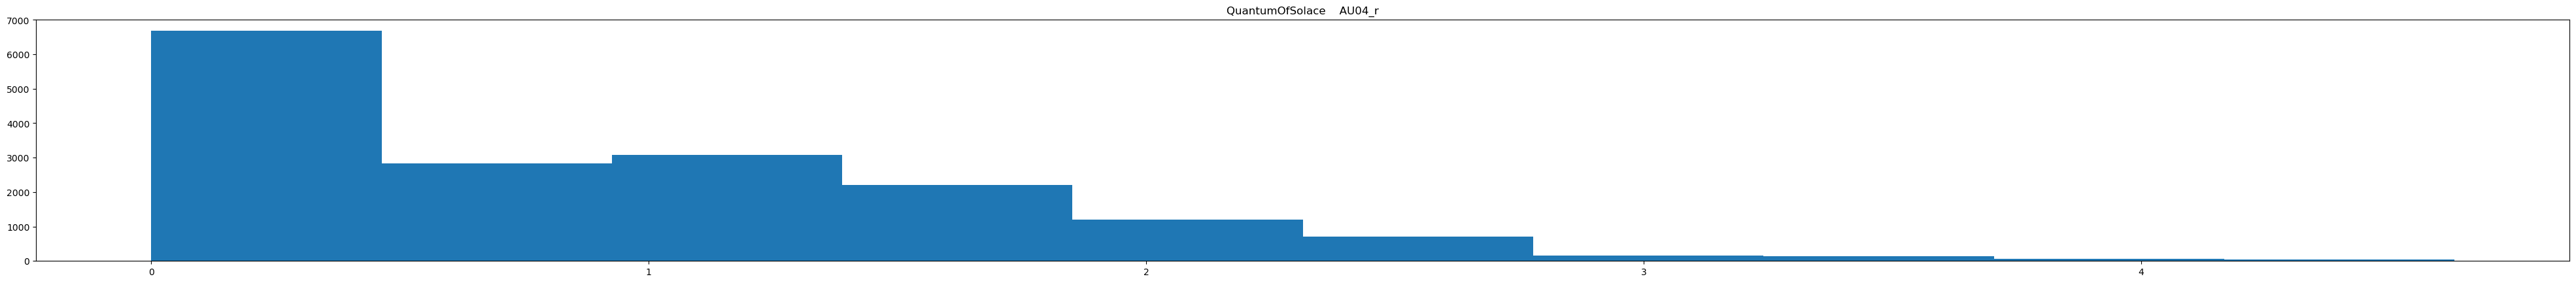

QuantumOfSolace AU05_r


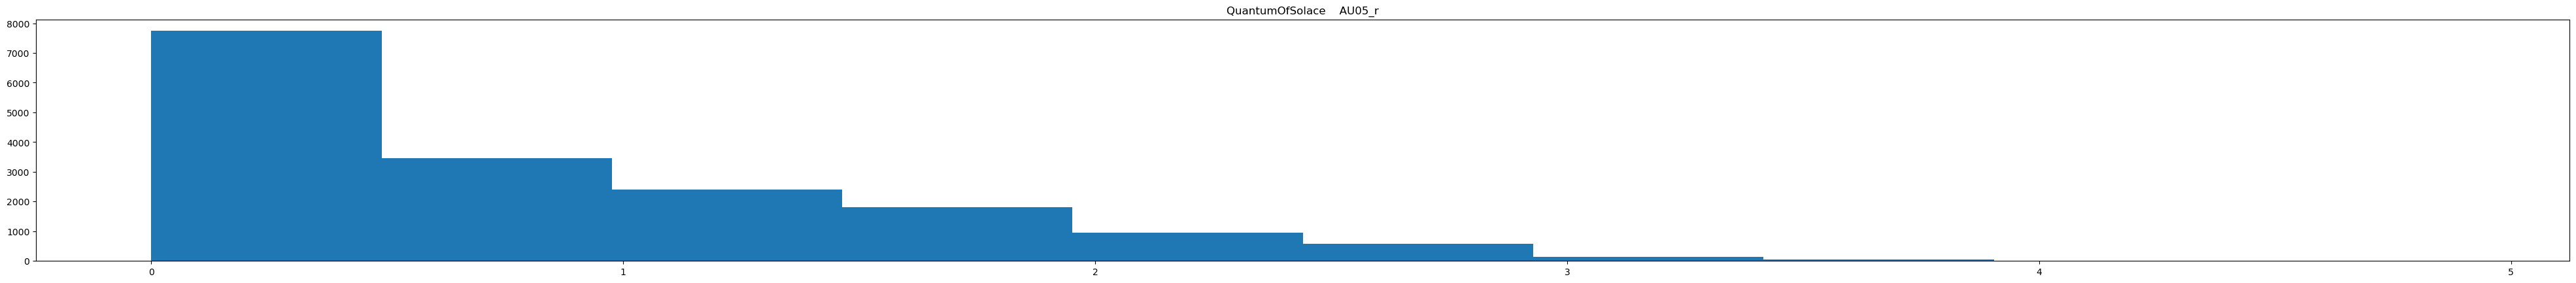

QuantumOfSolace AU06_r


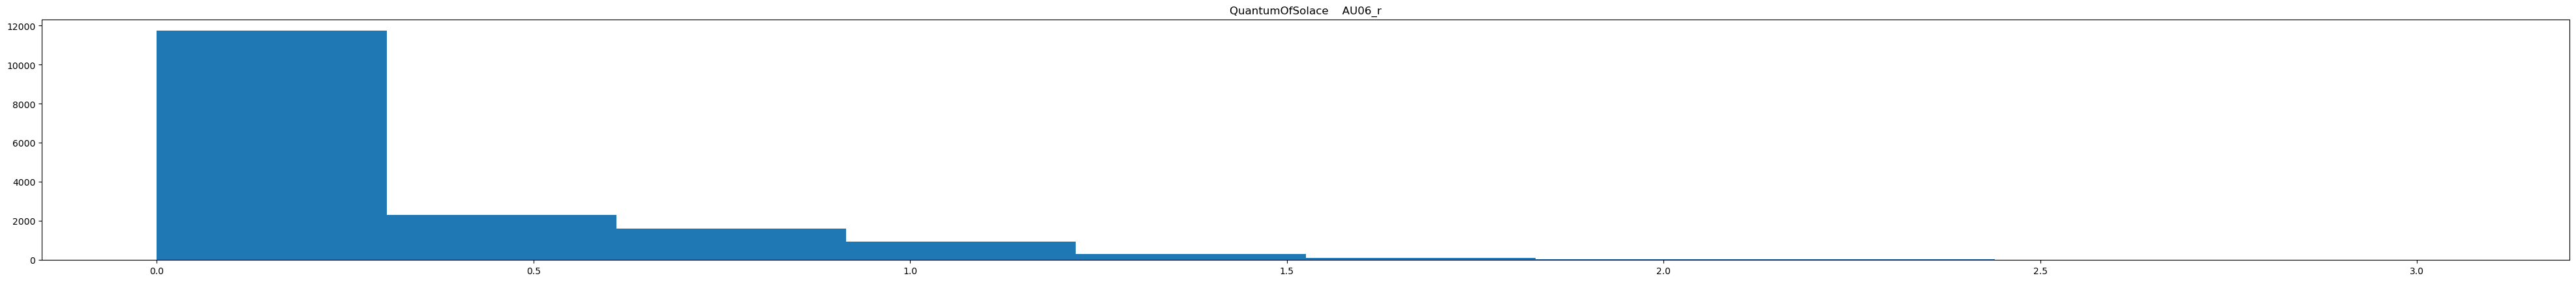

QuantumOfSolace AU07_r


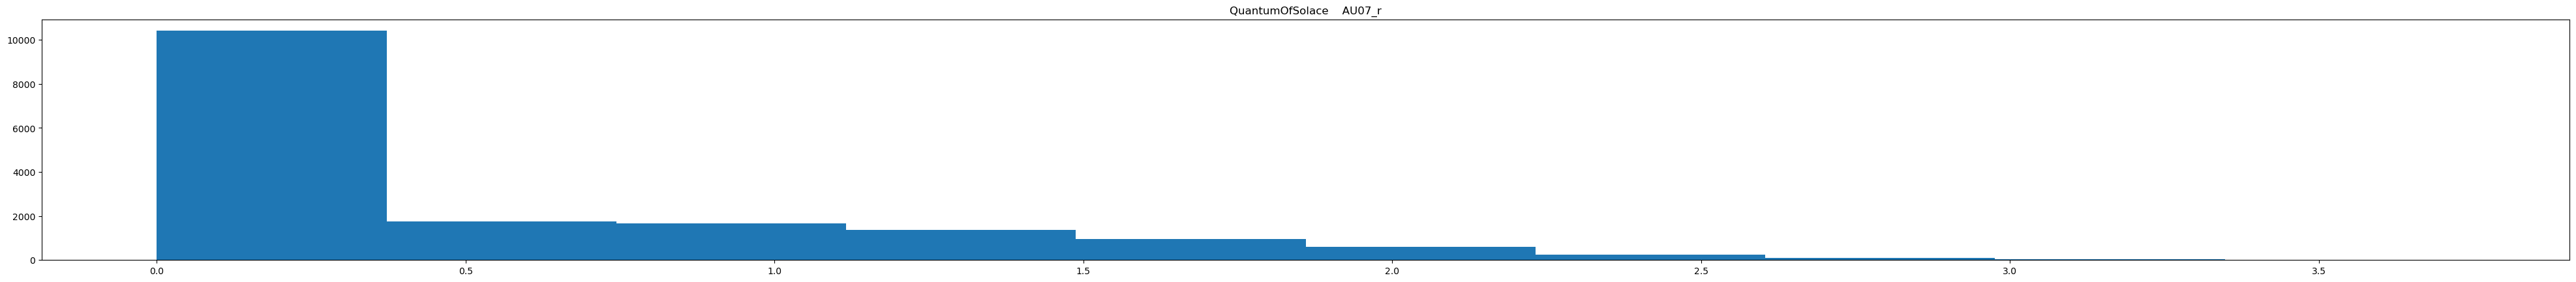

QuantumOfSolace AU09_r


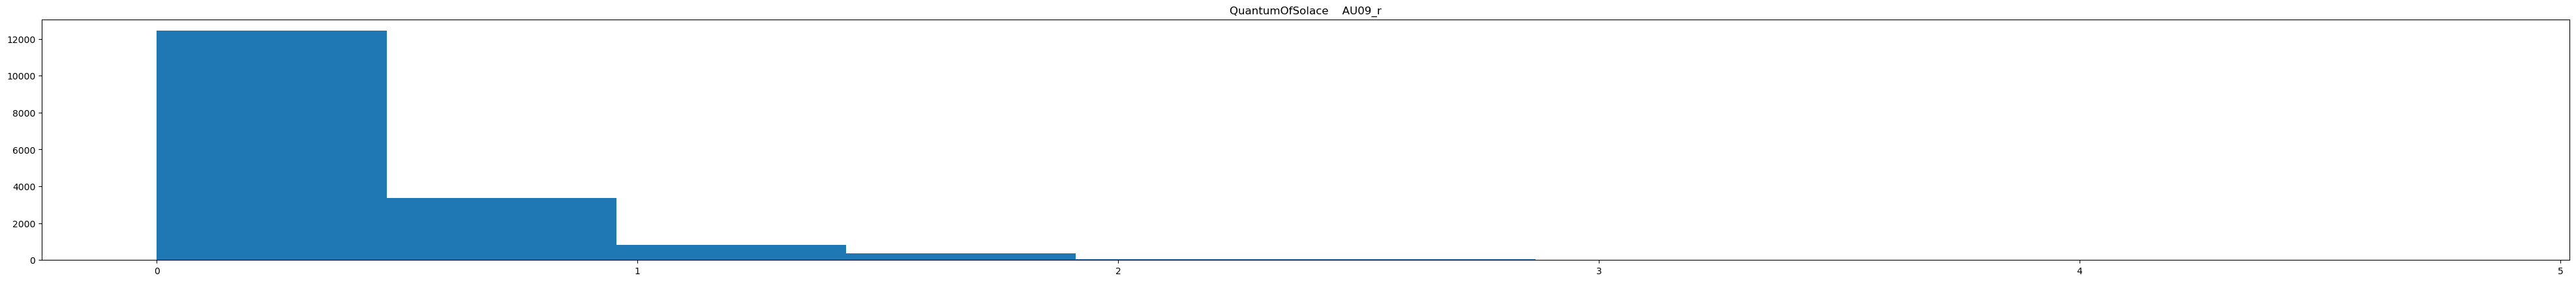

QuantumOfSolace AU12_r


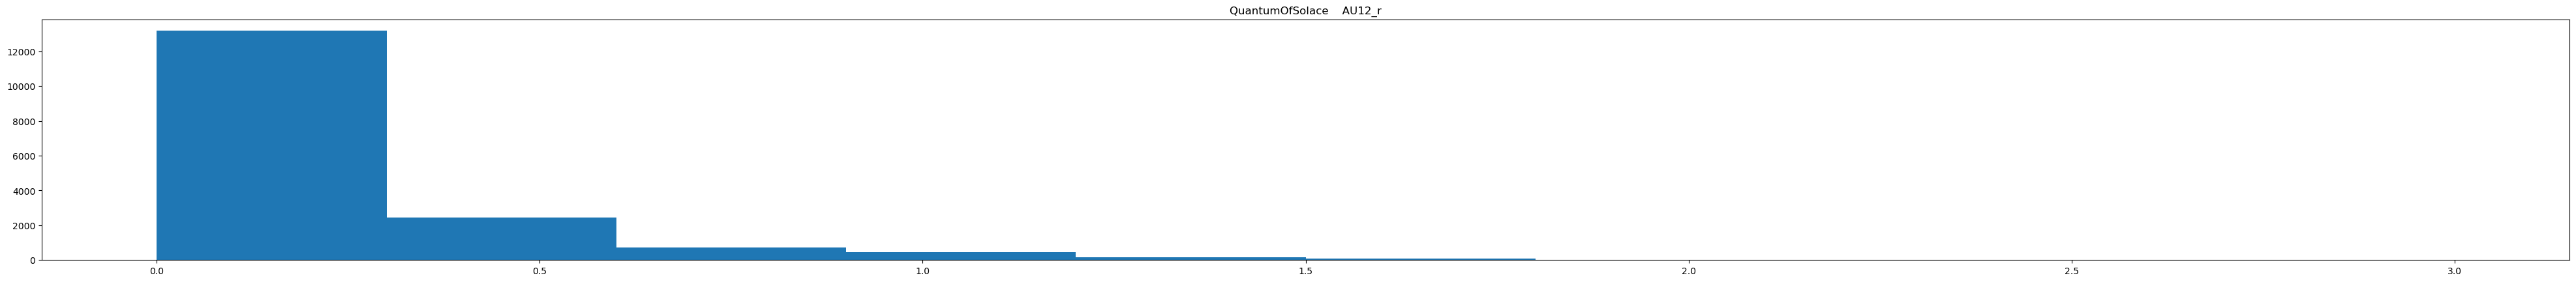

QuantumOfSolace AU14_r


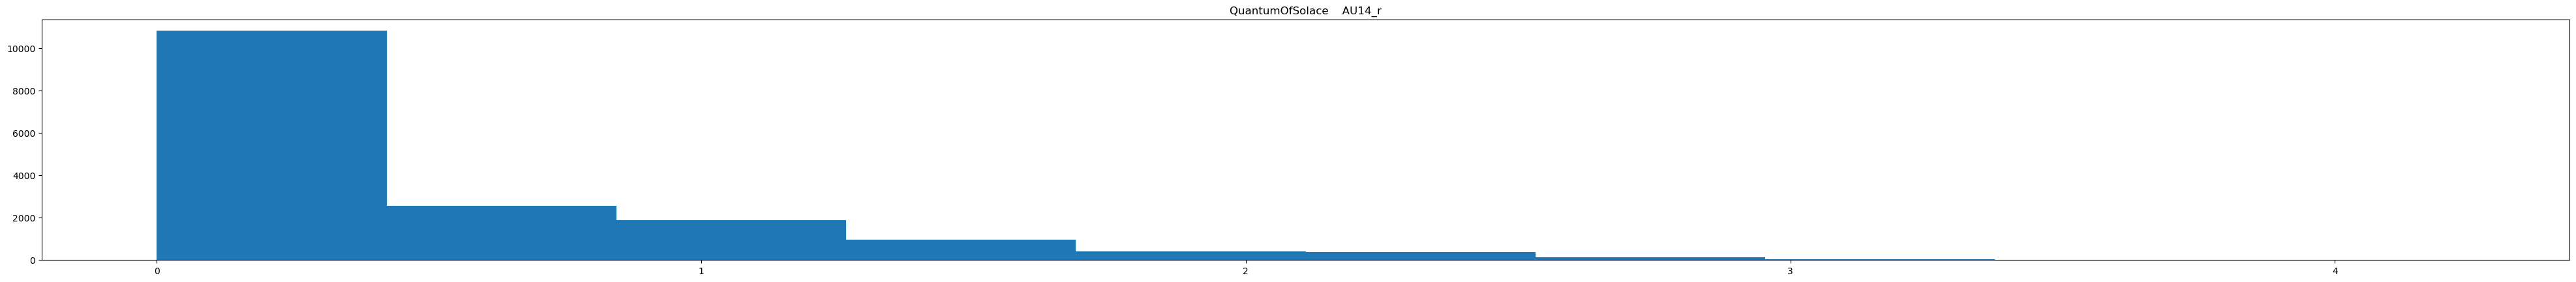

QuantumOfSolace AU15_r


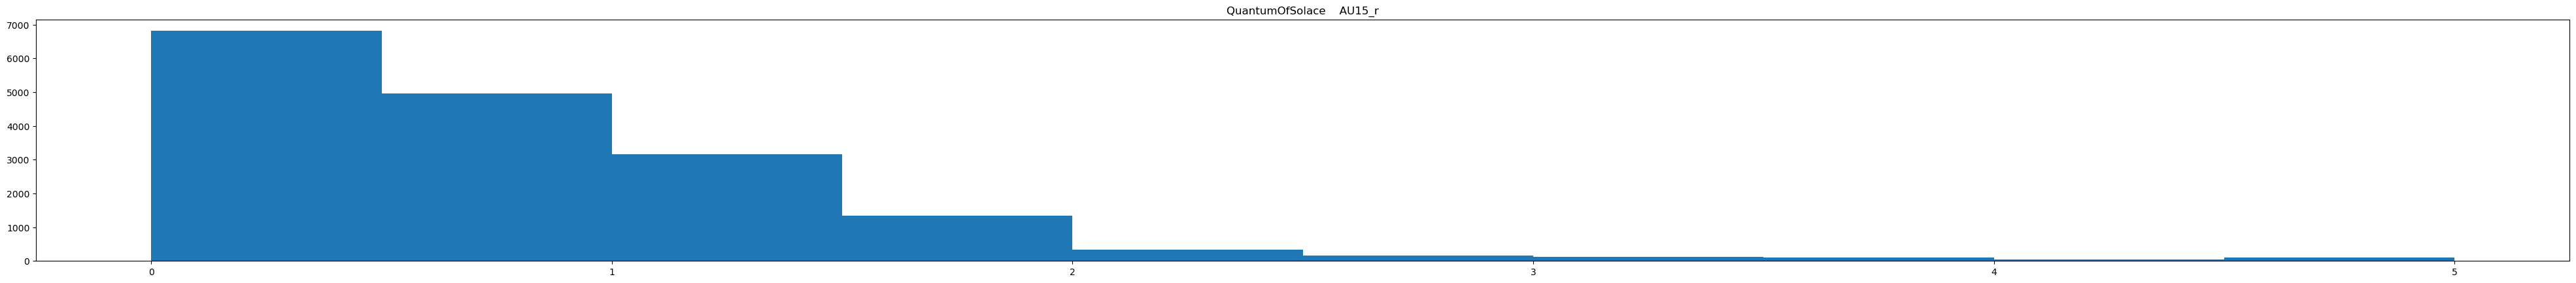

QuantumOfSolace AU17_r


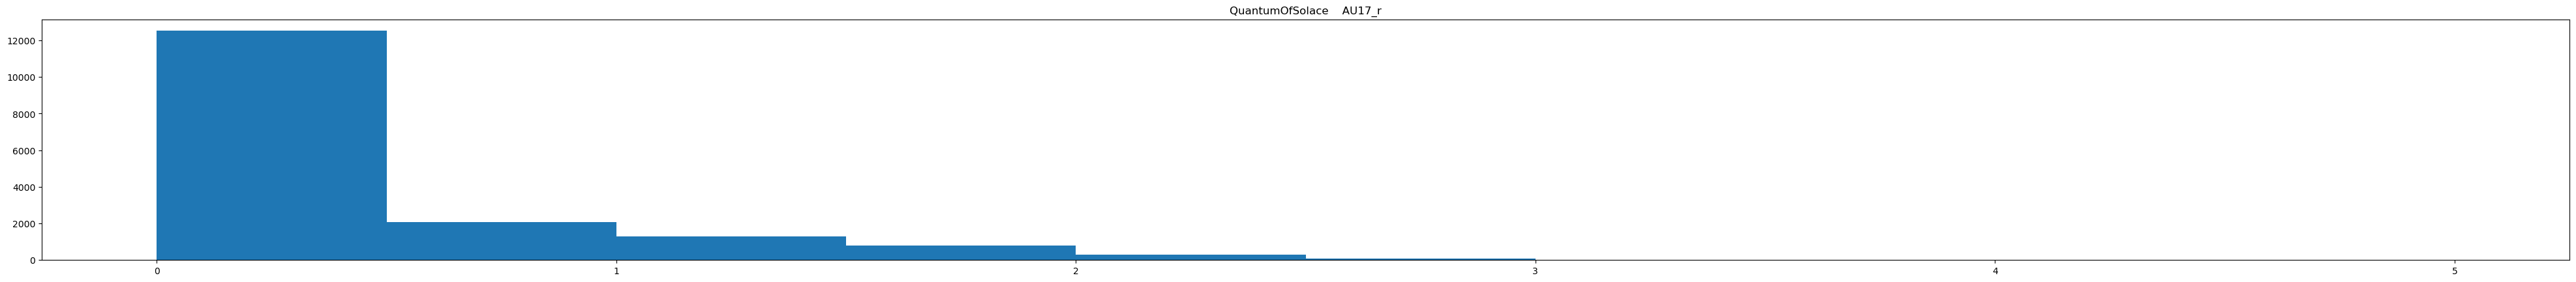

QuantumOfSolace AU20_r


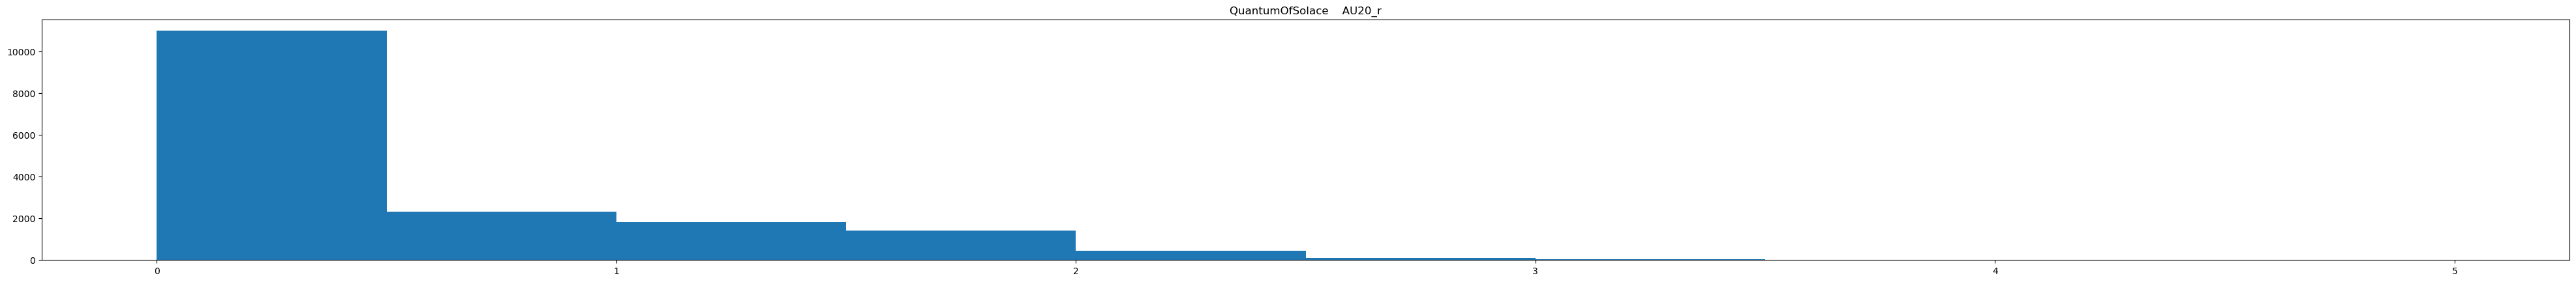

QuantumOfSolace AU23_r


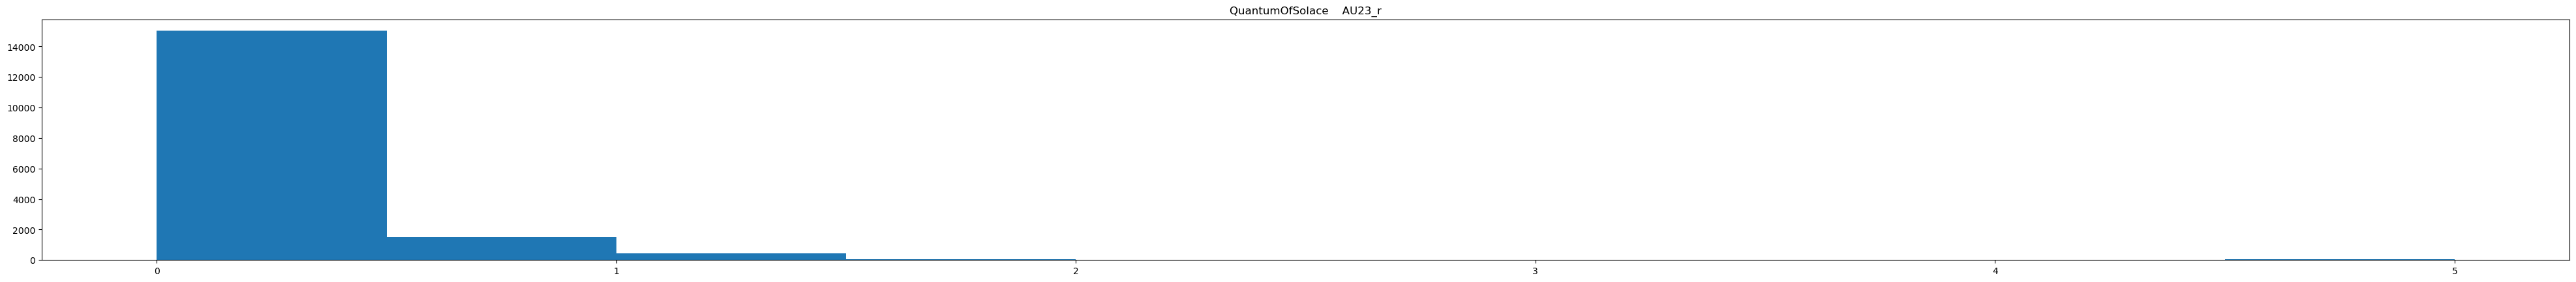

QuantumOfSolace AU25_r


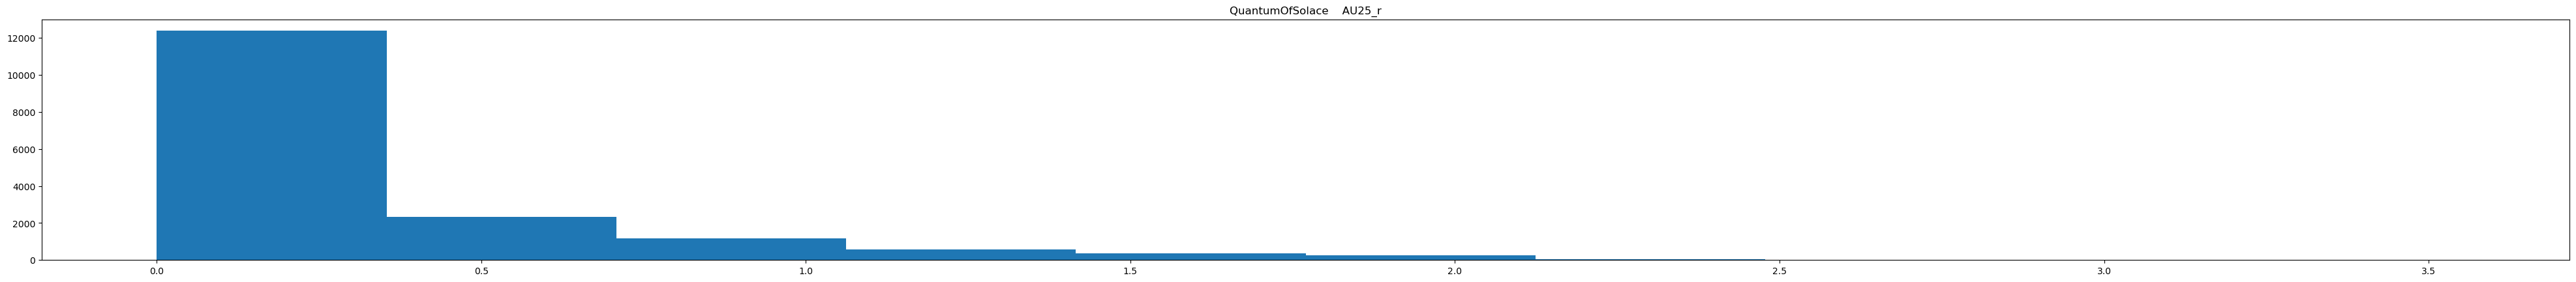

QuantumOfSolace AU26_r


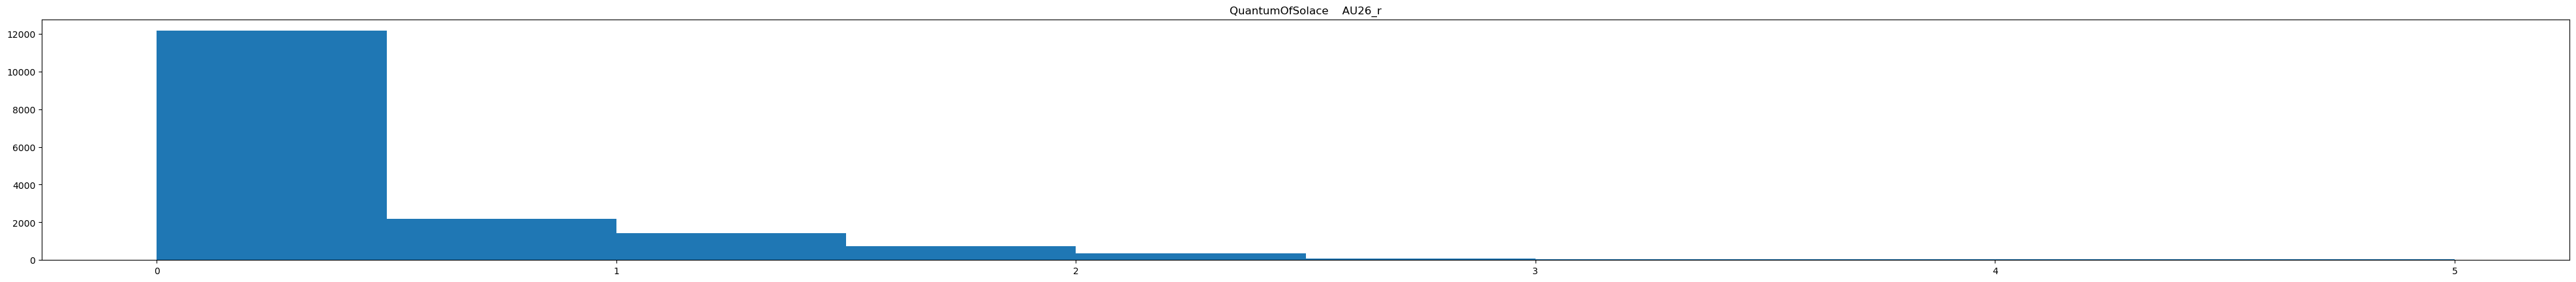

Prosess file Clean ...
ok reading csv...
Clean AU01_r


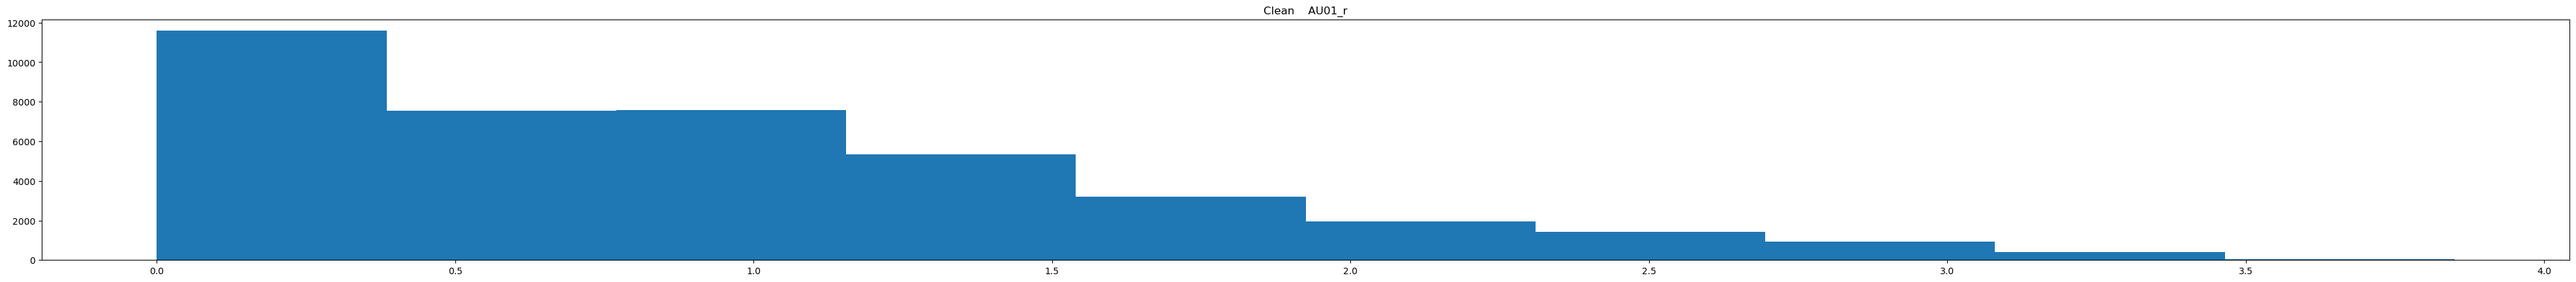

Clean AU02_r


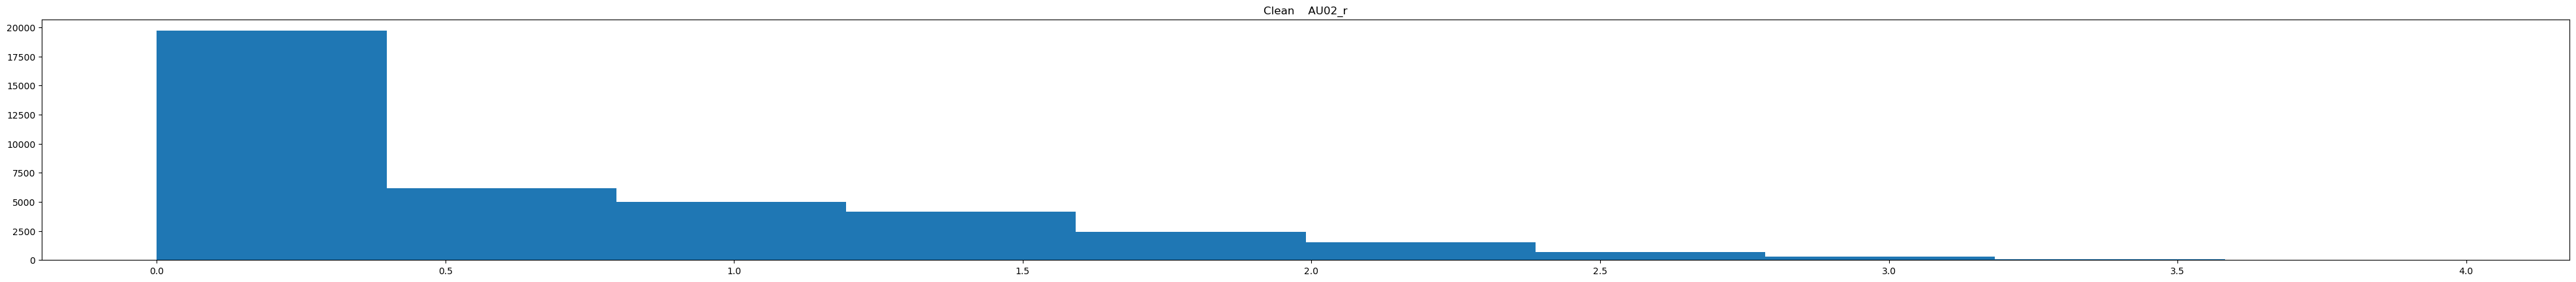

Clean AU04_r


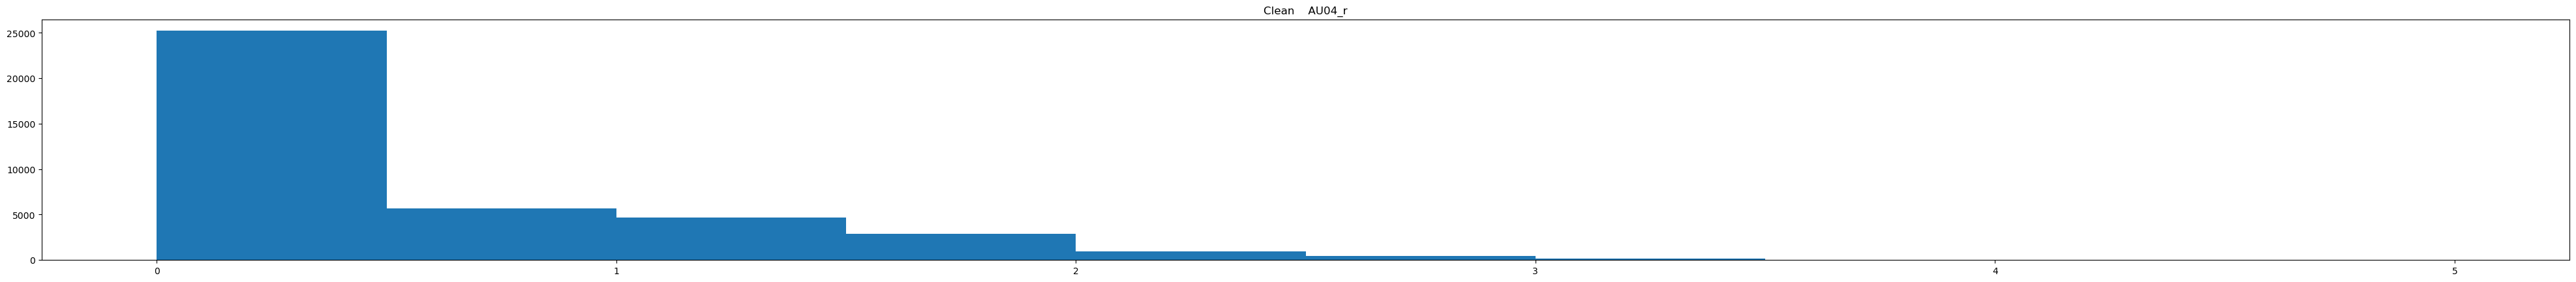

Clean AU05_r


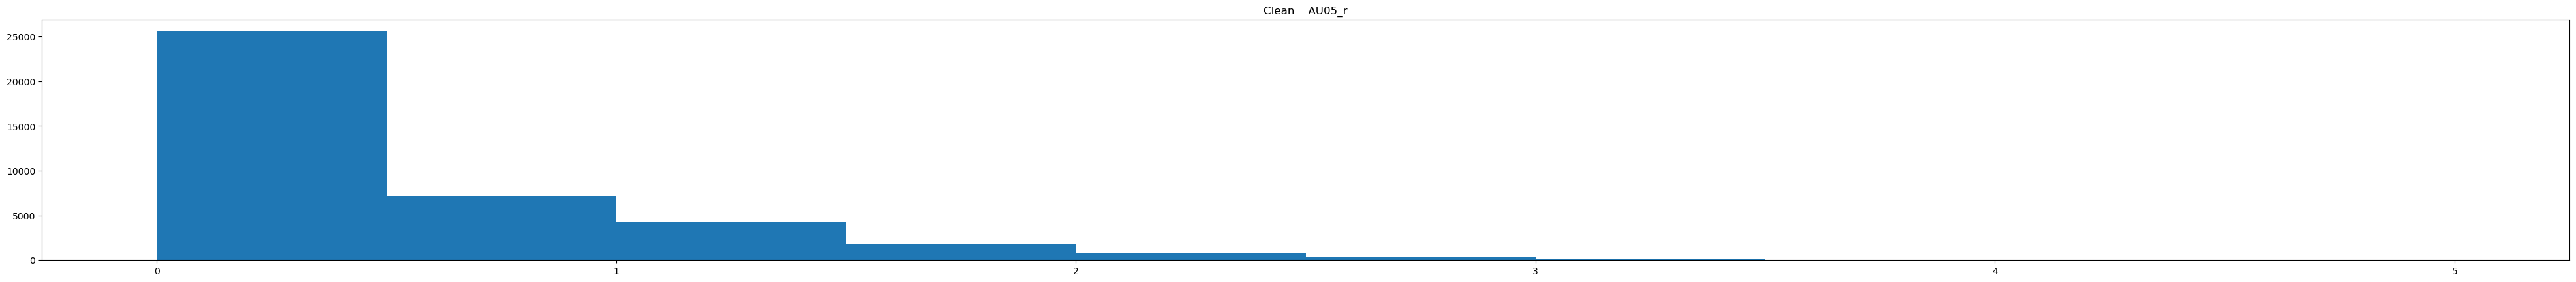

Clean AU06_r


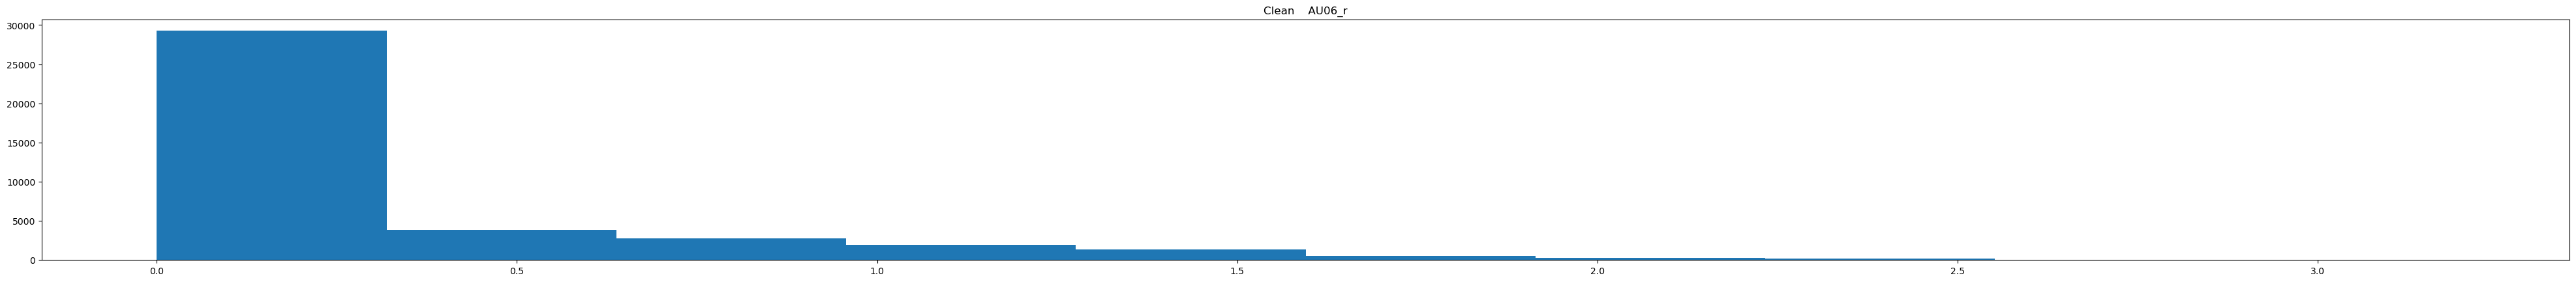

Clean AU07_r


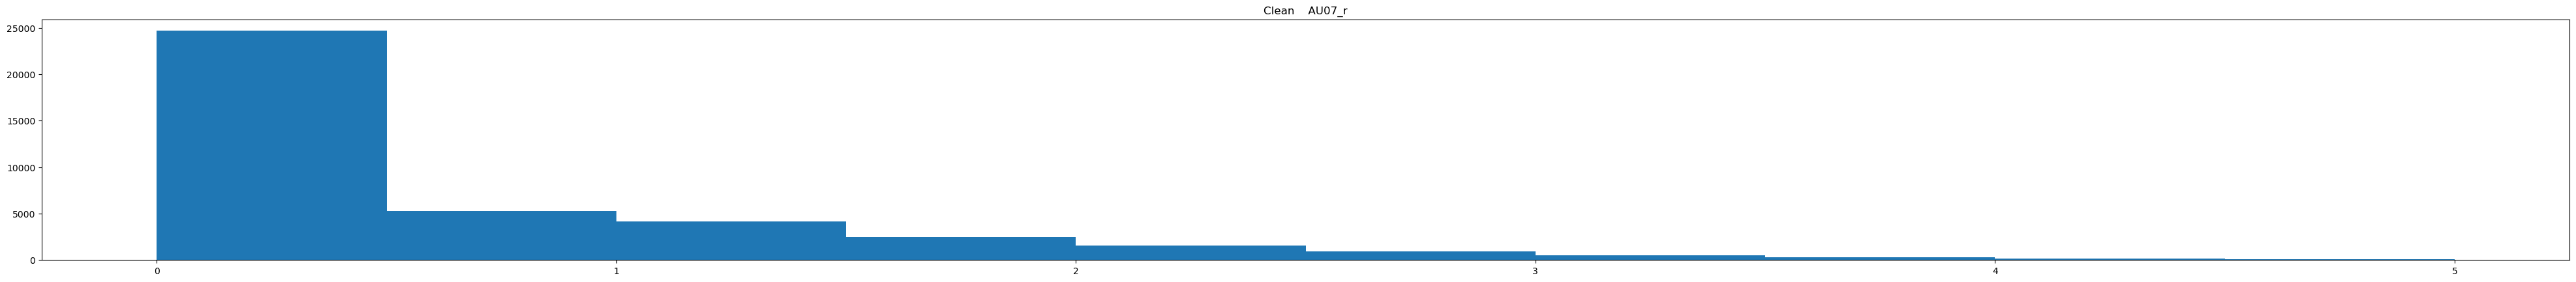

Clean AU09_r


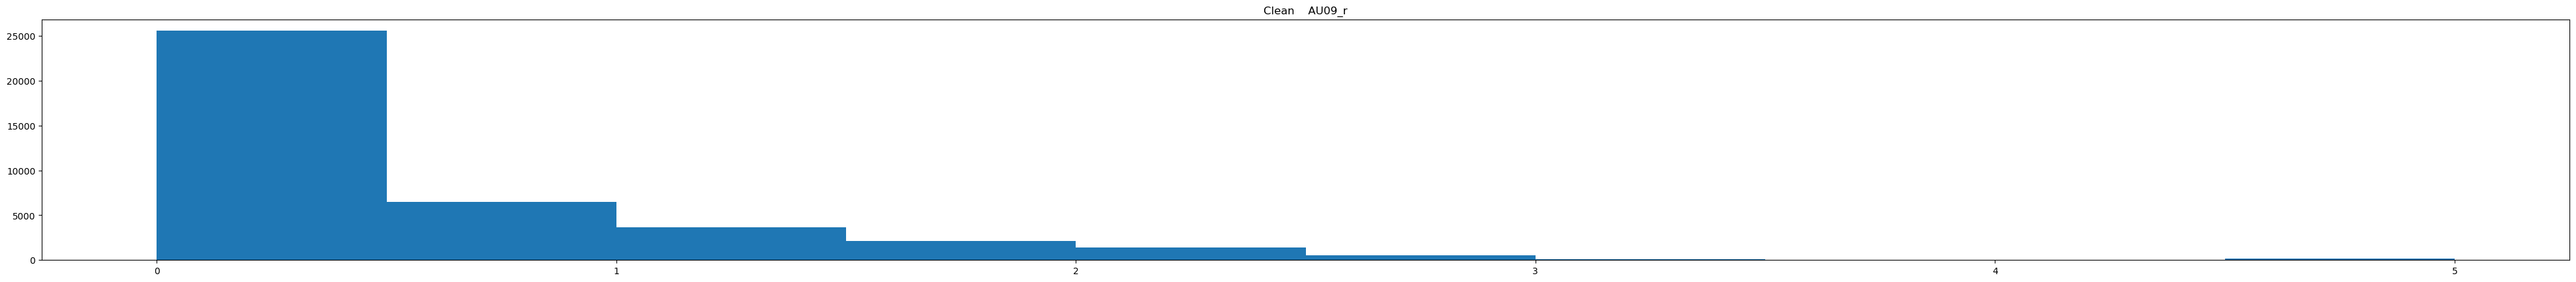

Clean AU12_r


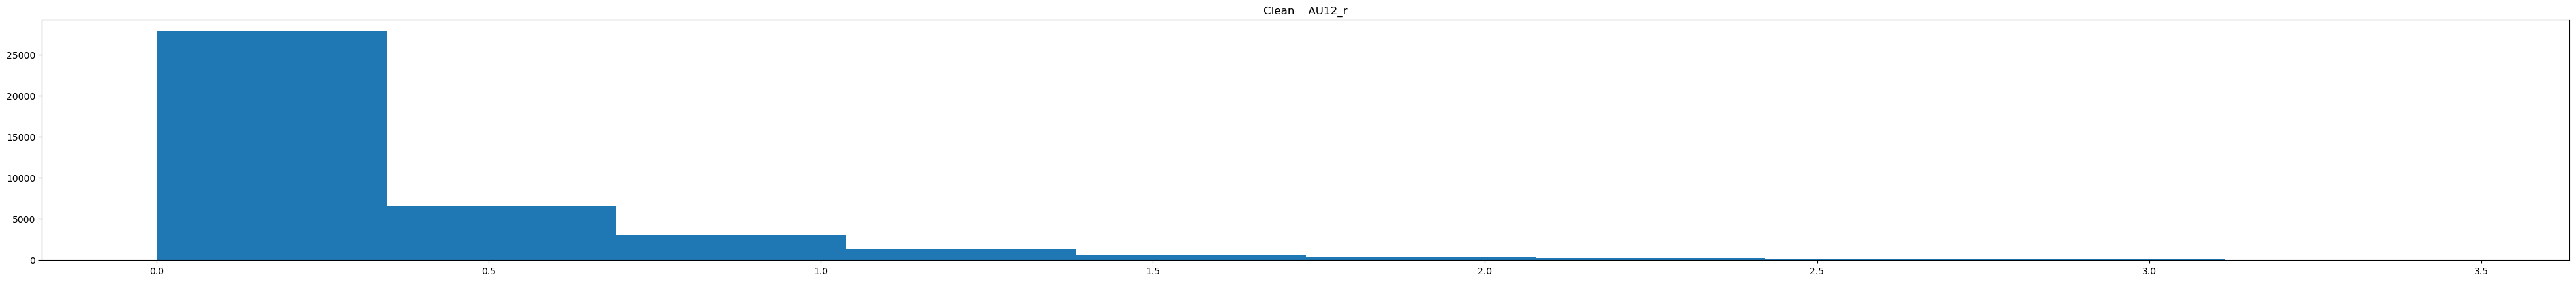

Clean AU14_r


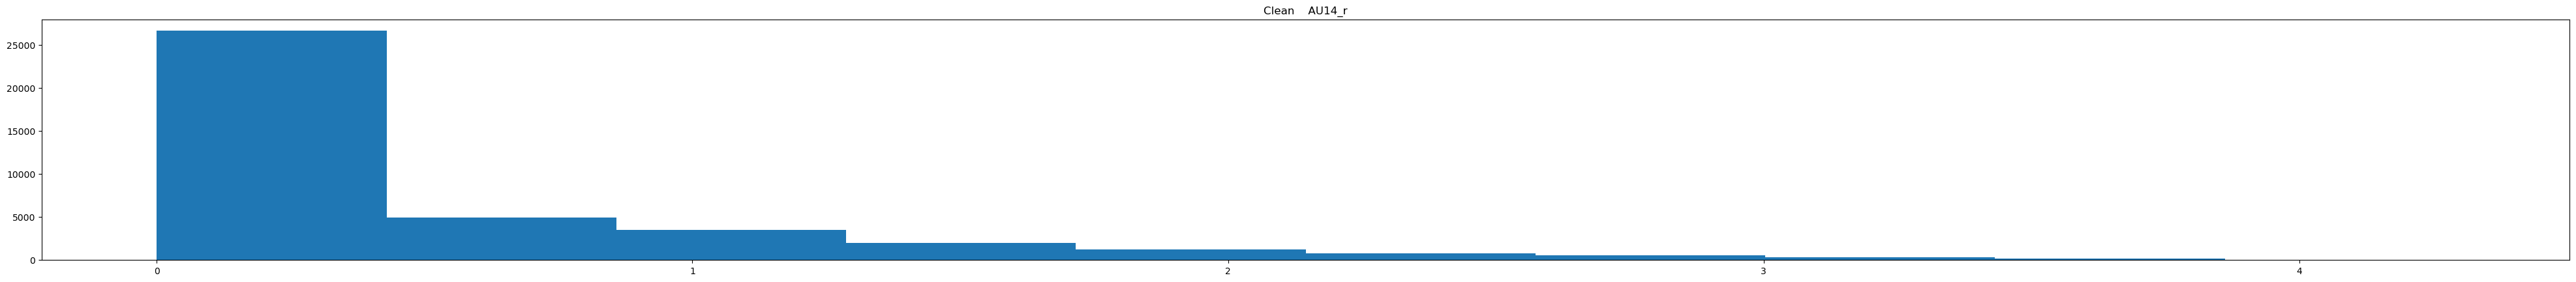

Clean AU15_r


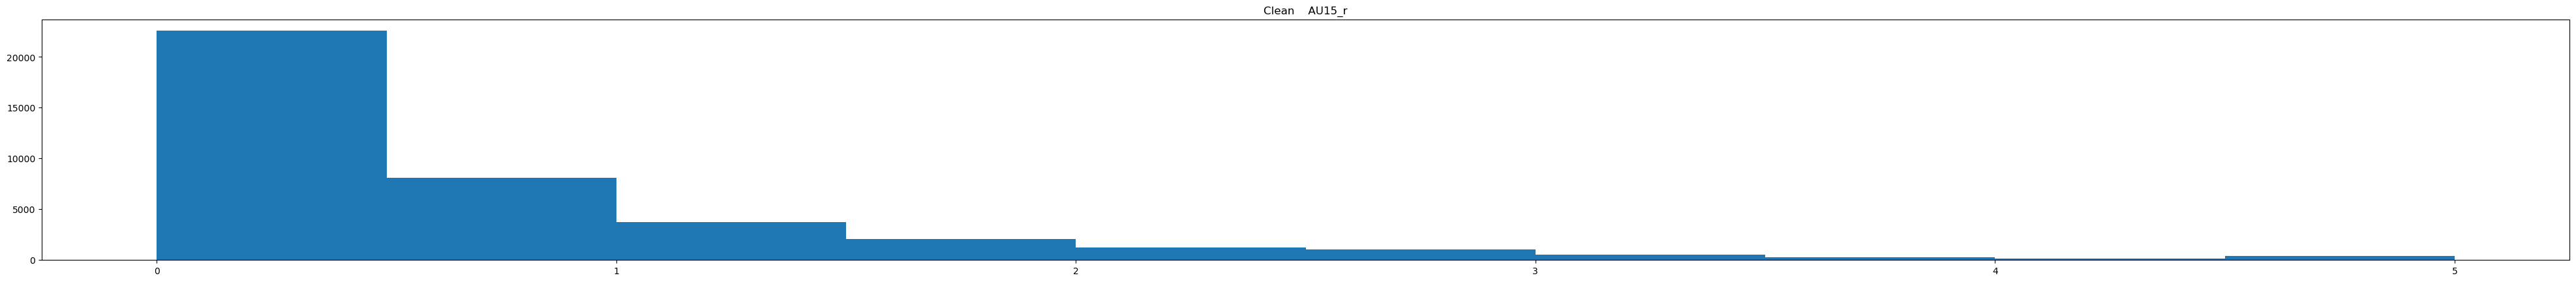

Clean AU17_r


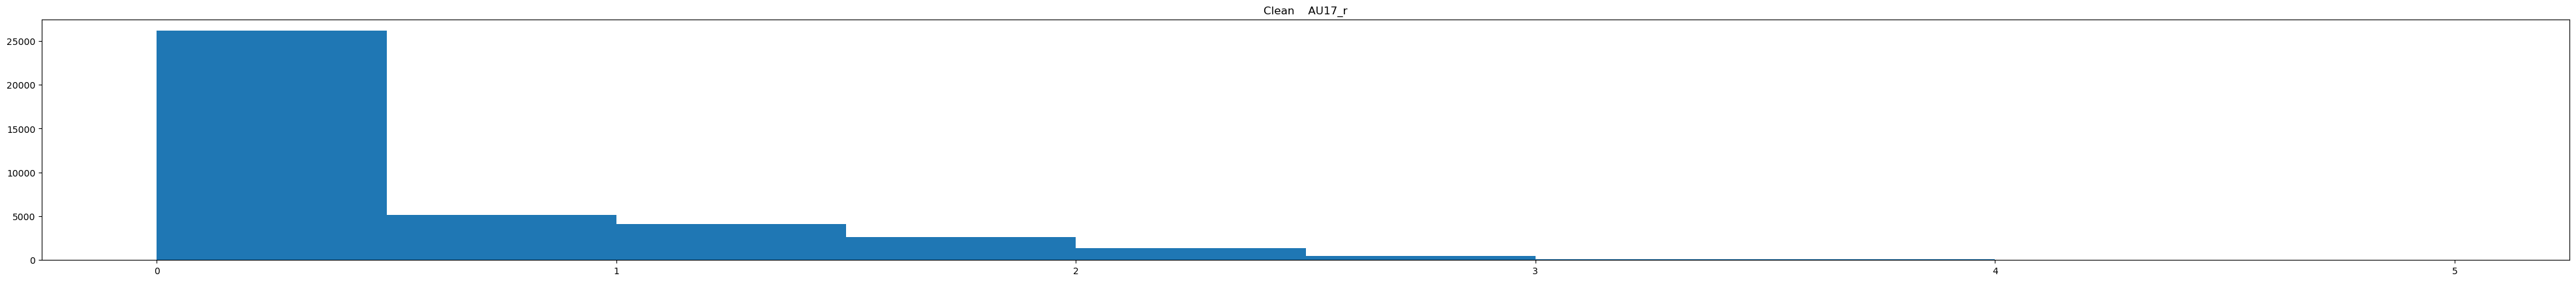

Clean AU20_r


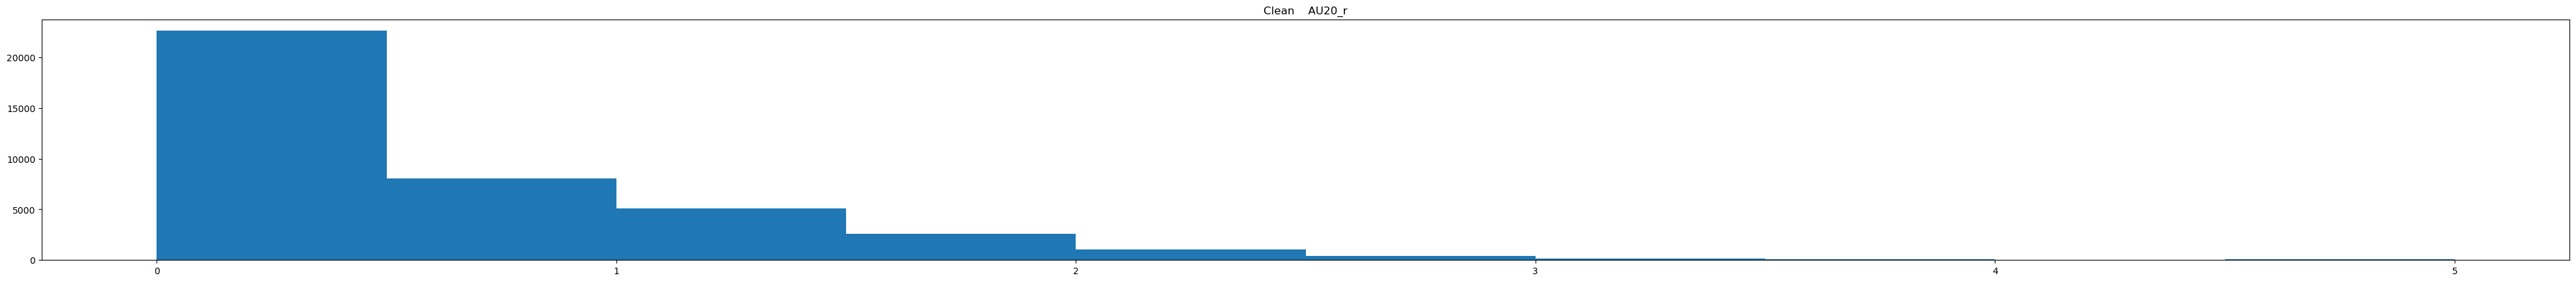

Clean AU23_r


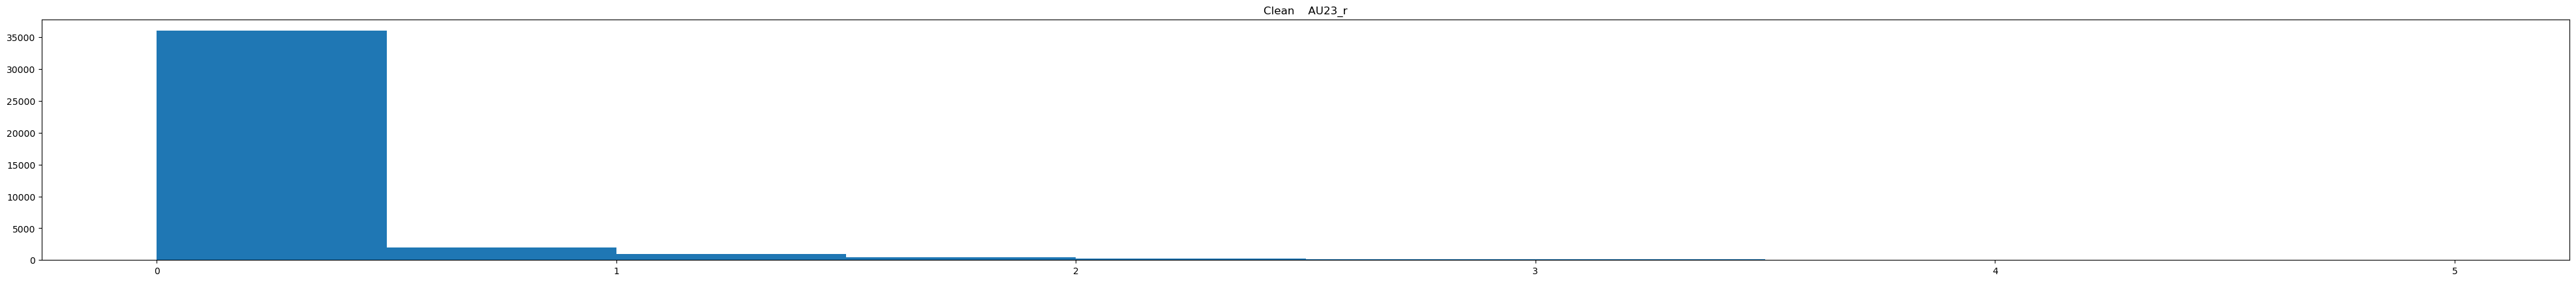

Clean AU25_r


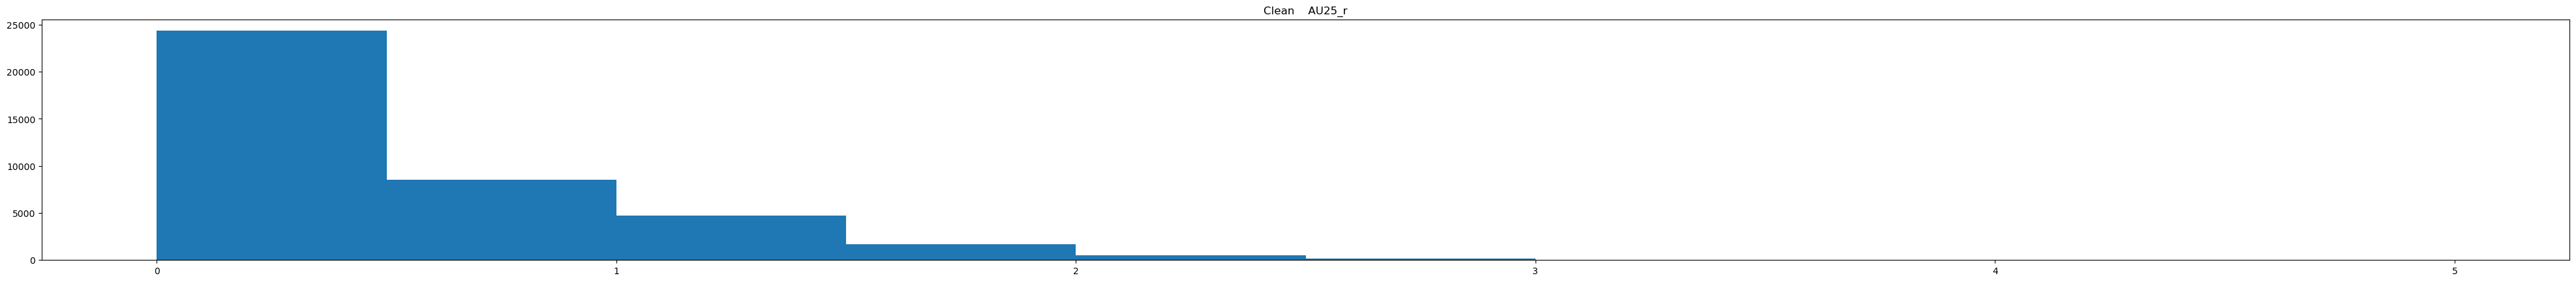

Clean AU26_r


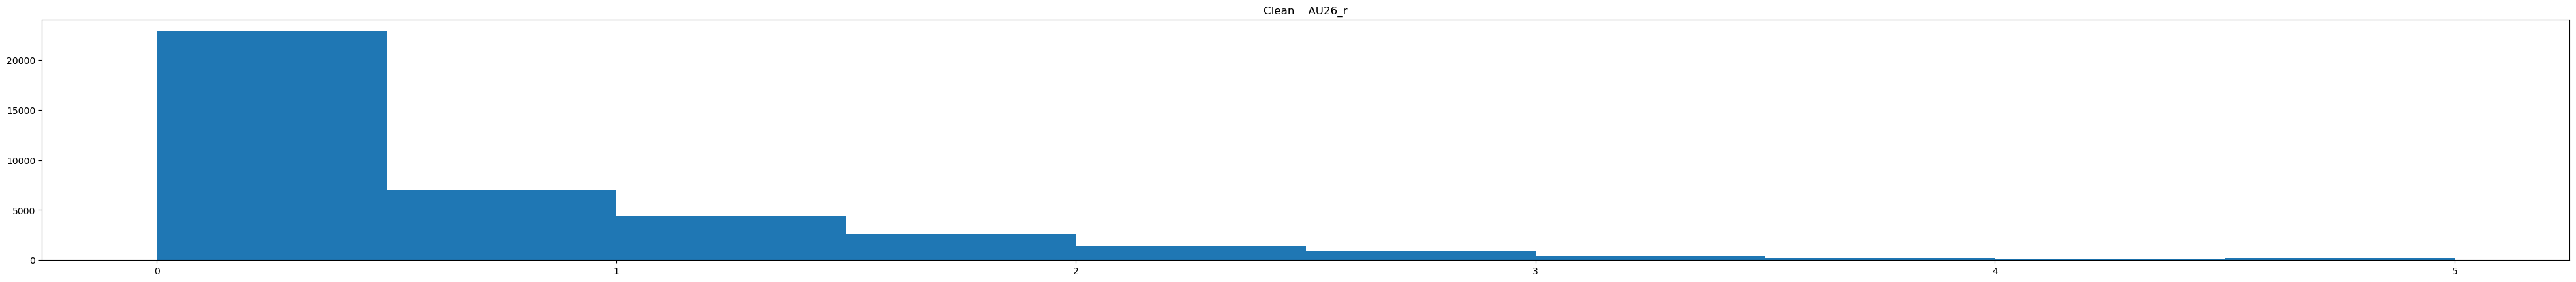

Prosess file Synecdoche ...
ok reading csv...
Synecdoche AU01_r


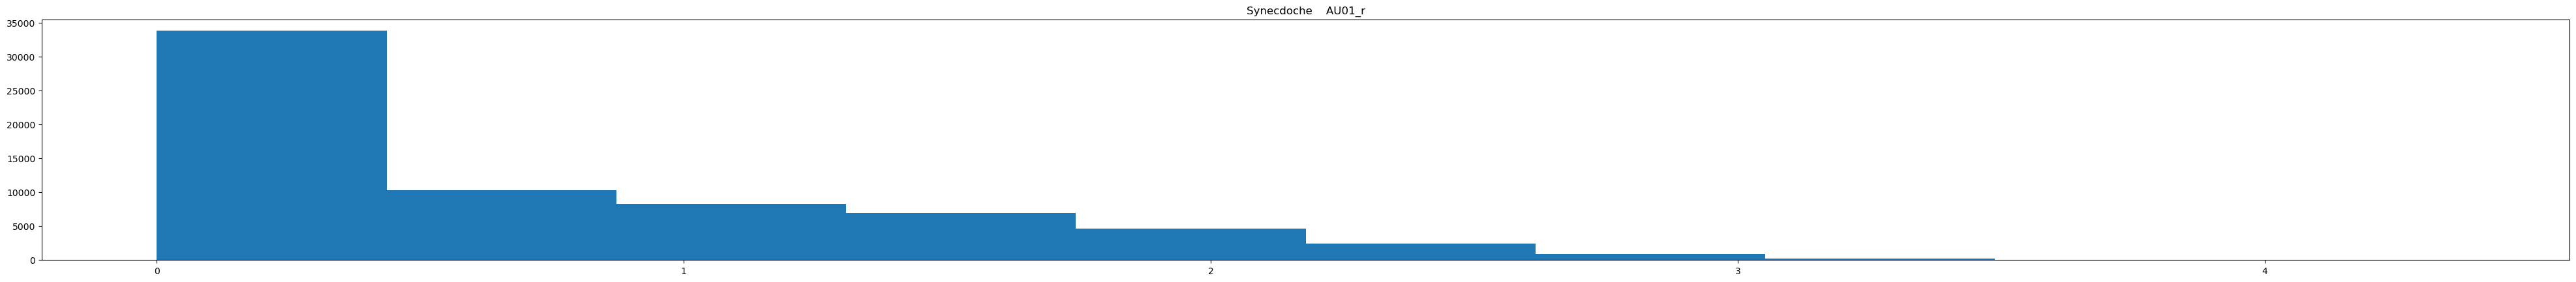

Synecdoche AU02_r


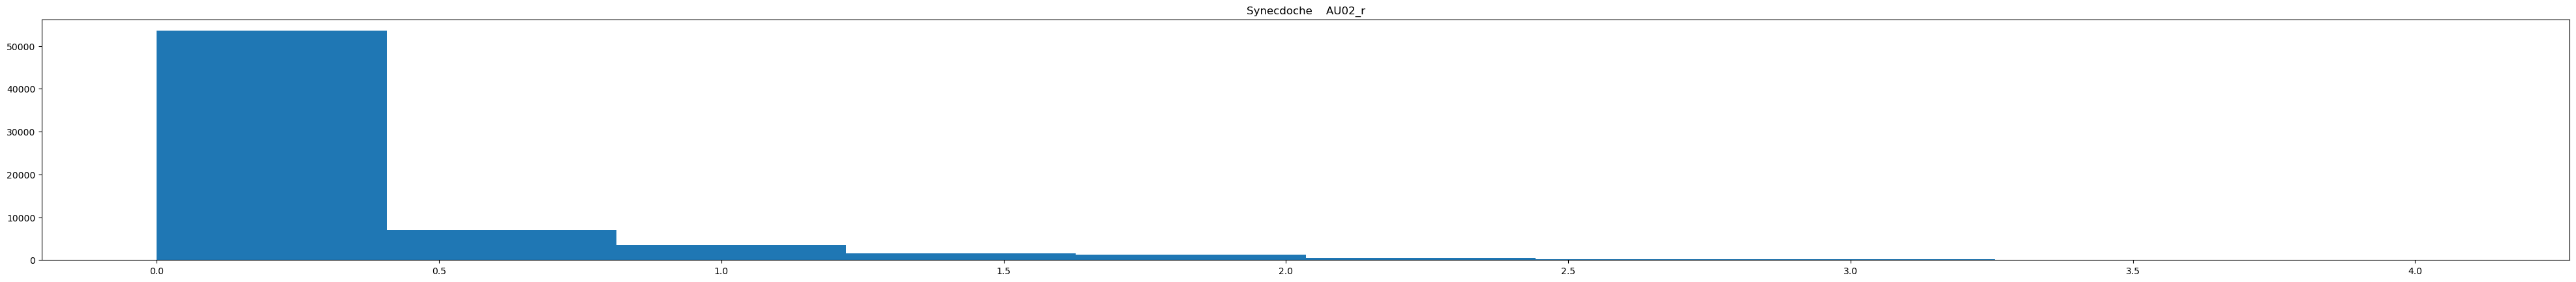

Synecdoche AU04_r


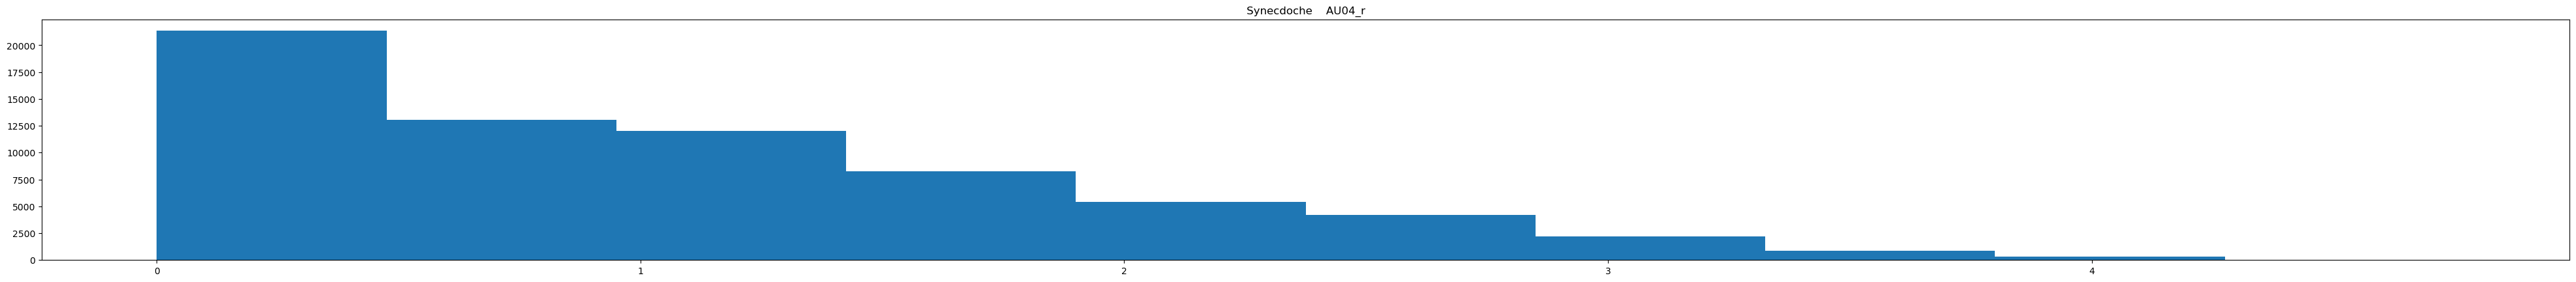

Synecdoche AU05_r


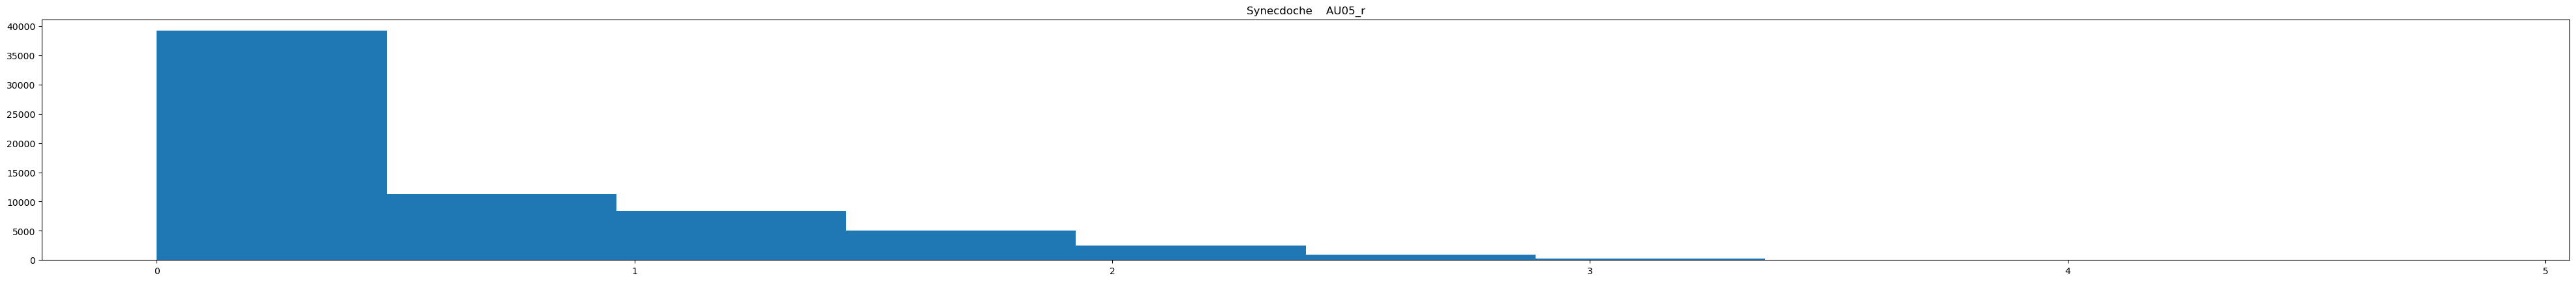

Synecdoche AU06_r


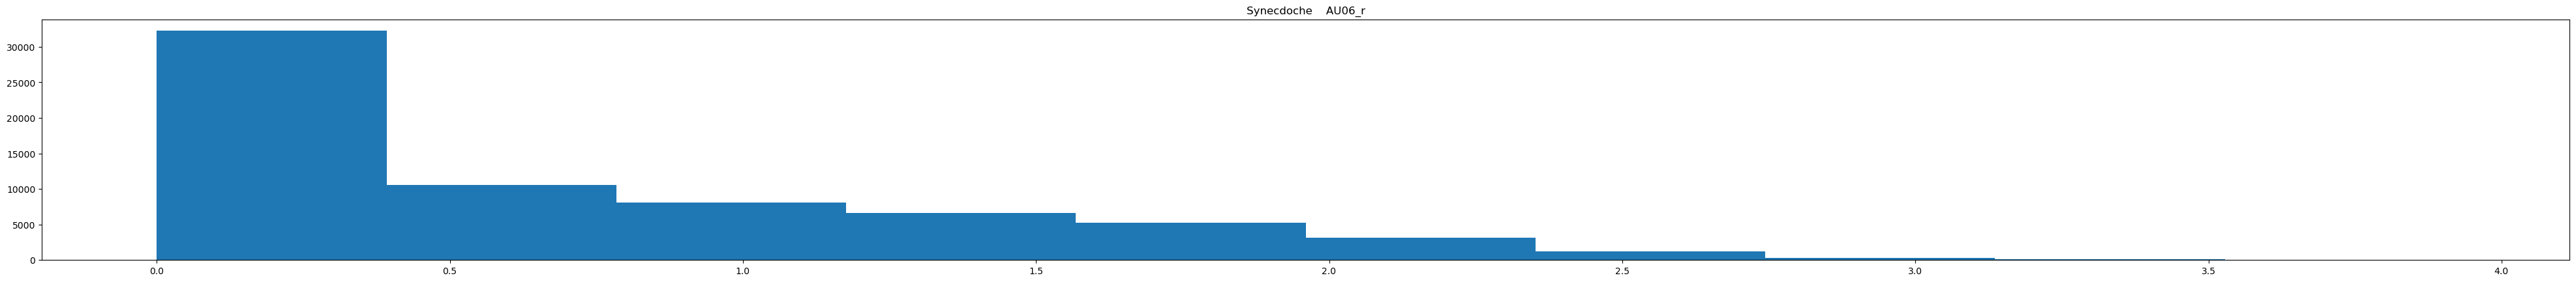

Synecdoche AU07_r


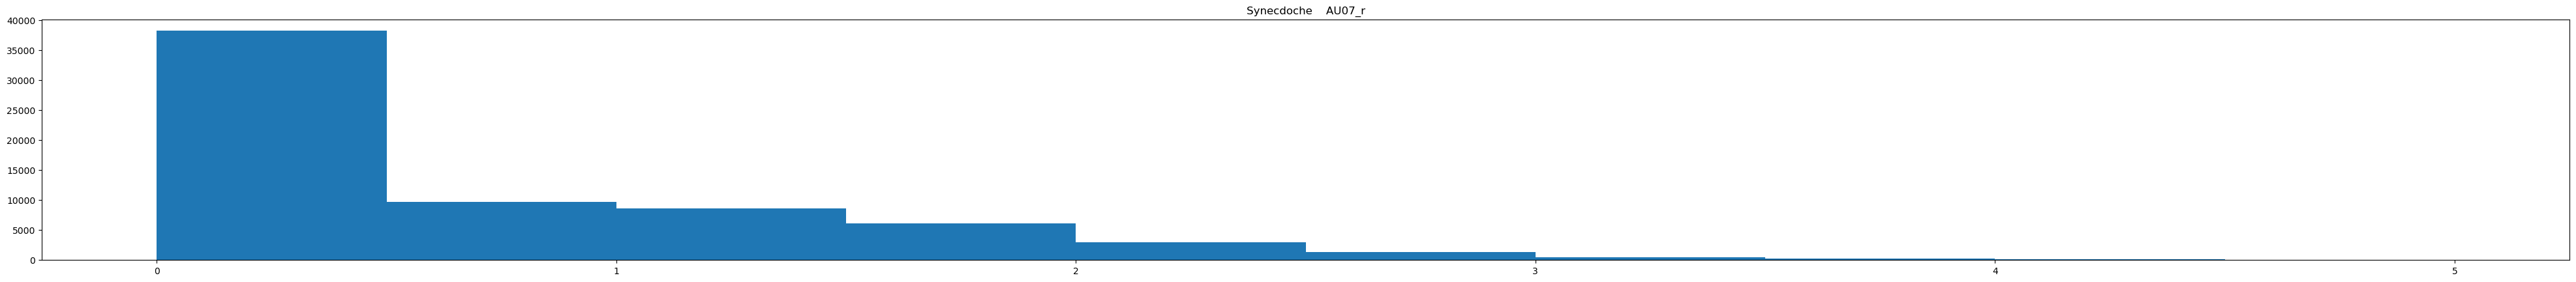

Synecdoche AU09_r


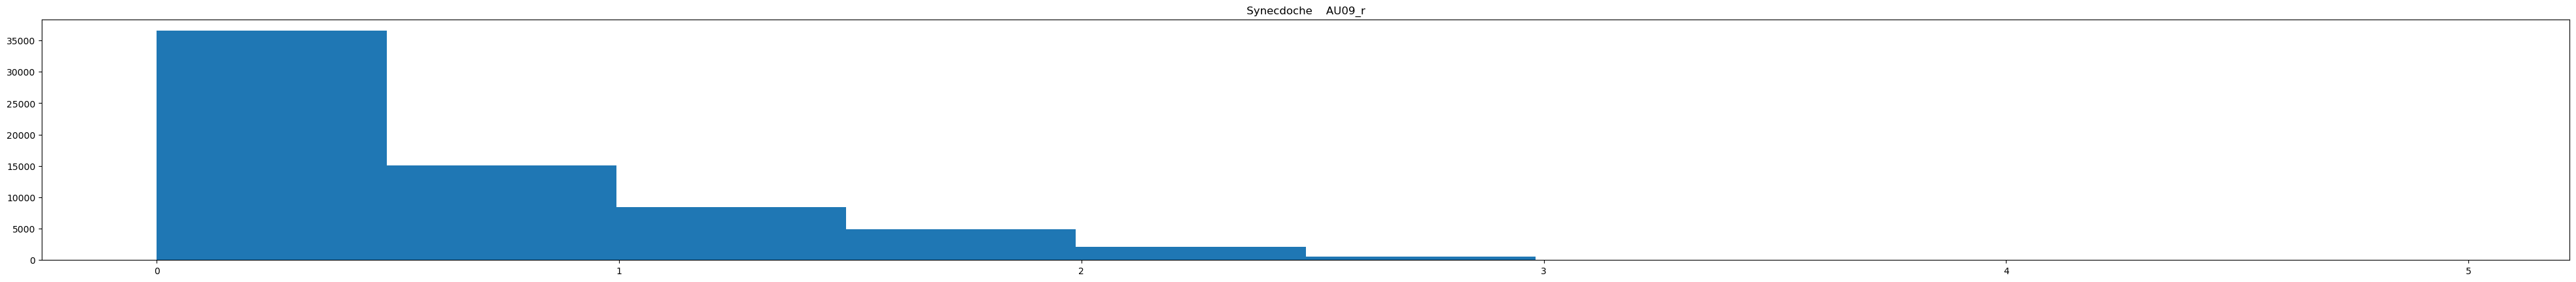

Synecdoche AU12_r


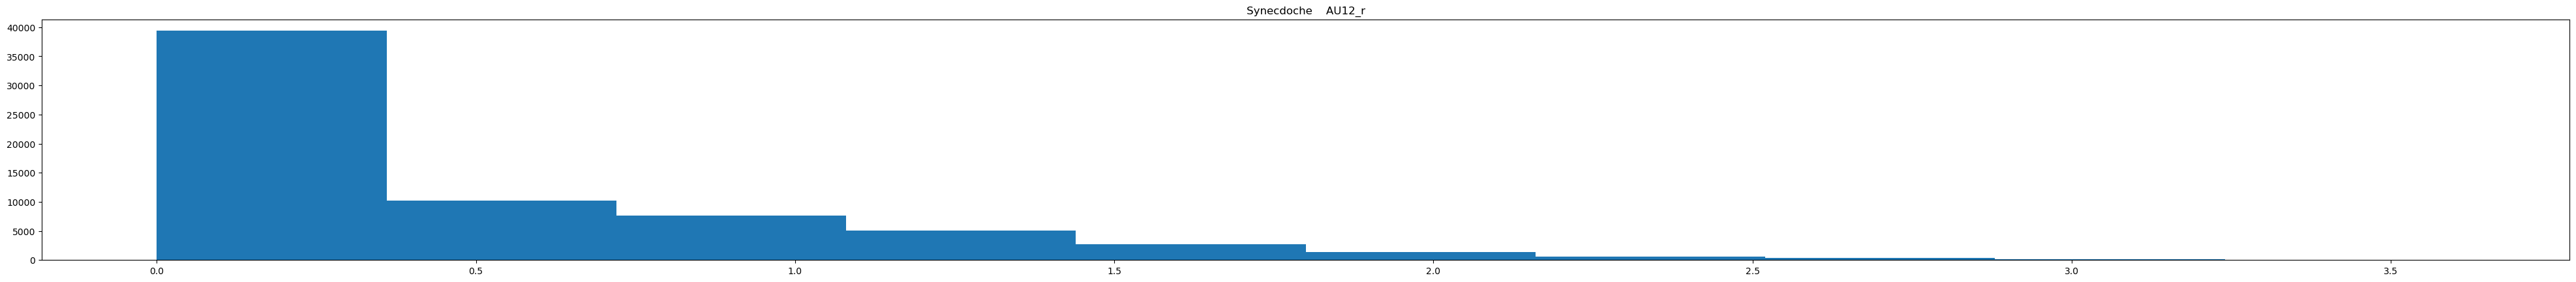

Synecdoche AU14_r


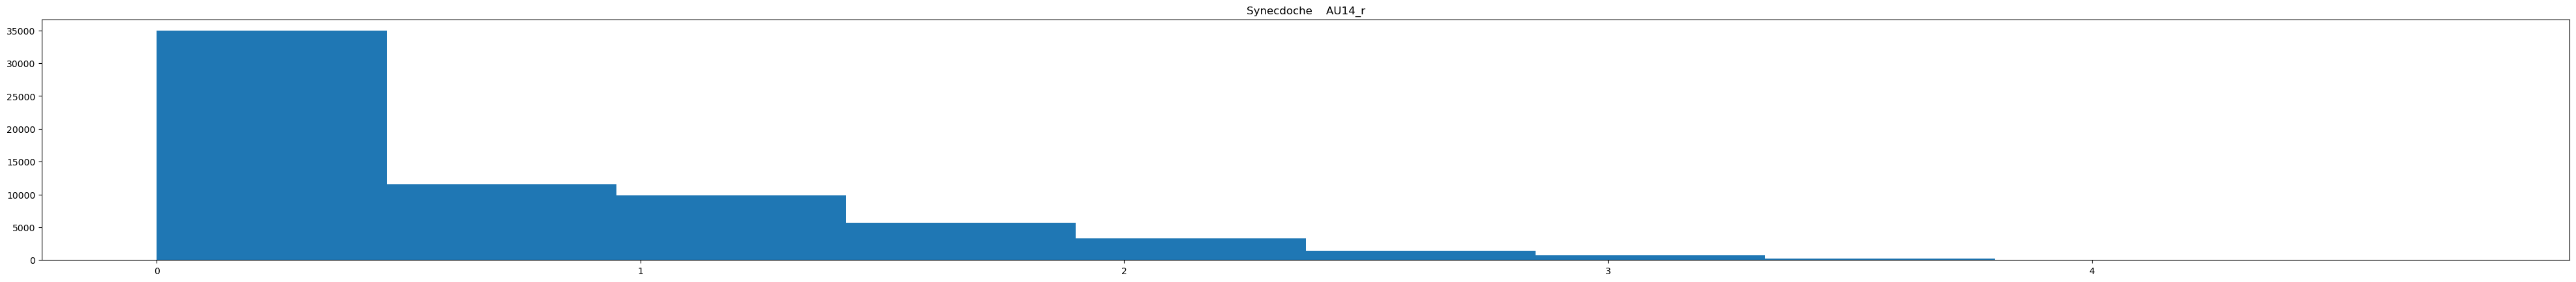

Synecdoche AU15_r


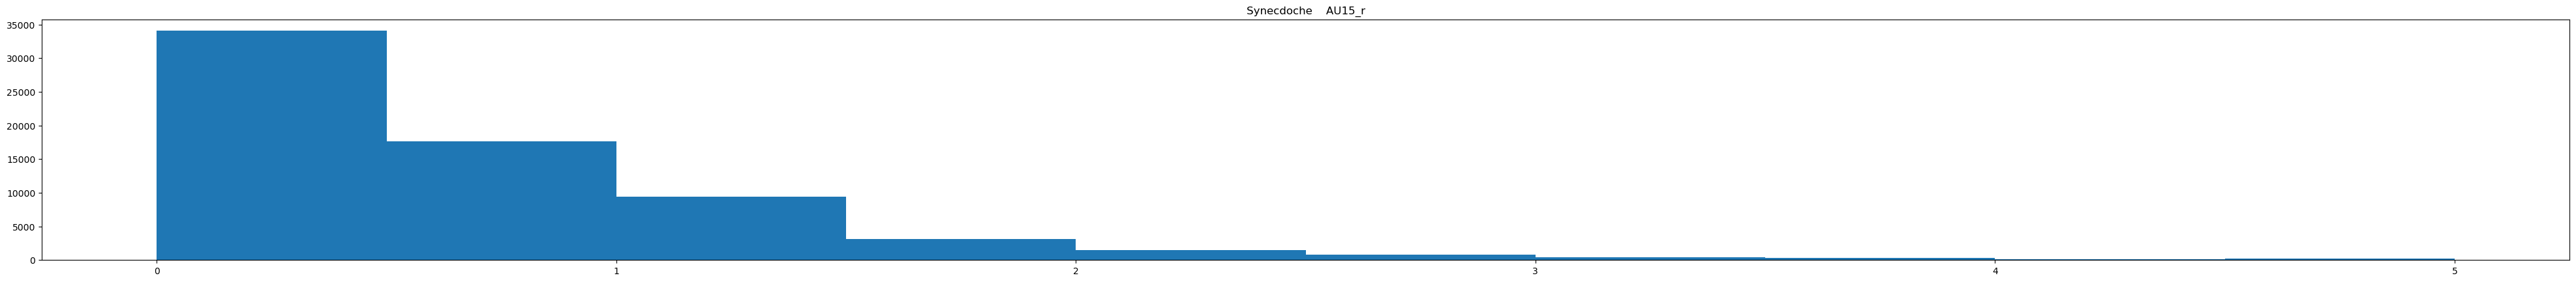

Synecdoche AU17_r


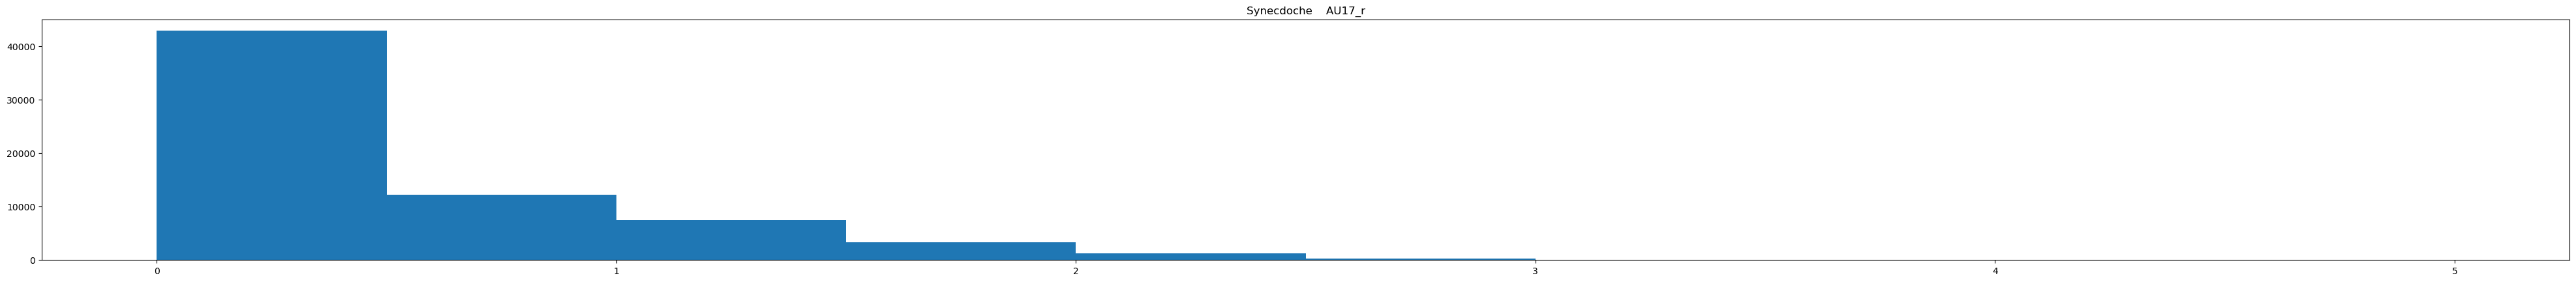

Synecdoche AU20_r


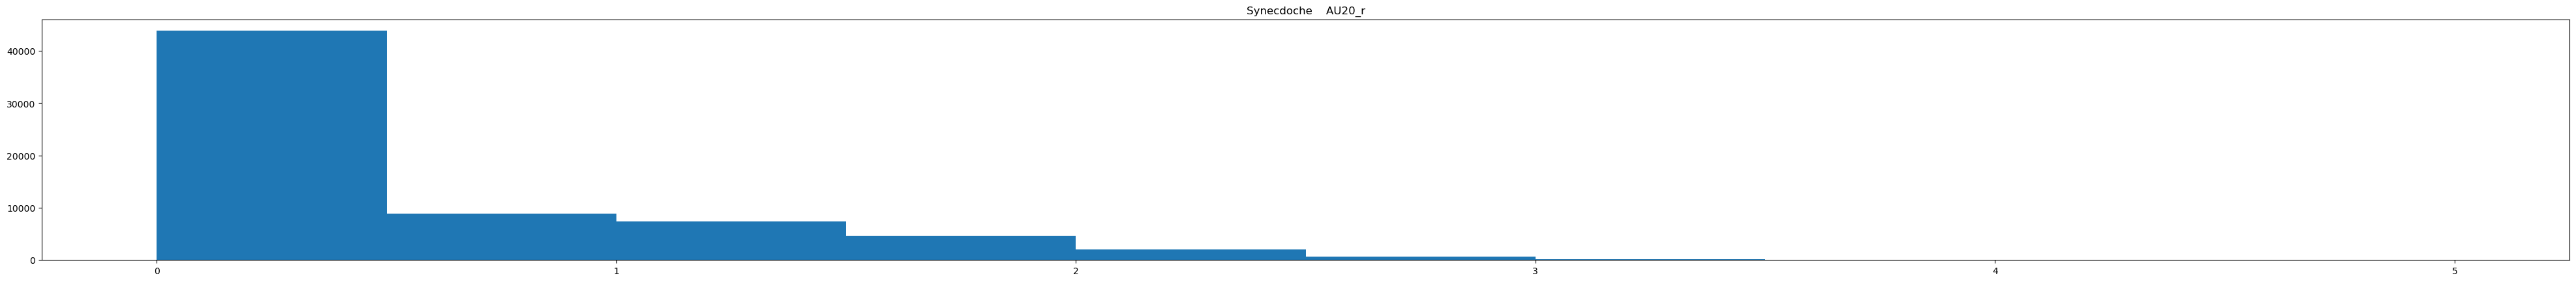

Synecdoche AU23_r


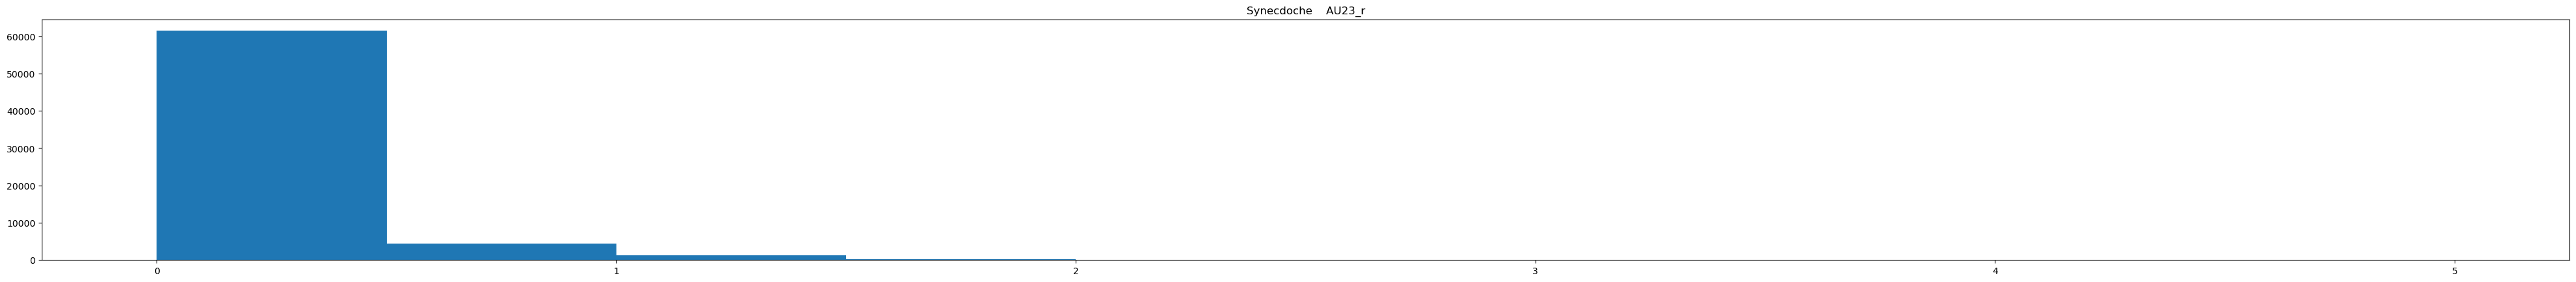

Synecdoche AU25_r


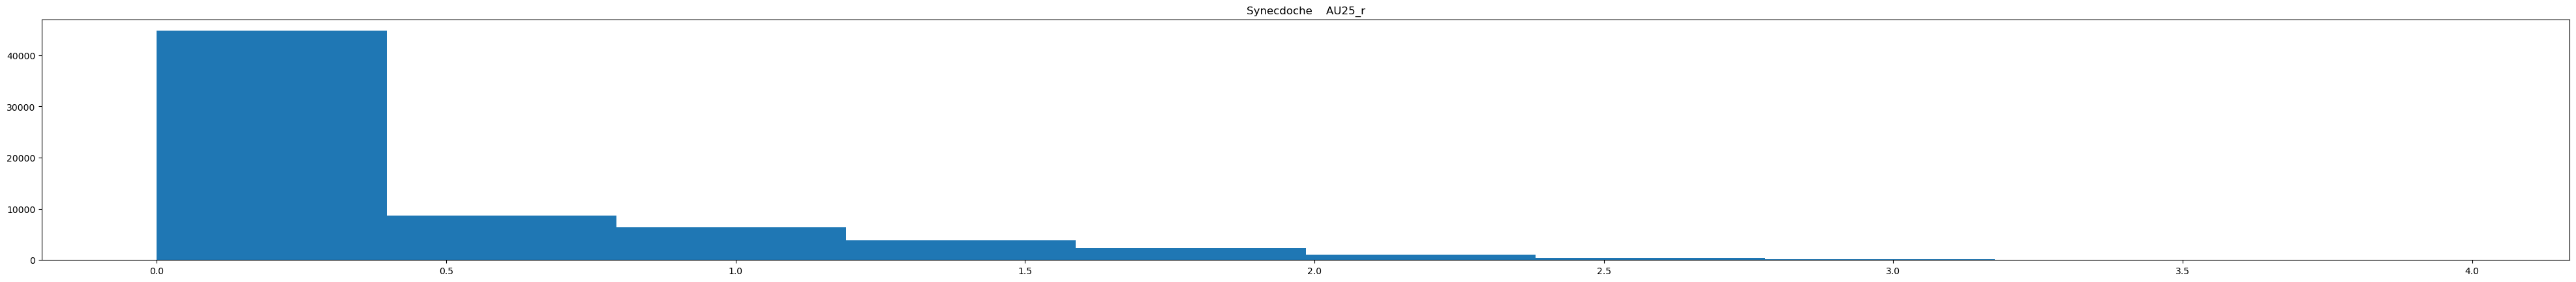

Synecdoche AU26_r


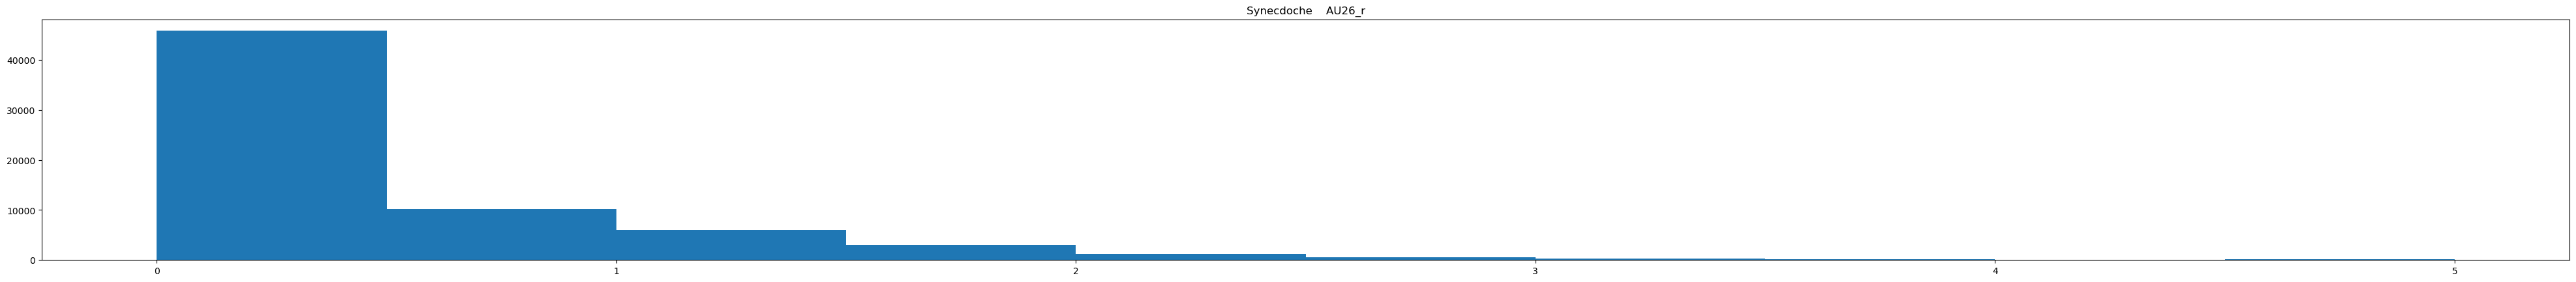

Prosess file BrightStar ...
ok reading csv...
BrightStar AU01_r


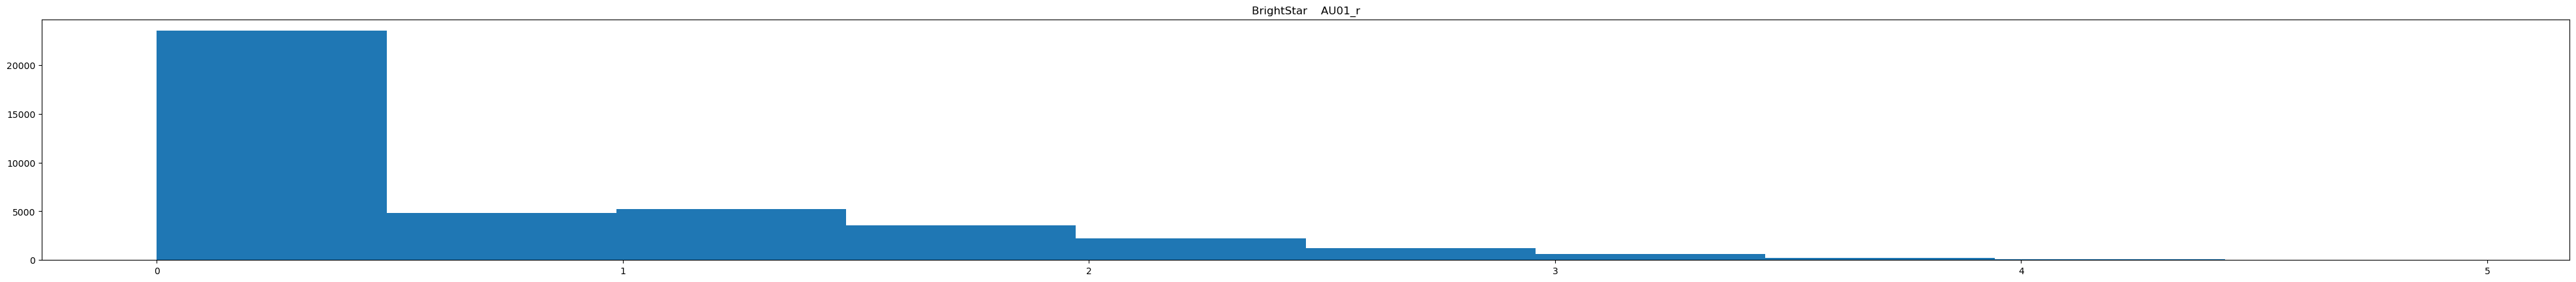

BrightStar AU02_r


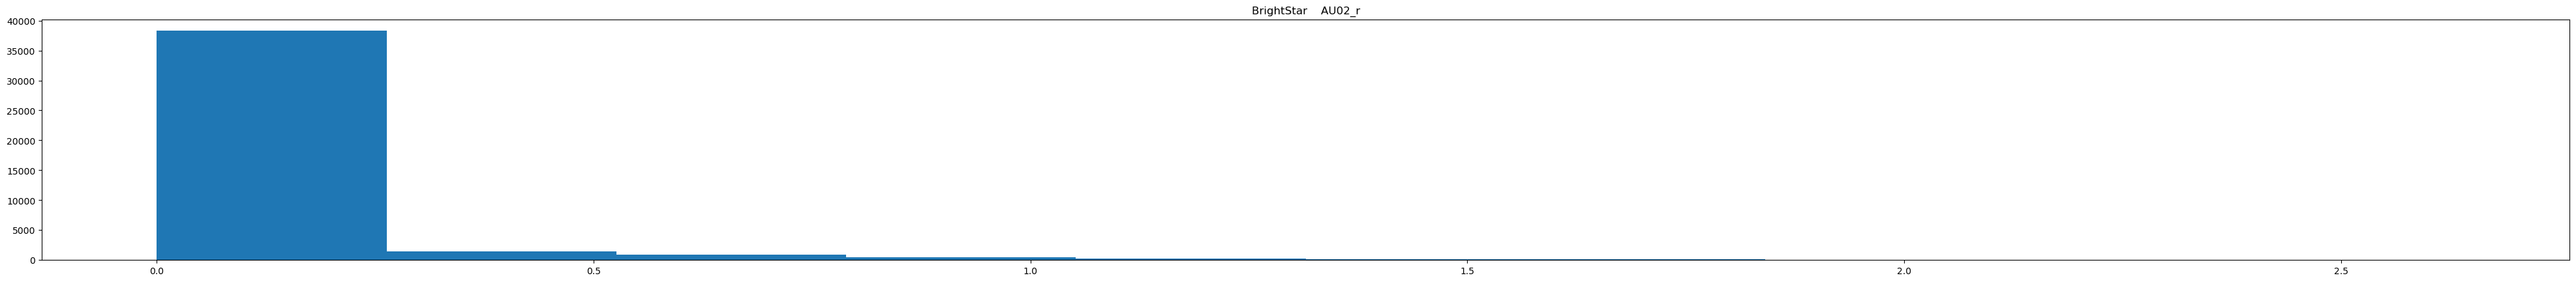

BrightStar AU04_r


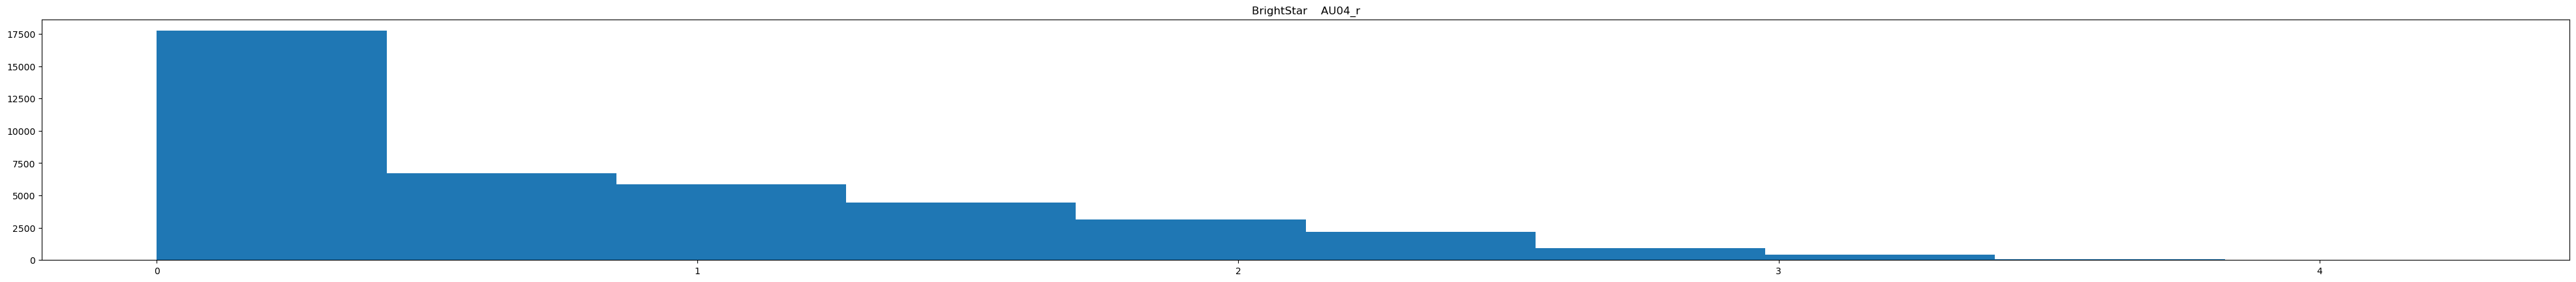

BrightStar AU05_r


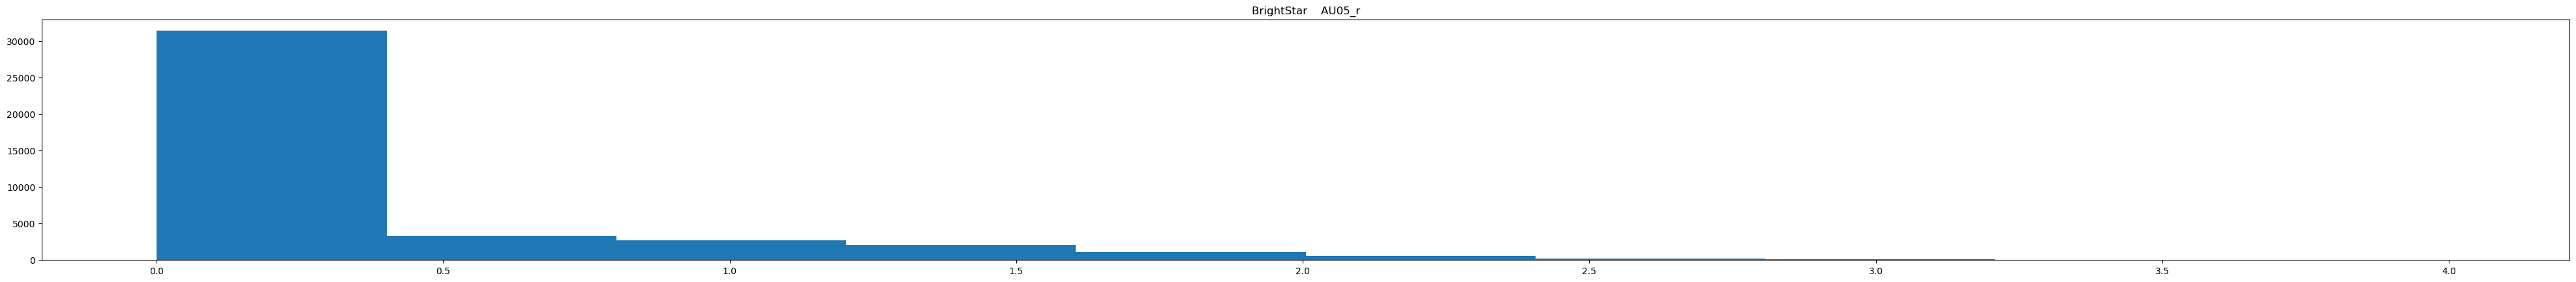

BrightStar AU06_r


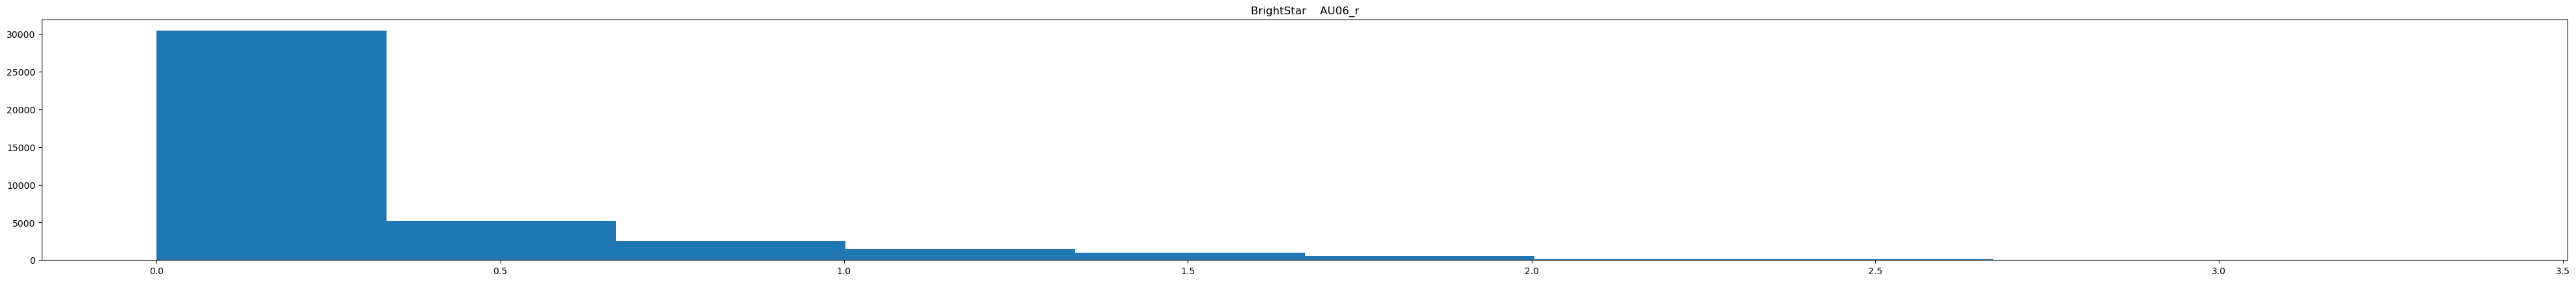

BrightStar AU07_r


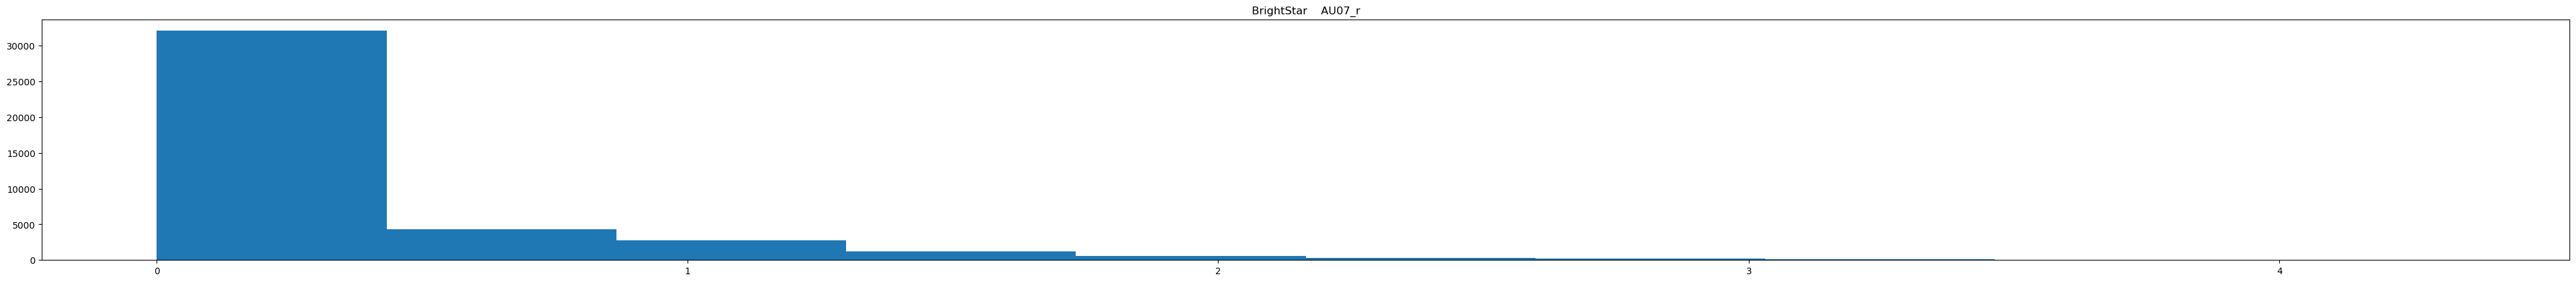

BrightStar AU09_r


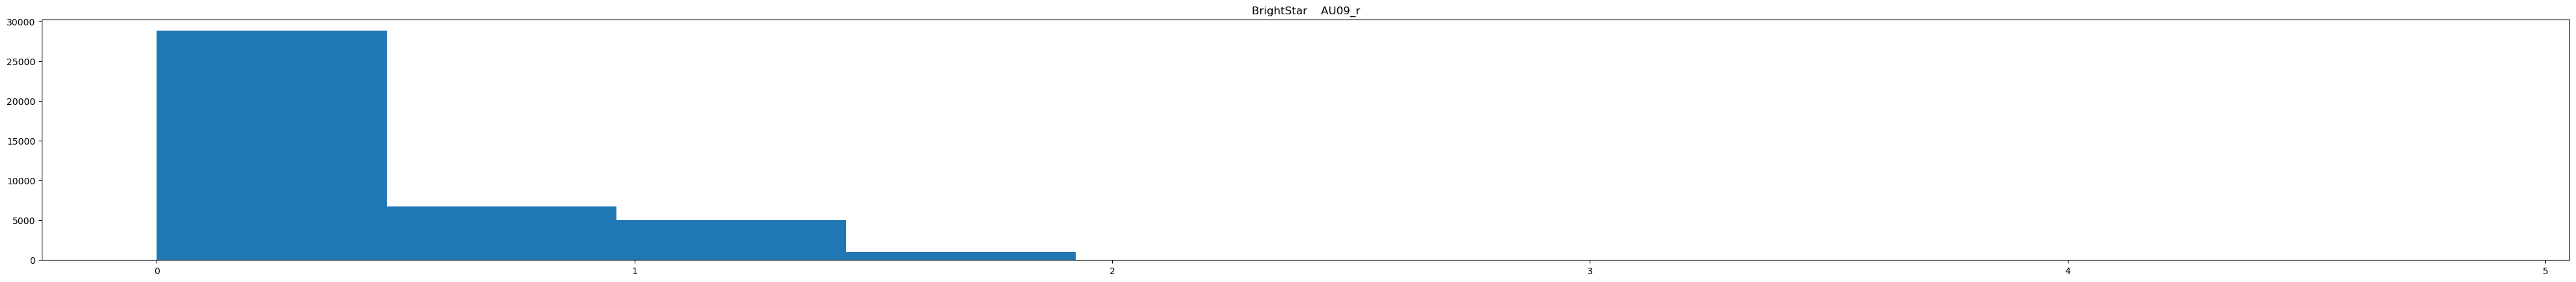

BrightStar AU12_r


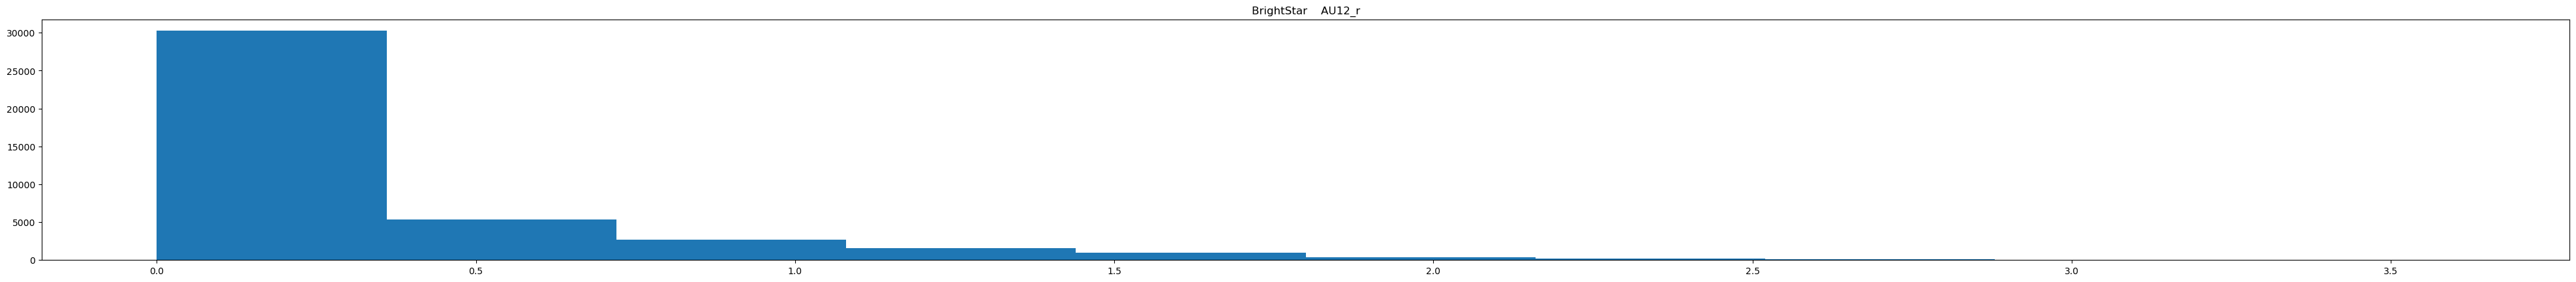

BrightStar AU14_r


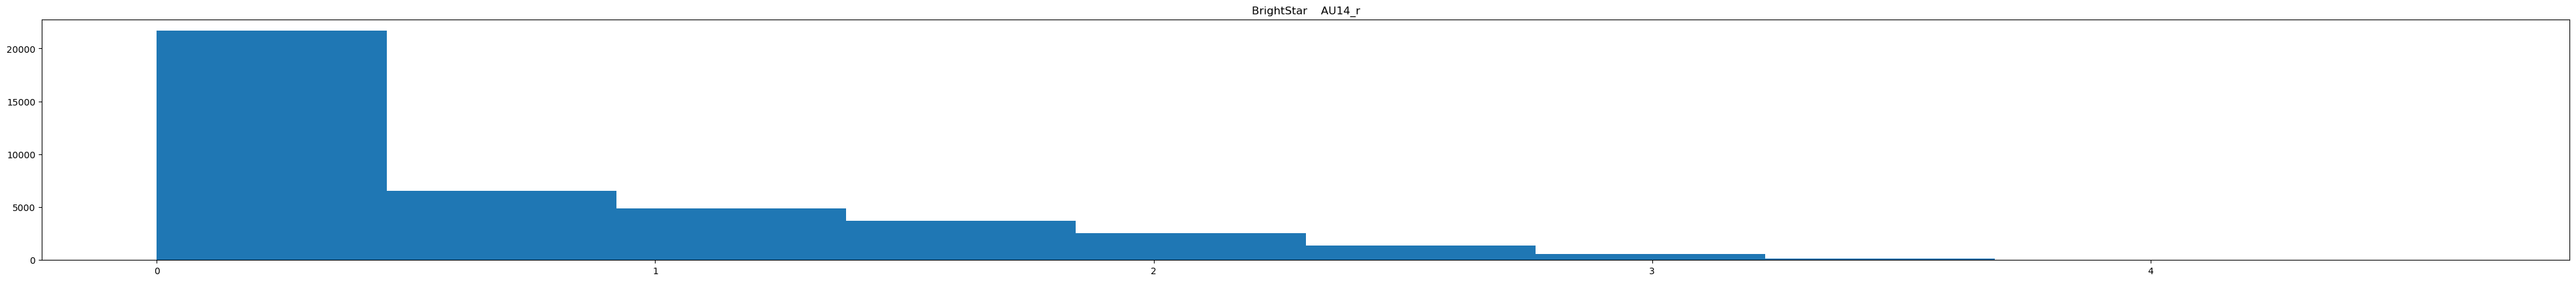

BrightStar AU15_r


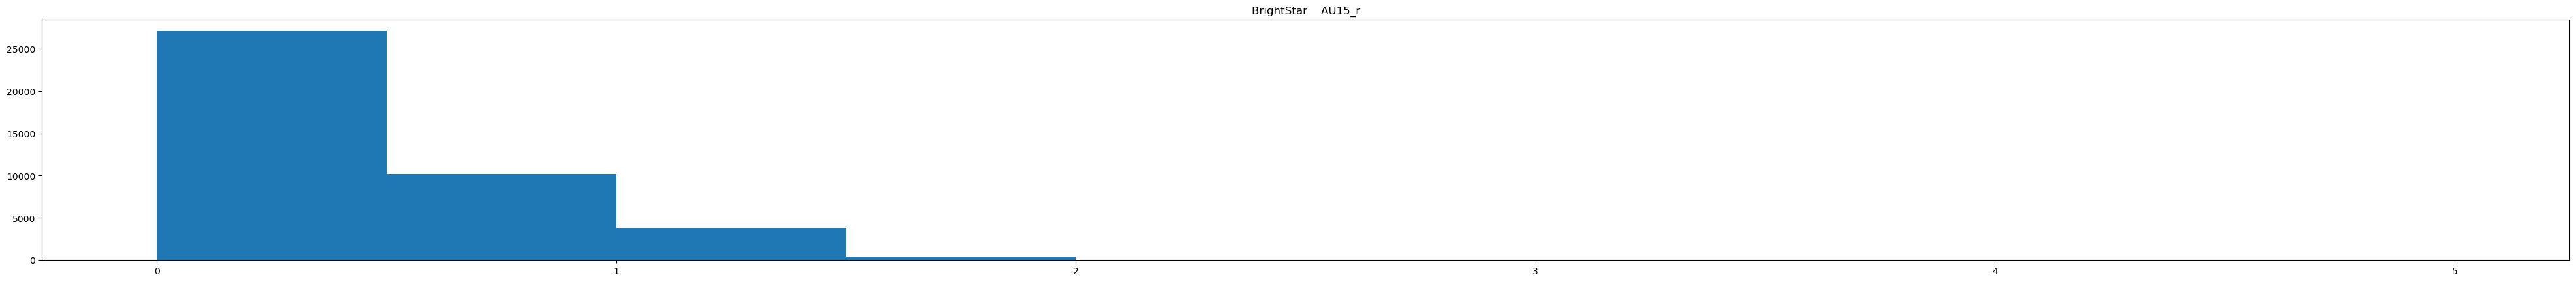

BrightStar AU17_r


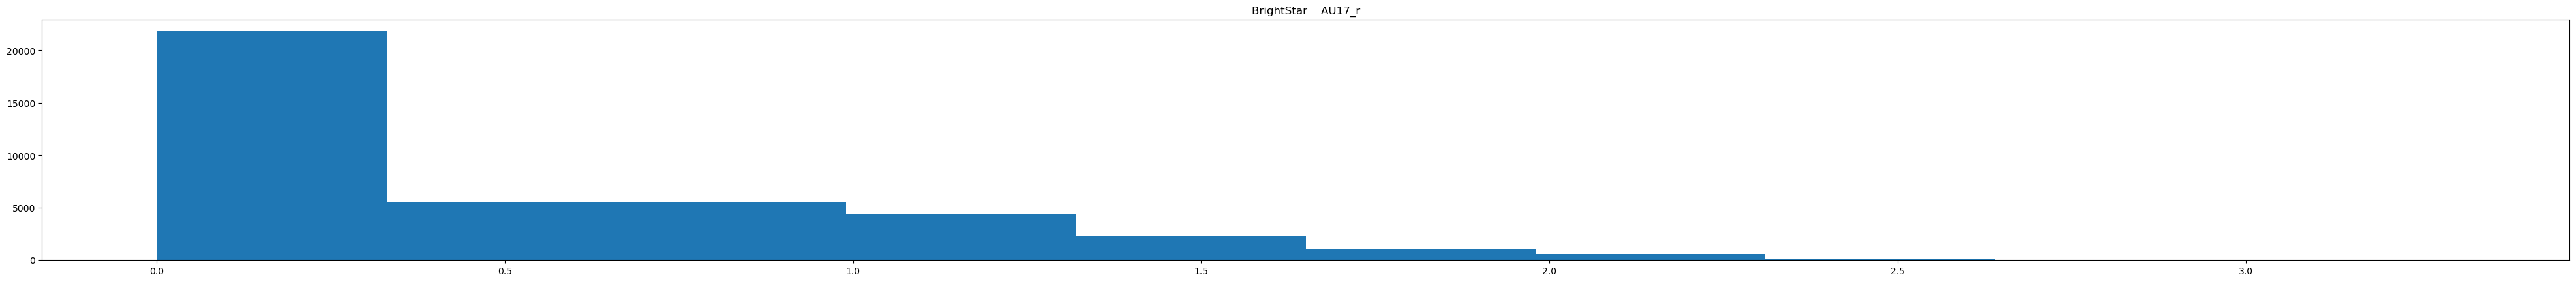

BrightStar AU20_r


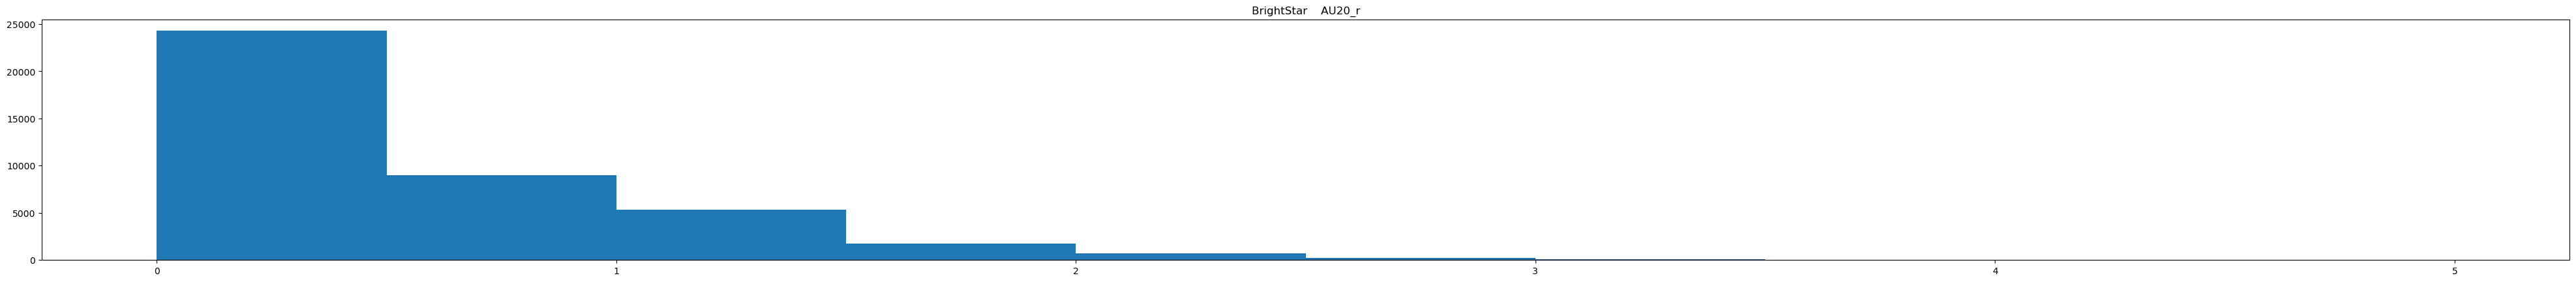

BrightStar AU23_r


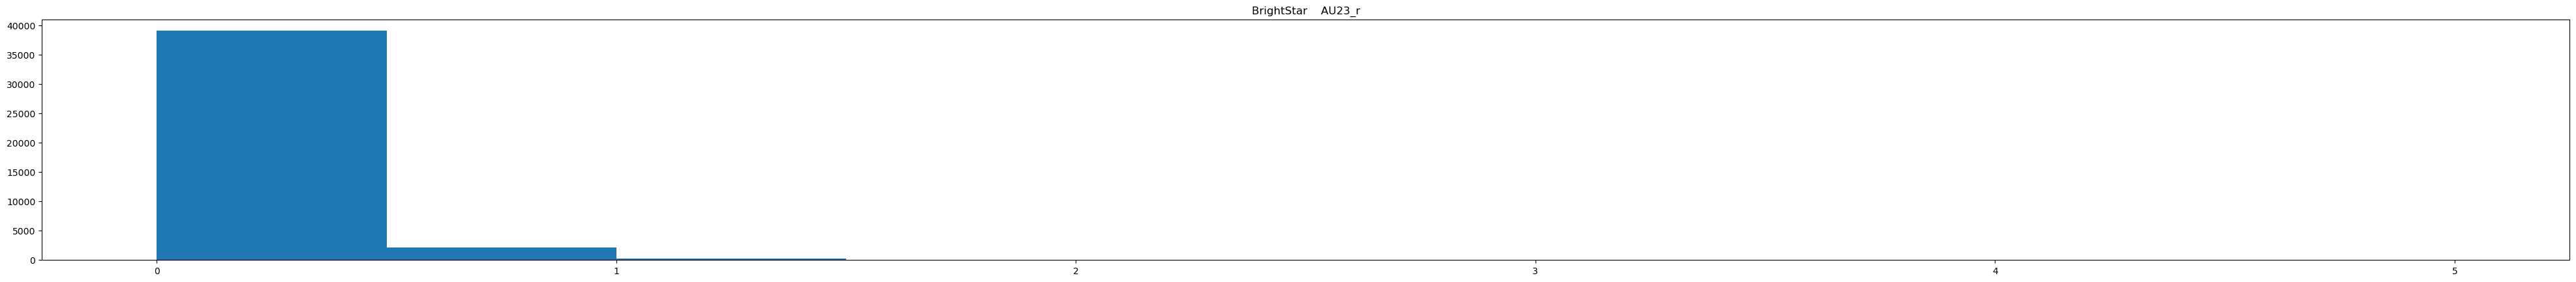

BrightStar AU25_r


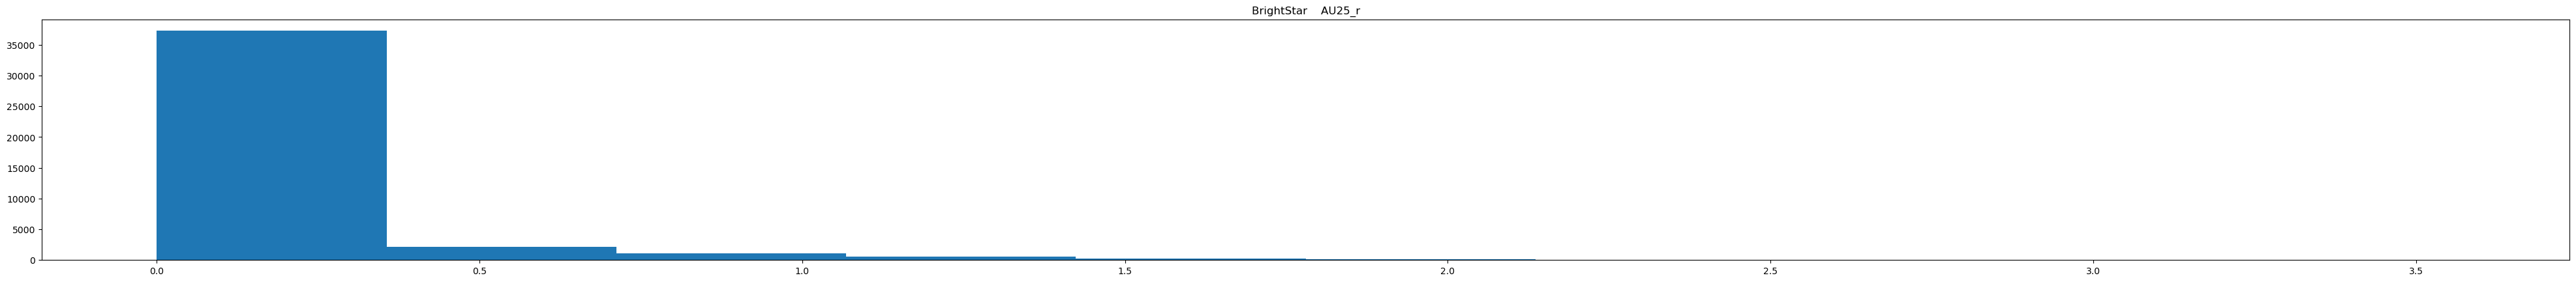

BrightStar AU26_r


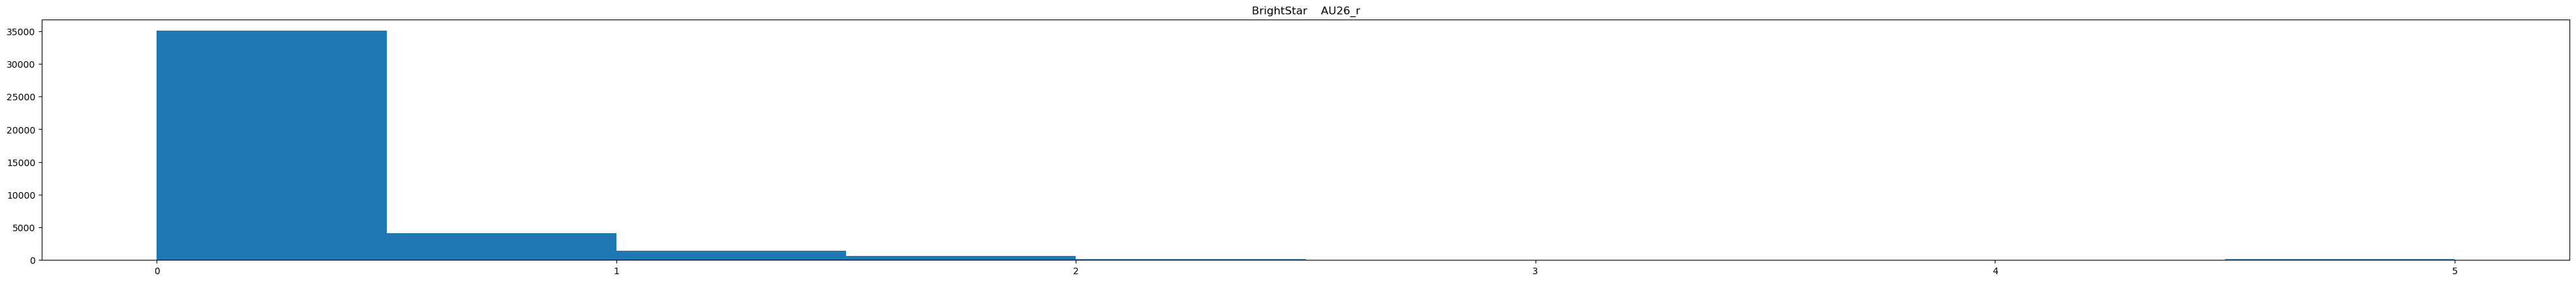

Prosess file Click ...
ok reading csv...
Click AU01_r


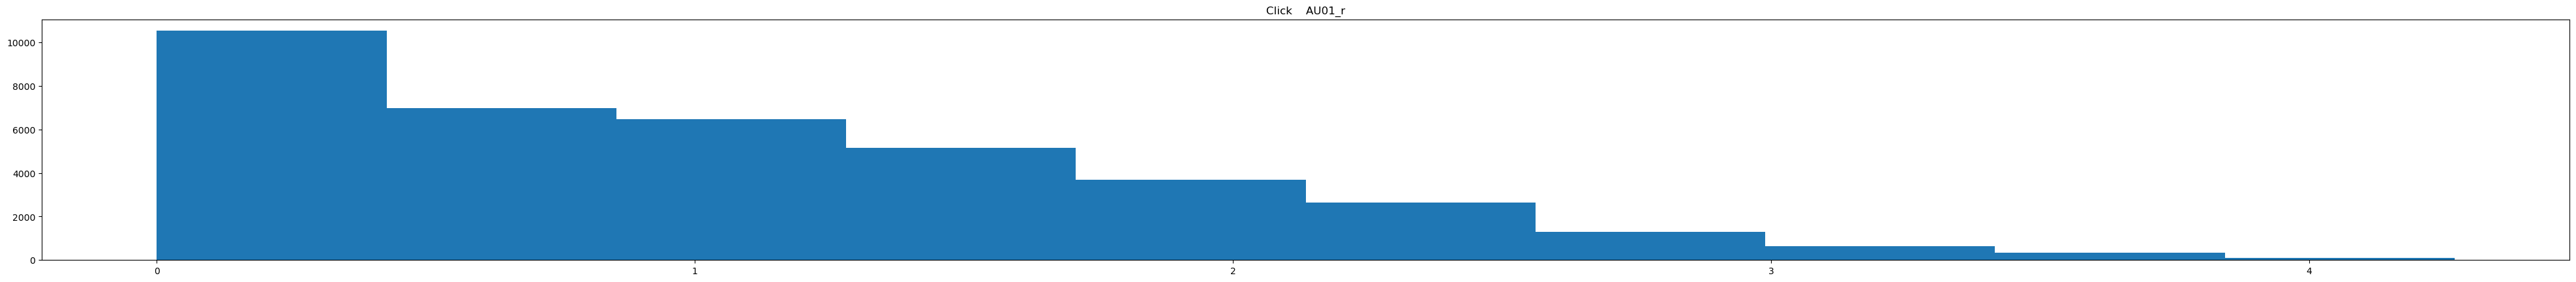

Click AU02_r


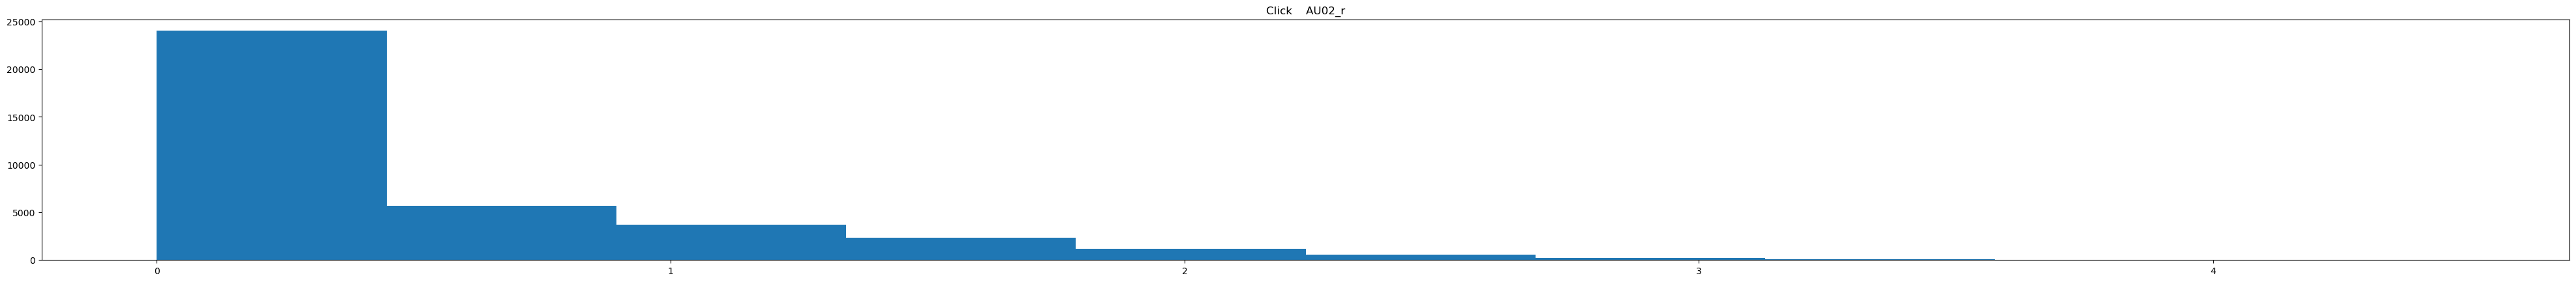

Click AU04_r


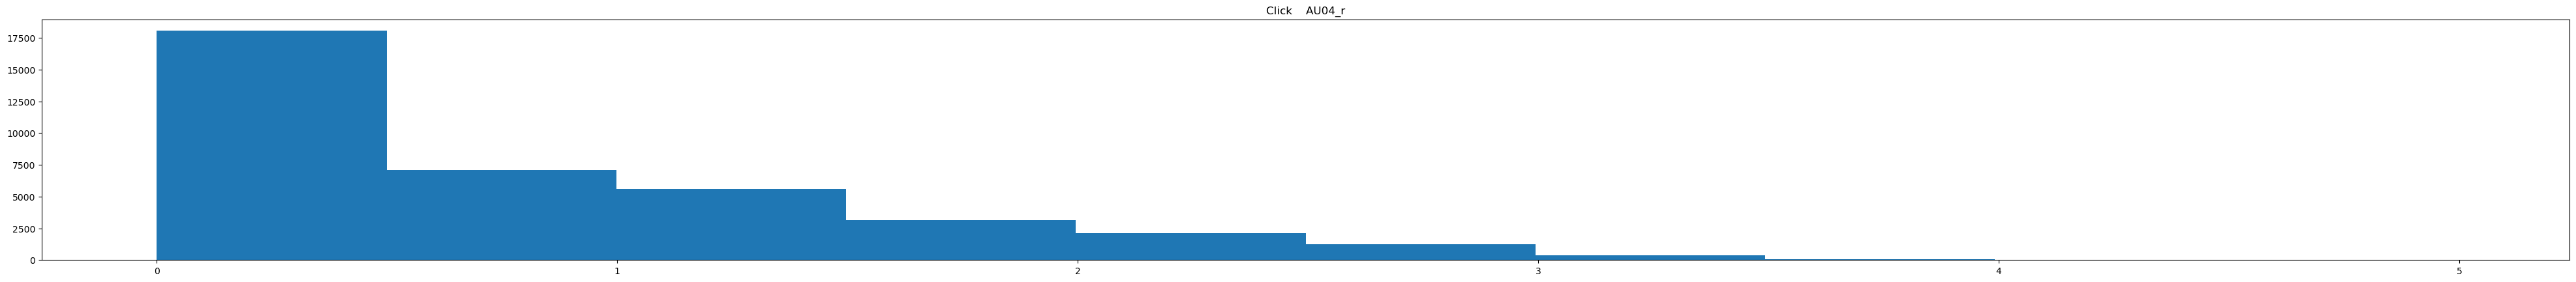

Click AU05_r


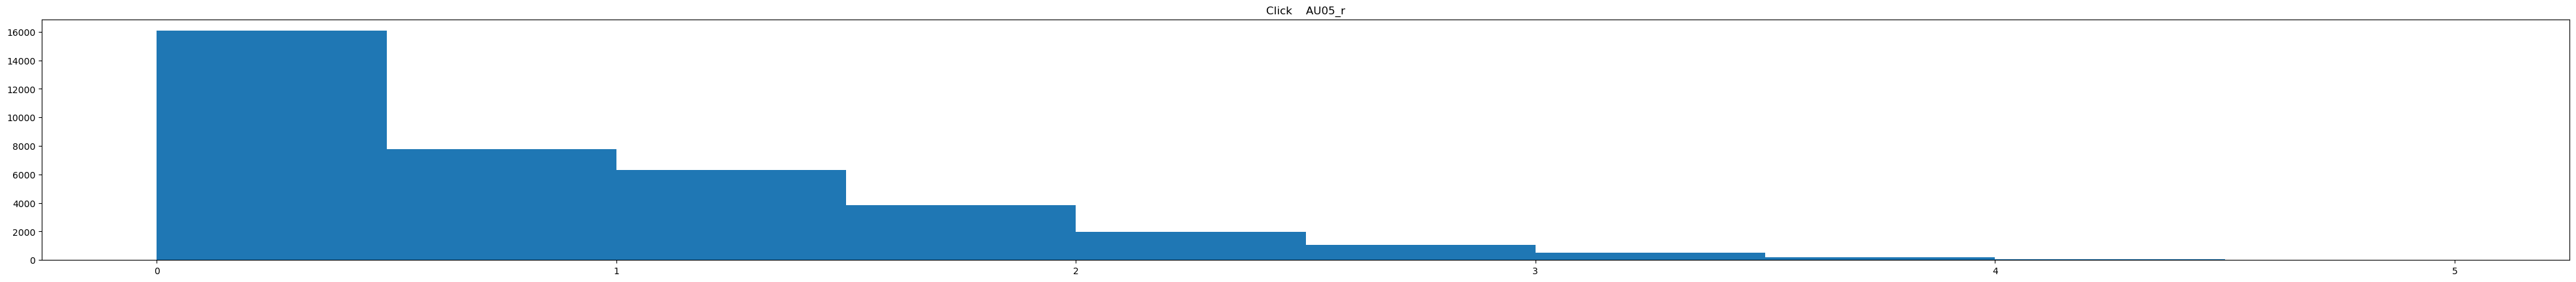

Click AU06_r


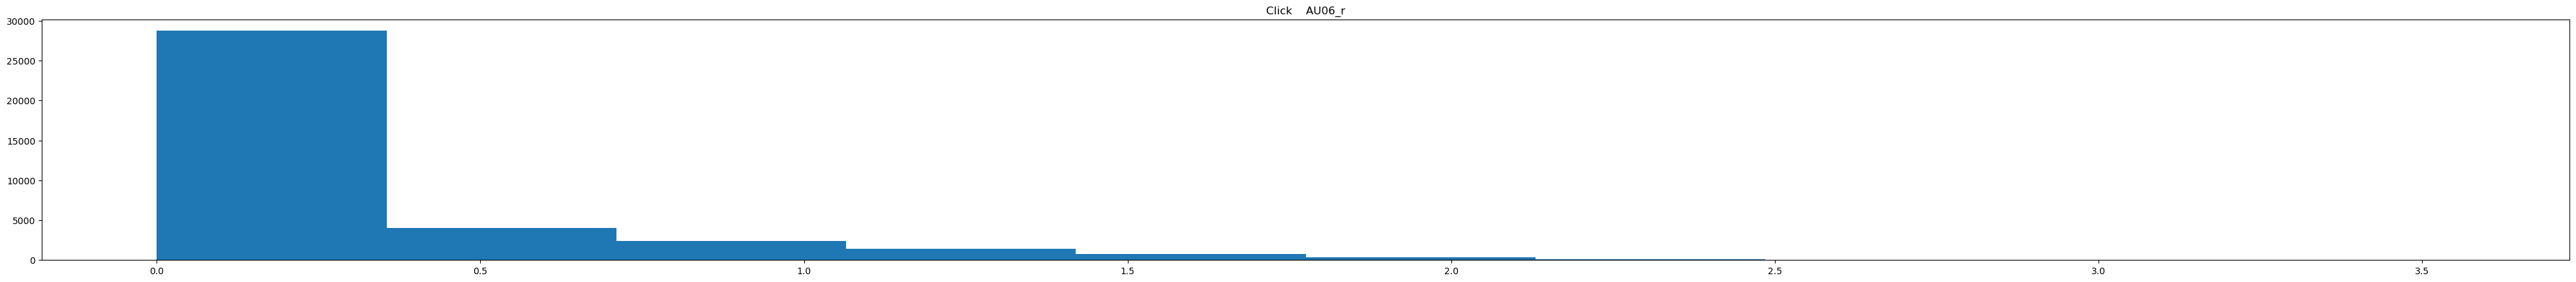

Click AU07_r


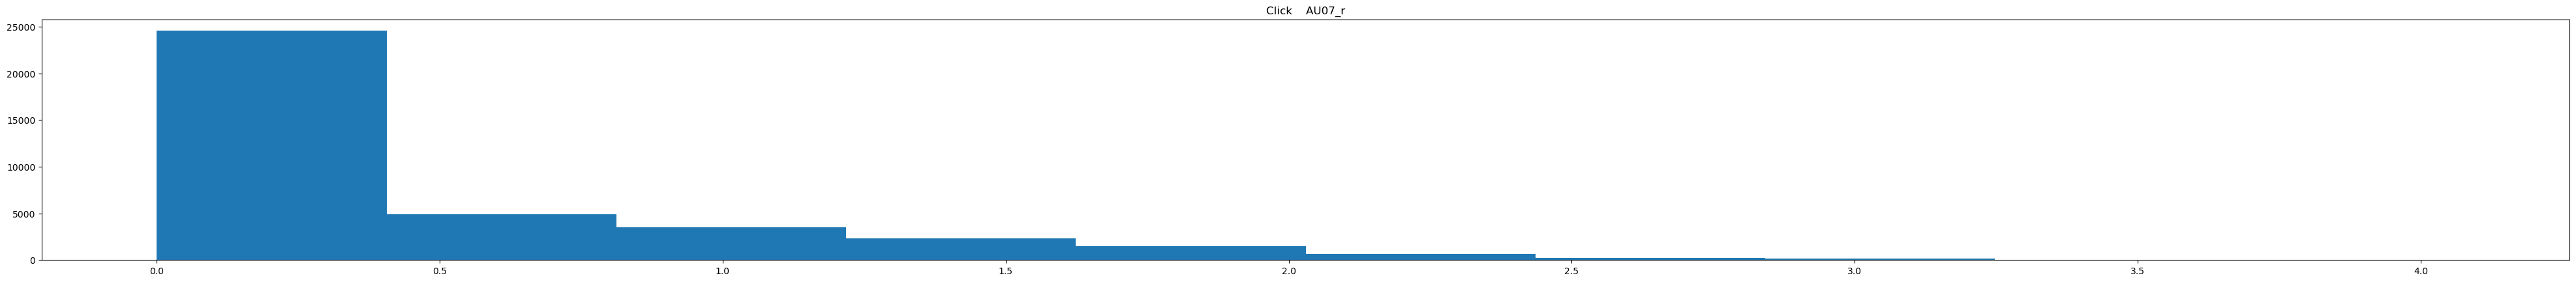

Click AU09_r


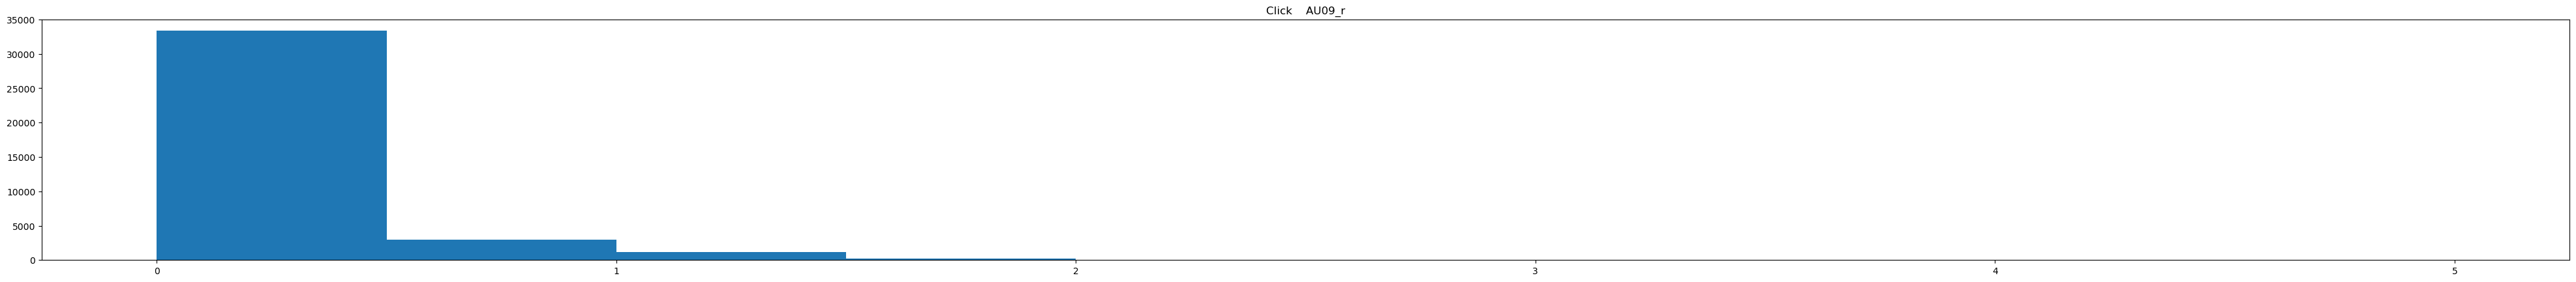

Click AU12_r


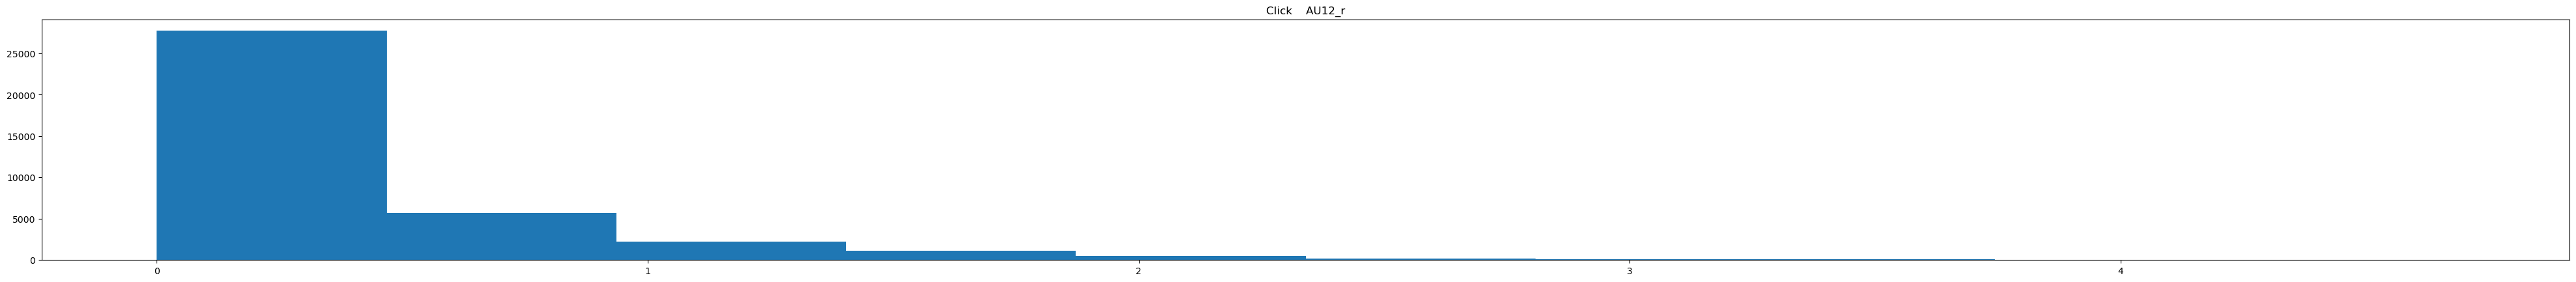

Click AU14_r


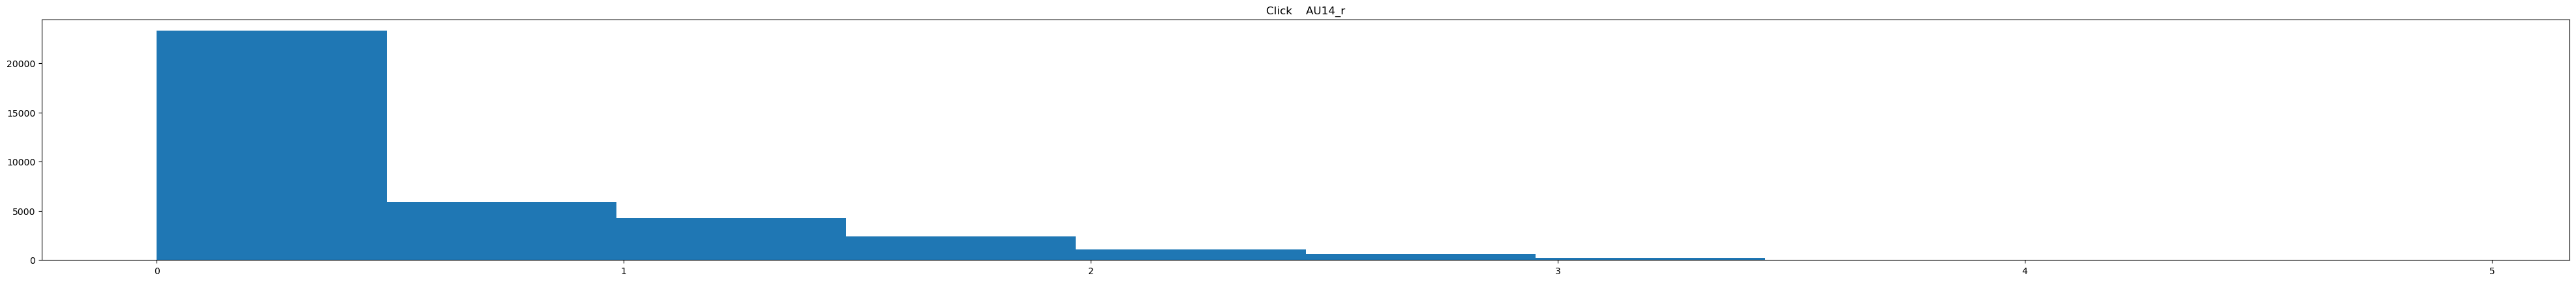

Click AU15_r


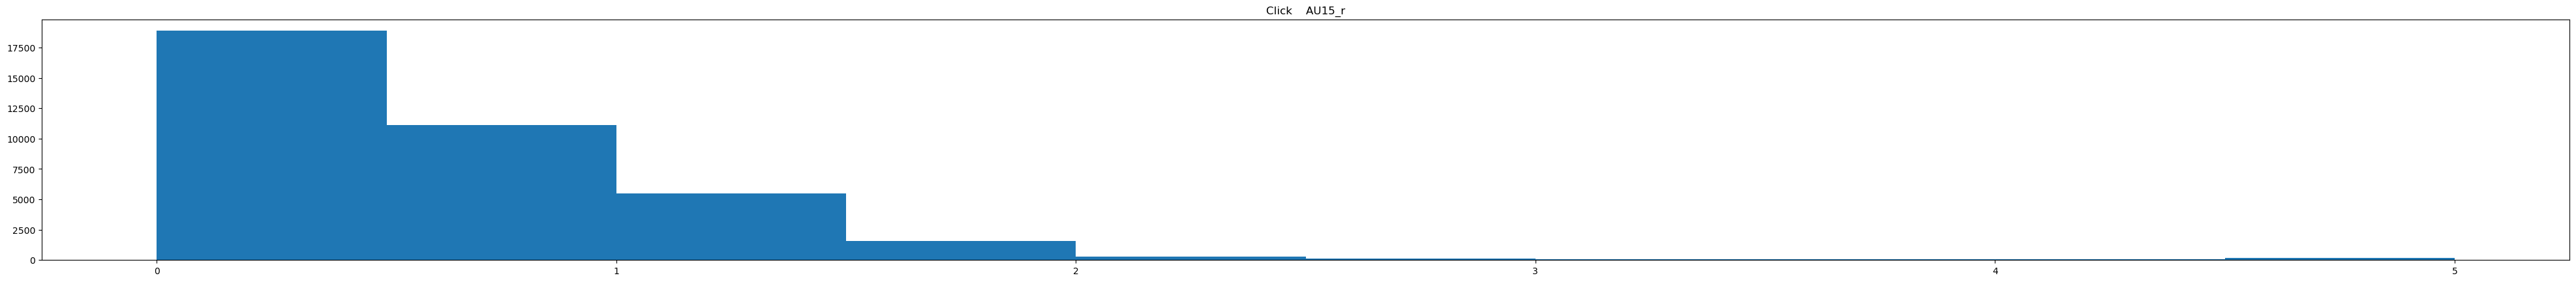

Click AU17_r


KeyboardInterrupt: 

In [123]:
for i in filenames:
    name = i.split('.')[0][:-2]
    print('Prosess file', name, '...')
    df = pd.read_csv(FOLDER_INPUT + i, delimiter=',')
    print('ok reading csv...')

    for au in COLSETS['all']:
        print(name, au)
        f = plt.figure()
        #f.set_figwidth(50)
        #plt.plot(df[au], label=au)
        plt.hist(df[au], label=au)
        plt.title(name + '    ' + au)
        plt.show()

In [27]:
videoH = pd.read_csv(FOLDER_INPUT + filenames[1], delimiter=',')
videoA = pd.read_csv(FOLDER_INPUT + filenames[3], delimiter=',')
#print(videoH, videoA)

In [81]:
for i in AUs:
    data_group1 = np.array(videoH[i])
    data_group2 = np.array(videoA[i])
    
    print(i, data_group1.mean(), data_group2.mean(), stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True))

AU01_r 0.3352806874996947 0.30708589967183675 Ttest_indResult(statistic=11.349135291690585, pvalue=7.871046887517055e-30)
AU02_r 0.14620417991244283 0.15151262998906603 Ttest_indResult(statistic=-2.448342663621002, pvalue=0.014353521026867837)
AU04_r 0.3842963909485951 0.39677489332878313 Ttest_indResult(statistic=-5.038693358090272, pvalue=4.6968153152700183e-07)
AU05_r 0.3450154966596077 0.25316443964803736 Ttest_indResult(statistic=37.602867387745064, pvalue=6.626739818484647e-307)
AU06_r 0.22118930404380485 0.33521797410379345 Ttest_indResult(statistic=-43.330466785820725, pvalue=0.0)
AU07_r 0.2277180472095946 0.26274102145797323 Ttest_indResult(statistic=-14.18121758745967, pvalue=1.3505213199743394e-45)
AU09_r 0.23596157404028756 0.32377996275054644 Ttest_indResult(statistic=-34.69404242356089, pvalue=6.719377971762391e-262)
AU12_r 0.1849053369064598 0.27435971431515643 Ttest_indResult(statistic=-35.3415369216356, pvalue=1.296313888591089e-271)
AU14_r 0.2440030621647732 0.2947922

In [29]:
data_group1.mean()

0.41114670868347336

In [30]:
data_group2.mean()

0.44572431633407245

In [31]:
from itertools import cycle

In [ ]:
shots = df.face_id.unique() #find unique face_ids
for id in shots:
    

au[AU] = list(df[df['face_id'] == 23][AU])

In [54]:
videoH = mov.normalize(videoH)

In [ ]:
videoA = mov.normalize(videoA)

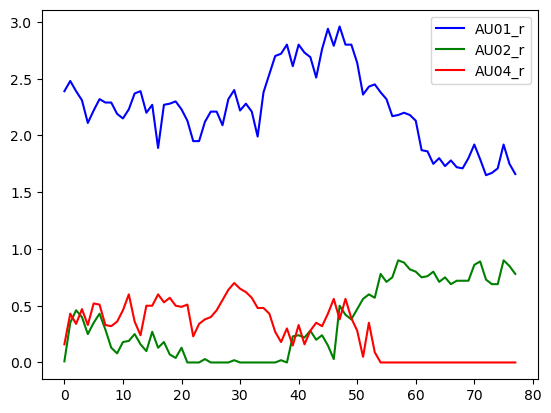

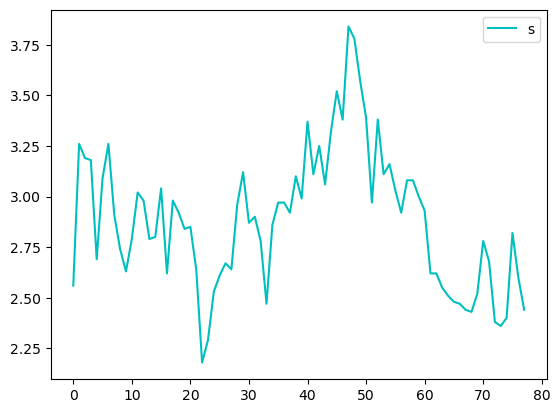

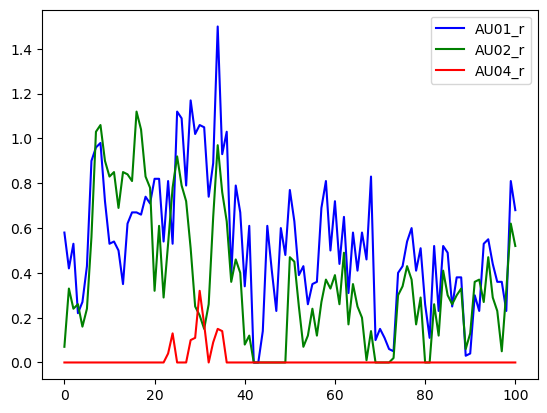

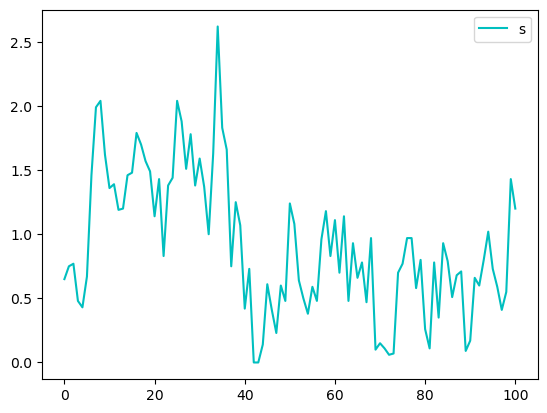

In [91]:
shots = df.face_id.unique() #find unique face_ids
start = 4
shots = shots[start:(start+2)]
for id in shots:
    au = df[df['face_id'] == id]
    mov.plot(au, COLSETS['eyes'])

In [93]:
df = mov.normalize(df)

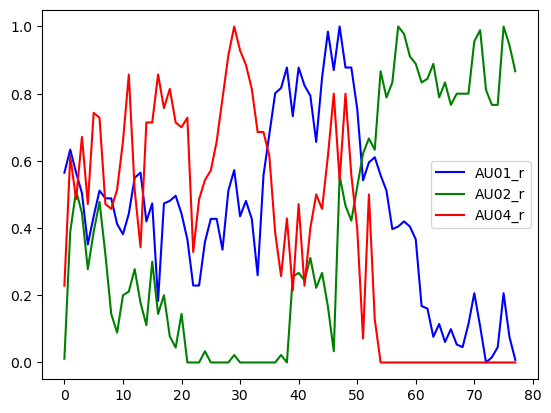

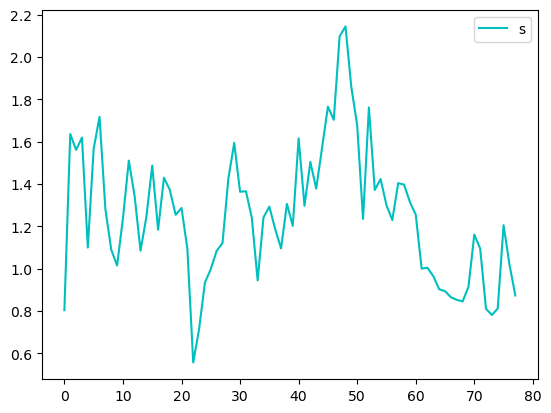

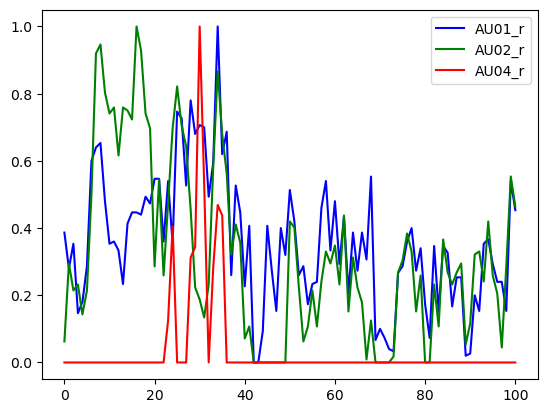

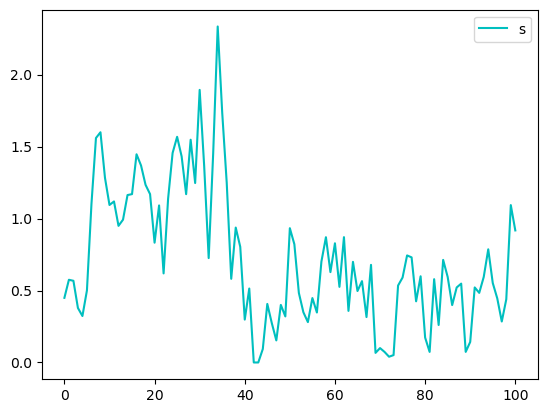

In [94]:
shots = df.face_id.unique() #find unique face_ids
start = 4
shots = shots[start:(start+2)]
for id in shots:
    au = df[df['face_id'] == id]
    mov.plot(au, COLSETS['eyes'])

In [27]:
#get statistics on every file

In [74]:
#return selected rows for all HM and AM movies
def hm_am(file):
    HM = ['MonsterInLaw', 'QuantumOfSolace', 'Click', 'PiratesOfCaribbean', 'TheDarkKnight', 'FastAndFurious']
    AM = ['Clean', 'Synecdoche', 'BrightStar', 'CertifiedCopy', 'Spider', 'AllOrNothing']

    COLS=['movie', 'face_id', 'time', 'eyes_mean', 'eyes_SD', 'midpart_mean', 'midpart_SD',
    'mouth_mean', 'mouth_SD', 'eyes_d_mean', 'eyes_d_SD', 'midpart_d_mean', 'midpart_d_SD', 'mouth_d_mean', 'mouth_d_SD']

    df = pd.read_csv(file, sep=',')

    
    #dset for Hollywood movies
    outputHM = pd.DataFrame(columns=COLS)
    for i in HM:
        outputHM = pd.concat([outputHM, df[df['movie'] == i]]) #select rows with a particular face_id

    #dset for Art movies
    outputAM = pd.DataFrame(columns=COLS)
    for i in AM:
        outputAM = pd.concat([outputAM, df[df['movie'] == i]]) #select rows with a particular face_id
    
    
    return outputHM, outputAM






In [85]:
OUTPUT = './experiments/'
hm, am = hm_am(f'./{OUTPUT}/All_movies_sum_sg.csv')

In [86]:
import scipy.stats as stats

In [87]:
data_group1 = np.array(hm['eyes_mean'])
data_group2 = np.array(am['eyes_mean'])

In [88]:
stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)

Ttest_indResult(statistic=4.8635141597629055, pvalue=1.200649501133562e-06)

In [89]:
data_group1 = np.array(hm['midpart_mean'])
data_group2 = np.array(am['midpart_mean'])

stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)

Ttest_indResult(statistic=0.6748468240206223, pvalue=0.4998147801637851)

In [90]:
data_group1 = np.array(hm['mouth_mean'])
data_group2 = np.array(am['mouth_mean'])

stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)

Ttest_indResult(statistic=2.1707755540865707, pvalue=0.030010812113228147)

In [69]:
hm

movie  face_id   time  eyes_mean   eyes_SD  midpart_mean  \
0       MonsterInLaw      0.0  4.360   0.522818  0.218972      0.421909   
1       MonsterInLaw      1.0  8.720   1.040091  0.627779      0.037854   
2       MonsterInLaw      2.0  4.840   1.924426  0.626066      0.576230   
3       MonsterInLaw      3.0  3.680   0.263226  0.176642      1.246559   
4       MonsterInLaw      4.0  3.400   0.621744  0.763640      1.020930   
...              ...      ...    ...        ...       ...           ...   
3739  FastAndFurious    178.0  4.004   1.979794  0.203152      1.375155   
3740  FastAndFurious    179.0  6.673   2.046273  0.165177      1.591491   
3741  FastAndFurious    180.0  5.923   1.027203  0.234086      1.252937   
3742  FastAndFurious    181.0  6.799   1.017012  0.227777      1.198841   
3743  FastAndFurious    182.0  6.799   1.267378  0.218109      0.281220   

      midpart_SD  mouth_mean  mouth_SD  eyes_d_mean  eyes_d_SD  \
0       0.326529    1.651455  0.526203          NaN        NaN   
1       0.082853    1.269543  0.481844    -0.000685   0.200248   
2       0.386776    1.124426  0.513175     0.016311   0.200009   
3       0.459900    0.616774  0.124072    -0.027527   0.312736   
4       0.750635    1.360233  0.547787     0.005581   0.289887   
...          ...         ...       ...          ...        ...   
3739    0.282375    1.577423  0.229679     0.009072   0.132791   
3740    0.192673    1.877950  0.206222    -0.002298   0.117900   
3741    0.184360    1.838322  0.281465    -0.012657   0.213993   
3742    0.252573    2.024207  0.190740     0.010061   0.199436   
3743    0.259567    1.772988  0.242847    -0.001951   0.210733   

      midpart_d_mean  midpart_d_SD  mouth_d_mean  mouth_d_SD  Unnamed: 0  
0                NaN           NaN           NaN         NaN         0.0  
1          -0.004384      0.115849     -0.006530    0.261448         1.0  
2           0.008197      0.134582      0.004836    0.171952         2.0  
3          -0.004624      0.323720     -0.009570    0.156607         3.0  
4           0.009884      0.275935     -0.001163    0.290089         4.0  
...              ...           ...           ...         ...         ...  
3739       -0.002474      0.197104      0.002990    0.151397       182.0  
3740       -0.000497      0.212702      0.001615    0.184299       183.0  
3741       -0.002517      0.161413      0.000559    0.213445       184.0  
3742        0.003171      0.285412     -0.000610    0.173872       185.0  
3743       -0.009268      0.267083      0.001098    0.218520       186.0  

[1608 rows x 16 columns]

In [59]:
hm = hm.mean()
am = am.mean()

print(hm)
print(am)

face_id           139.216729
time                4.779409
eyes_mean           1.325947
eyes_SD             0.377245
midpart_mean        1.107611
midpart_SD          0.420928
mouth_mean          1.508213
mouth_SD            0.455993
eyes_d_mean         0.000094
eyes_d_SD           0.222910
midpart_d_mean     -0.000061
midpart_d_SD        0.284826
mouth_d_mean       -0.000096
mouth_d_SD          0.310940
Unnamed: 0        142.206468
dtype: float64
face_id           180.763436
time                7.075396
eyes_mean           1.341217
eyes_SD             0.400083
midpart_mean        1.088697
midpart_SD          0.425478
mouth_mean          1.495233
mouth_SD            0.451256
eyes_d_mean        -0.000109
eyes_d_SD           0.215756
midpart_d_mean      0.000079
midpart_d_SD        0.265560
mouth_d_mean       -0.000090
mouth_d_SD          0.286051
Unnamed: 0        193.135300
dtype: float64


/var/folders/63/bs2t6x0j25s1wrgwd4kwyzzr0000gn/T/ipykernel_13891/1422116150.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  hm = hm.mean()
/var/folders/63/bs2t6x0j25s1wrgwd4kwyzzr0000gn/T/ipykernel_13891/1422116150.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  am = am.mean()


In [49]:
output = pd.DataFrame(columns=['movie', 'face_id', 'time', 'eyes_mean', 'eyes_SD', 'midpart_mean', 'midpart_SD',
    'mouth_mean', 'mouth_SD', 'eyes_d_mean', 'eyes_d_SD', 'midpart_d_mean', 'midpart_d_SD', 'mouth_d_mean', 'mouth_d_SD'])

In [50]:
output = output.append(list([hm, am]))
#output.append(list([am]))

/var/folders/63/bs2t6x0j25s1wrgwd4kwyzzr0000gn/T/ipykernel_13891/1369639925.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append(list([hm, am]))


In [51]:
len(output)

2

In [52]:
output['movie'].loc[output['time'] == 4.779409]['movie'] = 'Hollywood'
output.loc[output['time'] == 7.075396]['movie'] = 'Art'

In [53]:
output

movie     face_id      time  eyes_mean   eyes_SD  midpart_mean  midpart_SD  \
0   NaN  139.216729  4.779409   1.325947  0.377245      1.107611    0.420928   
1   NaN  180.763436  7.075396   1.341217  0.400083      1.088697    0.425478   

   mouth_mean  mouth_SD  eyes_d_mean  eyes_d_SD  midpart_d_mean  midpart_d_SD  \
0    1.508213  0.455993     0.000094   0.222910       -0.000061      0.284826   
1    1.495233  0.451256    -0.000109   0.215756        0.000079      0.265560   

   mouth_d_mean  mouth_d_SD  Unnamed: 0  
0     -0.000096    0.310940  142.206468  
1     -0.000090    0.286051  193.135300

In [54]:
pd.DataFrame.from_dict(output).to_csv(f'./{OUTPUT}/summary_stat.csv', sep=',', header=True, mode='w') #write all logs in one file